In [1]:
from src.utils.code_files.common_utils import read_params,get_begin_number,get_begin_float
from src.utils.code_files.eda_utils import category_column_analysis,numeric_column_analysis,annova_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from prettytable import PrettyTable
import pickle
from sklearn.preprocessing import OrdinalEncoder
#configs

configs=read_params("params.yaml")

cars_data_clean_path=configs['data_dir']['cars_data_clean']
target=configs['base']['target']
cars_data_clean=pd.read_csv(cars_data_clean_path)

In [2]:
columns=list(cars_data_clean.columns)
print(columns)

['brand_name', 'model', 'location', 'state', 'Manufactured_Year', 'owner_type', 'Body_Type', 'Transmission_Type', 'Insurance_Premium', 'Fuel_Type', 'KM_Driven', 'discountValue', 'Car_Seller_Type', 'carType', 'top_features', 'comfort_features', 'interior_features', 'exterior_features', 'safety_features', 'Color', 'Engine Type', 'Displacement', 'No of Cylinder', 'Valves_Per_Cylinder', 'Valve_Config', 'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type', 'Num_Doors', 'Cargo_Volume', 'engine_capacity', 'mileage', 'Fuel Suppy System', 'Alloy Wheel Size', 'Listed_Price', 'Max Power Delivered', 'Max Power At', 'Max Torque Delivered', 'Max Torque At']


Value Counts of Top 5 Frequent elements of Column: location


+------------------+-------+----------------+
|     location     | Count | Mean of Target |
+------------------+-------+----------------+
|    pune city     |  3483 |   605619.54    |
|     gurgaon      |  2760 |   589744.03    |
|  bangalore city  |  2497 |   703909.71    |
| new delhi g.p.o. |  2349 |   572324.04    |
|   mahadevapura   |  1128 |    746084.0    |
+------------------+-------+----------------+


Basic Info of Column location


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        397         |
| Missing Count  |        5822        |
|   Missing %    | 15.415574443297059 |
+----------------+--------------------+




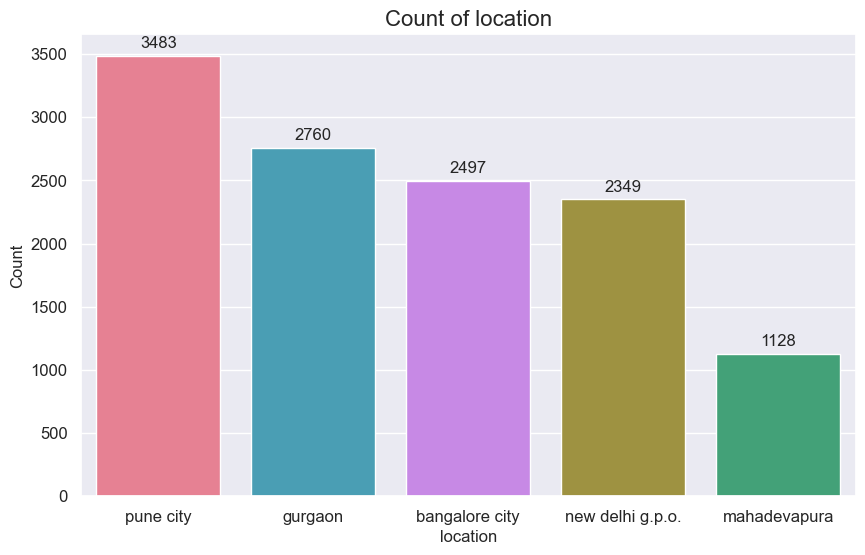

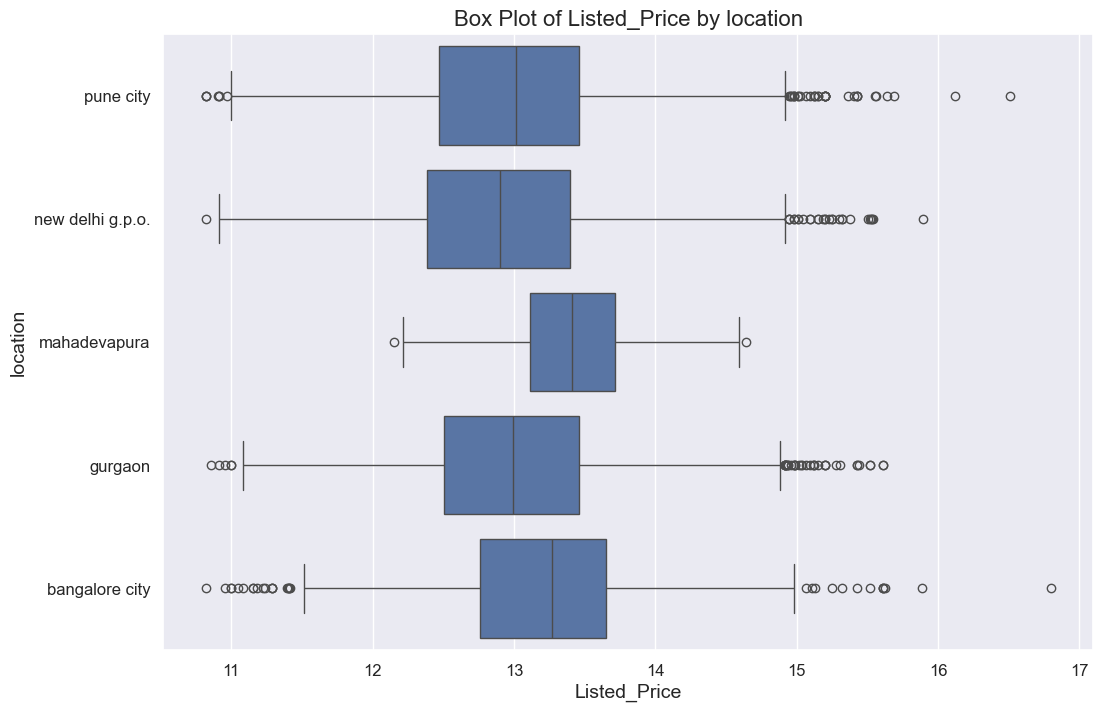

In [9]:
category_column_analysis(cars_data_clean,target='Listed_Price',col='location')

Value Counts of Top 5 Frequent elements of Column: Manufactured_Year


+-------------------+--------+----------------+
| Manufactured_Year | Count  | Mean of Target |
+-------------------+--------+----------------+
|       2017.0      | 3921.0 |   920042.58    |
|       2018.0      | 3673.0 |   1017166.69   |
|       2014.0      | 3485.0 |   546768.32    |
|       2015.0      | 3463.0 |    677059.0    |
|       2016.0      | 3417.0 |   916214.05    |
+-------------------+--------+----------------+


Basic Info of Column Manufactured_Year
+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |          34         |
|   Distinct %   | 0.09002568379802472 |
| Missing Count  |          0          |
|   Missing %    |         0.0         |
|      Mean      |   2015.56973018773  |
|    Minimum     |         1983        |
|    Maximum     |         2023        |
+----------------+---------------------+


Qua

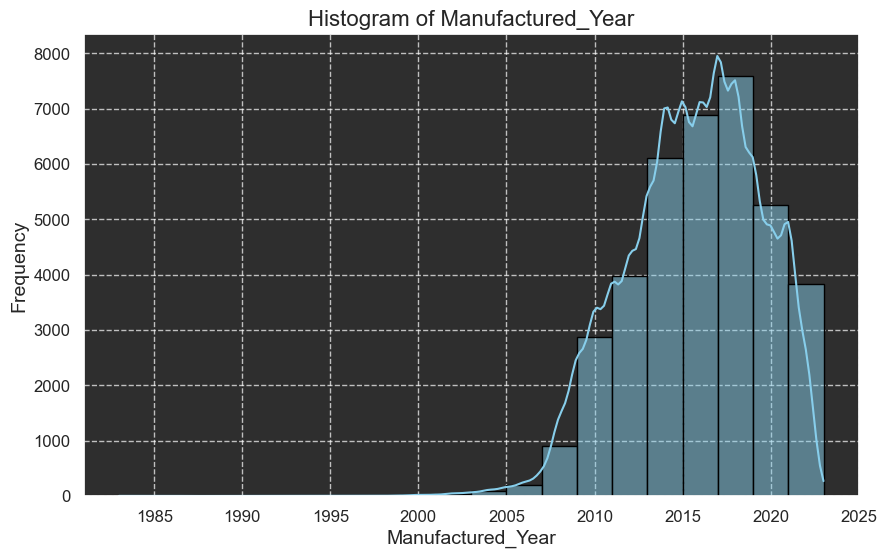

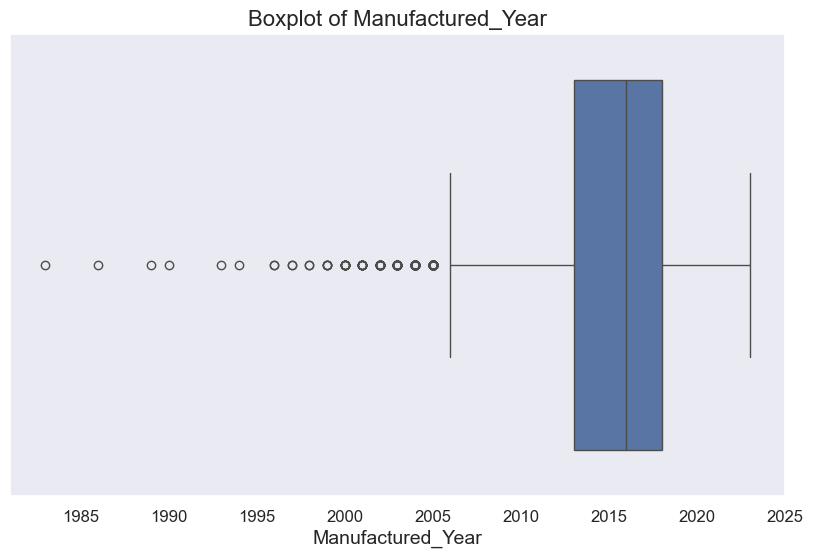

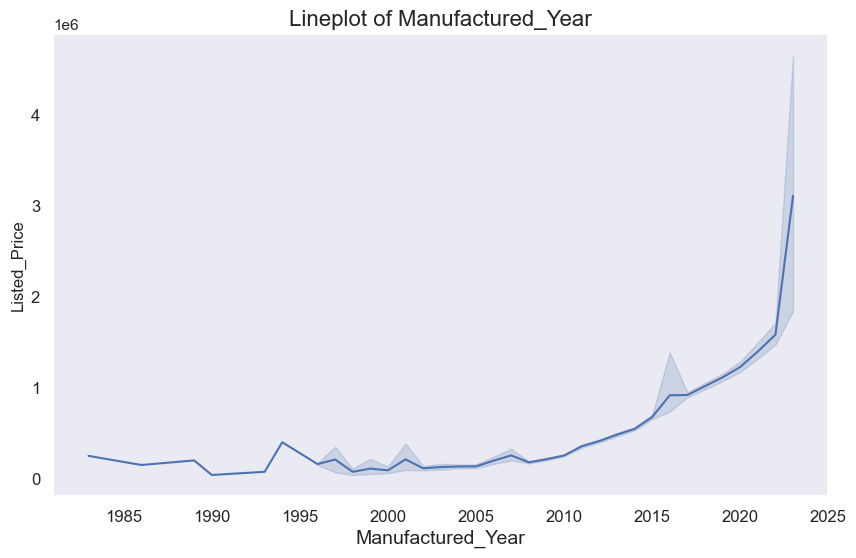

In [3]:
numeric_column_analysis(cars_data_clean,col='Manufactured_Year',target=target)

The distribution shows that we dont have much data before 2004.

In [4]:
cars_data_clean['Manufactured_Year'].value_counts().sort_index().cumsum()

Manufactured_Year
1983        1
1986        2
1989        3
1990        4
1993        5
1994        6
1996        8
1997       10
1998       12
1999       16
2000       26
2001       37
2002       61
2003       92
2004      146
2005      224
2006      343
2007      541
2008     1239
2009     2465
2010     4117
2011     5991
2012     8094
2013    10725
2014    14210
2015    17673
2016    21090
2017    25011
2018    28684
2019    31639
2020    33940
2021    36452
2022    37732
2023    37767
Name: count, dtype: int64

Before 2004 there are not many cars. Also their Listed_Price is also less. To make the data less noisy we can remove the data before 2004

Value Counts of Top 5 Frequent elements of Column: Body_Type


+-----------+-------+----------------+
| Body_Type | Count | Mean of Target |
+-----------+-------+----------------+
| hatchback | 15033 |   386812.32    |
|   sedan   | 10534 |   832060.56    |
|    suv    |  9809 |   1348835.09   |
|    muv    |  1811 |   906014.77    |
|  minivans |  389  |   330966.57    |
+-----------+-------+----------------+


Basic Info of Column Body_Type


+----------------+----------------------+
|    Measure     |        Value         |
+----------------+----------------------+
| Distinct Count |          11          |
| Missing Count  |          18          |
|   Missing %    | 0.047660656128366036 |
+----------------+----------------------+




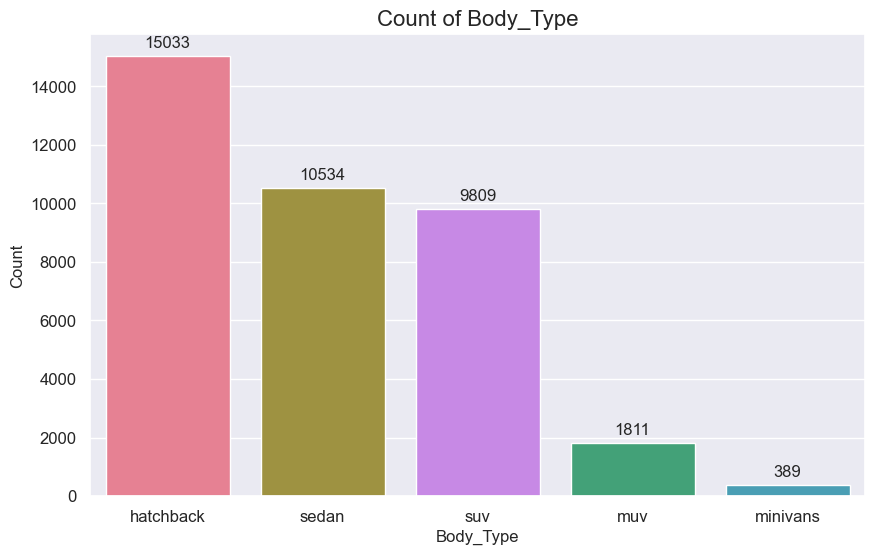

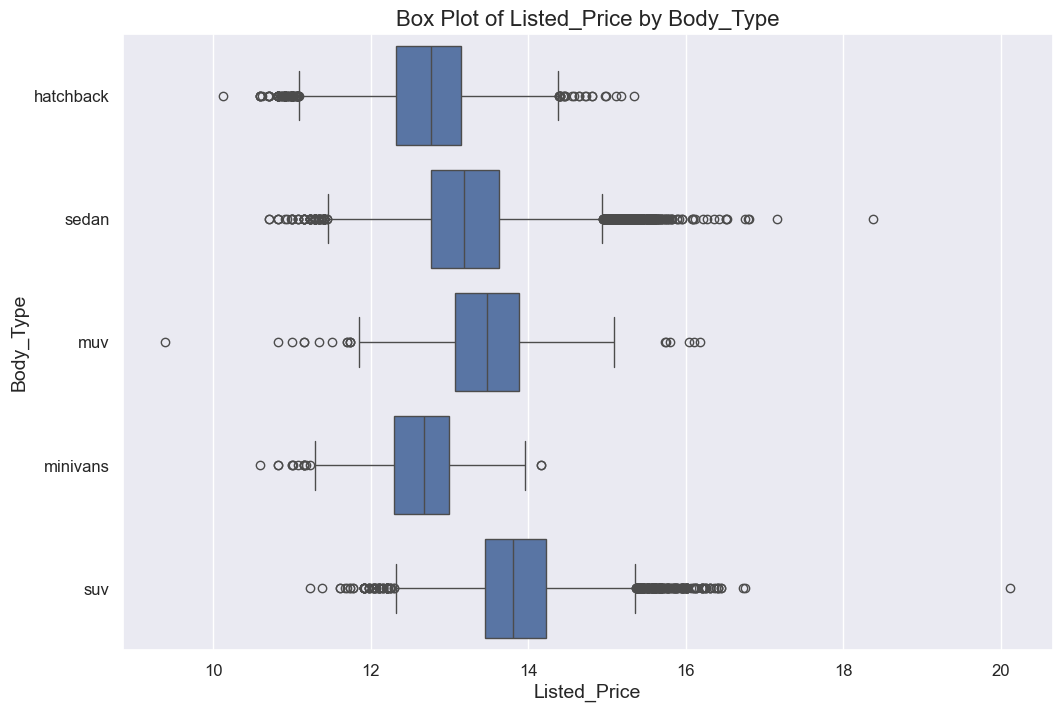

In [3]:
#Body
category_column_analysis(cars_data_clean,'Body_Type',target=target)

Value Counts of Top 2 Frequent elements of Column: Transmission_Type


+-------------------+-------+----------------+
| Transmission_Type | Count | Mean of Target |
+-------------------+-------+----------------+
|       manual      | 28862 |   542928.13    |
|     automatic     |  8905 |   1632634.7    |
+-------------------+-------+----------------+


Basic Info of Column Transmission_Type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   2   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




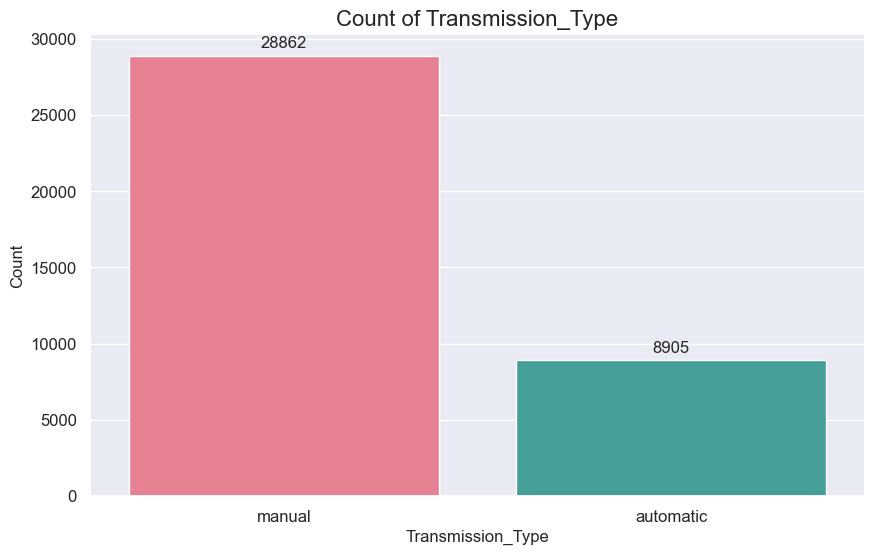

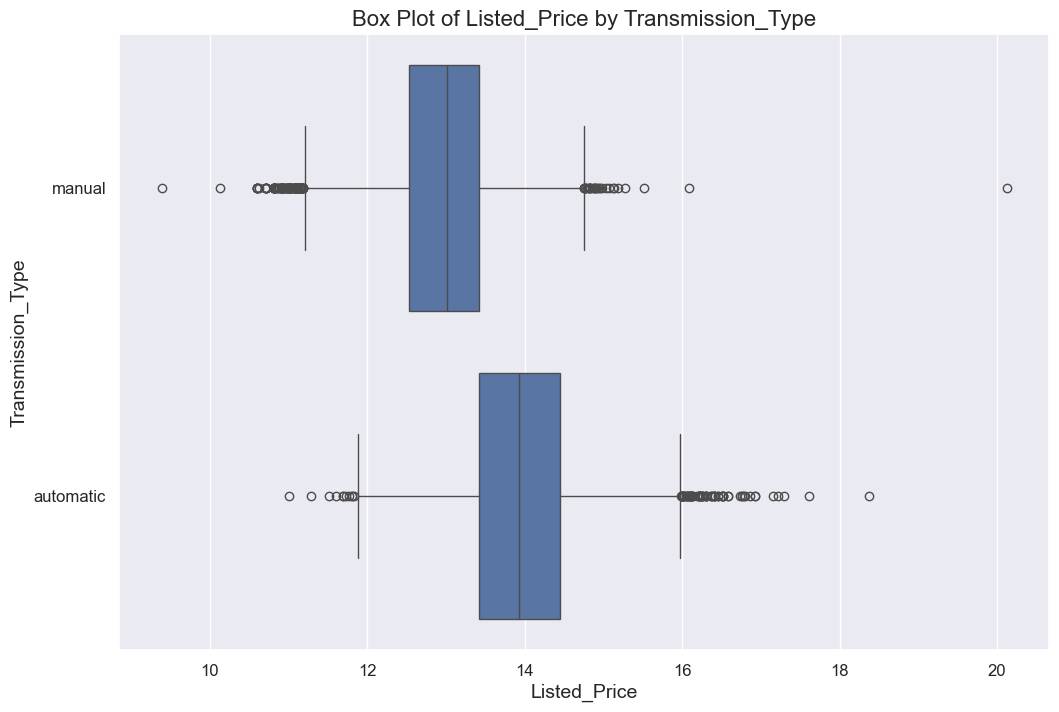

In [15]:
#Transmission

category_column_analysis(cars_data_clean,col='Transmission_Type',target=target,n_rows=2)

Value Counts of Top 5 Frequent elements of Column: Fuel_Type


+-----------+-------+----------------+
| Fuel_Type | Count | Mean of Target |
+-----------+-------+----------------+
|   petrol  | 21747 |   635750.13    |
|   diesel  | 14613 |   1071841.19   |
|    cng    |  1074 |   457236.38    |
|    lpg    |  203  |   177267.72    |
|  electric |  130  |   1485178.46   |
+-----------+-------+----------------+


Basic Info of Column Fuel_Type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   5   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




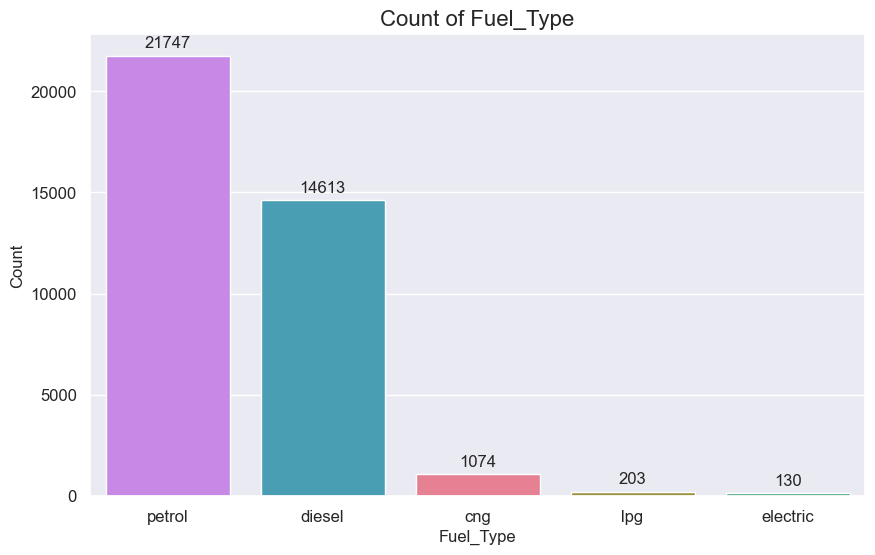

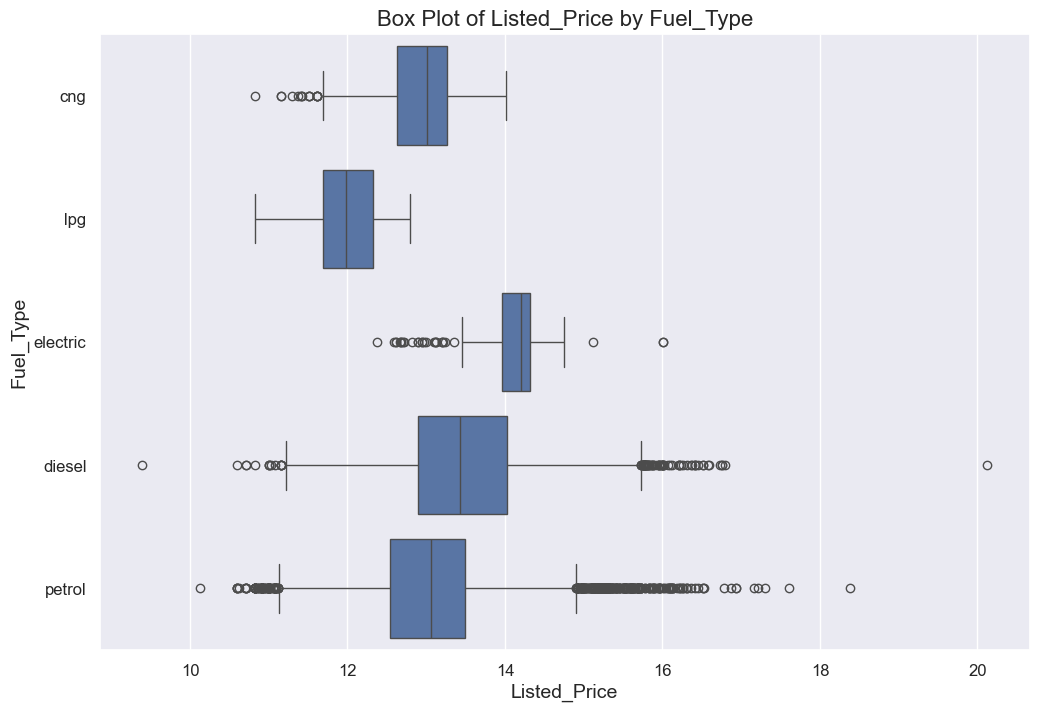

In [18]:
#Fuel_Type

cars_data_clean['Fuel_Type'].unique()
category_column_analysis(cars_data_clean,col='Fuel_Type',target=target,n_rows=5)


Value Counts of Top 5 Frequent elements of Column: KM_Driven


+-----------+-------+----------------+
| KM_Driven | Count | Mean of Target |
+-----------+-------+----------------+
|  70000.0  | 602.0 |   588695.67    |
|  120000.0 | 570.0 |   443326.96    |
|  80000.0  | 532.0 |   635781.58    |
|  60000.0  | 528.0 |   723384.95    |
|  50000.0  | 475.0 |   803047.79    |
+-----------+-------+----------------+


Basic Info of Column KM_Driven
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |       23863        |
|   Distinct %   | 63.184790955066596 |
| Missing Count  |         0          |
|   Missing %    |        0.0         |
|      Mean      | 62417.652765641964 |
|    Minimum     |       101.0        |
|    Maximum     |     6300000.0      |
+----------------+--------------------+


Quantile stats for column "KM_Driven"
+---------------------+--------------------+
|      Statistic      |     

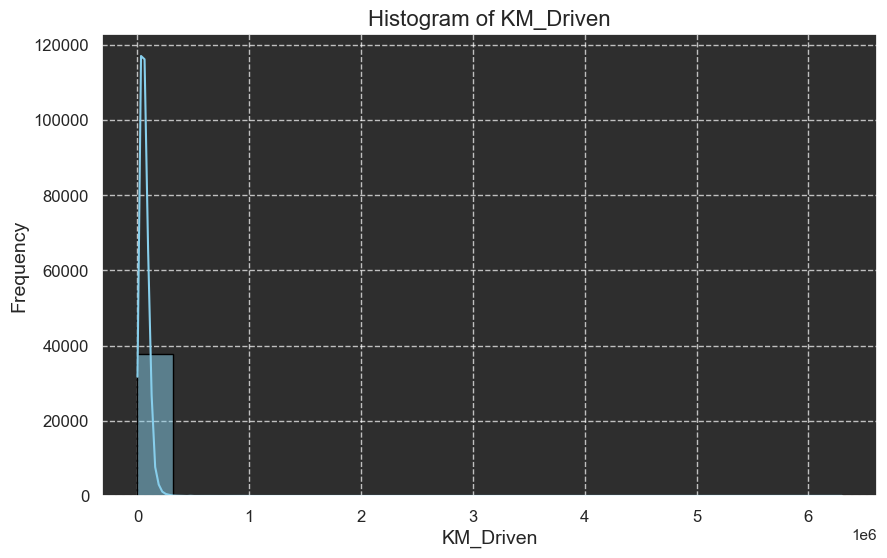

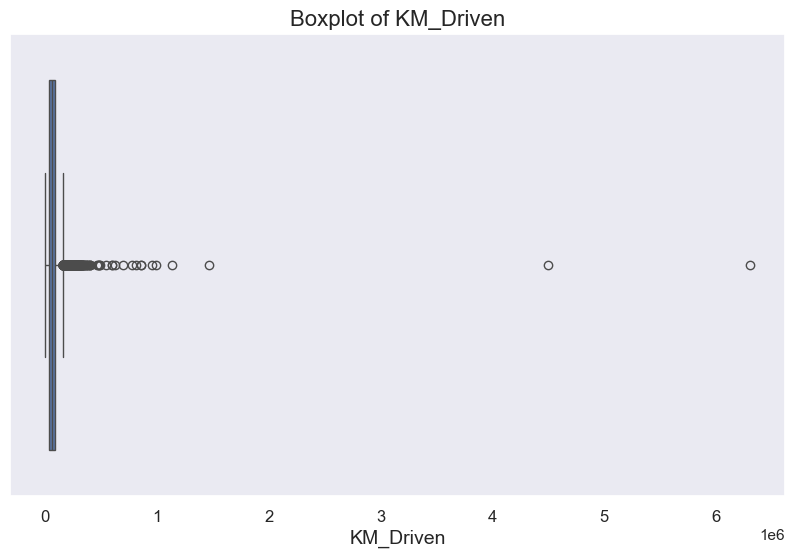

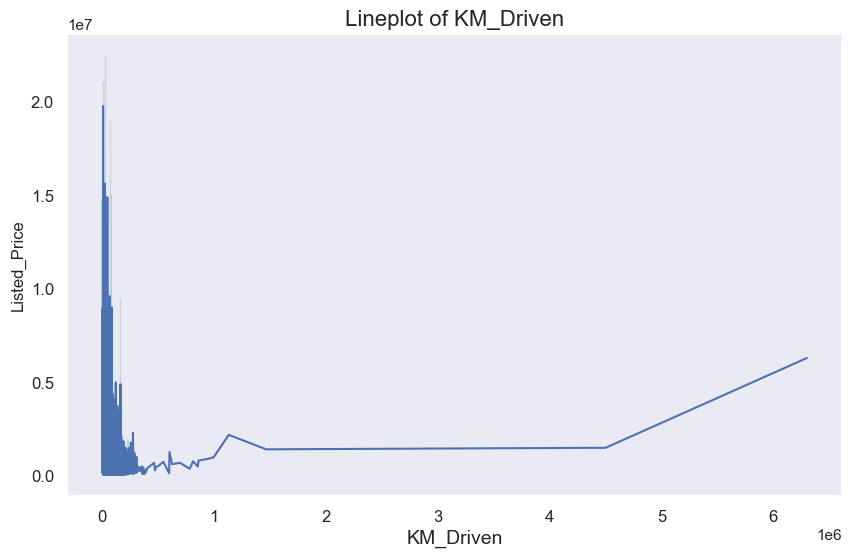

In [20]:
cars_data_clean['KM_Driven']

numeric_column_analysis(cars_data_clean,col='KM_Driven',target=target)

Value Counts of Top 2 Frequent elements of Column: Insurance_Premium


+-------------------+---------+----------------+
| Insurance_Premium |  Count  | Mean of Target |
+-------------------+---------+----------------+
|        0.0        | 37381.0 |    780993.3    |
|        1.0        |  386.0  |   2627702.59   |
+-------------------+---------+----------------+


Basic Info of Column Insurance_Premium


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   2   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




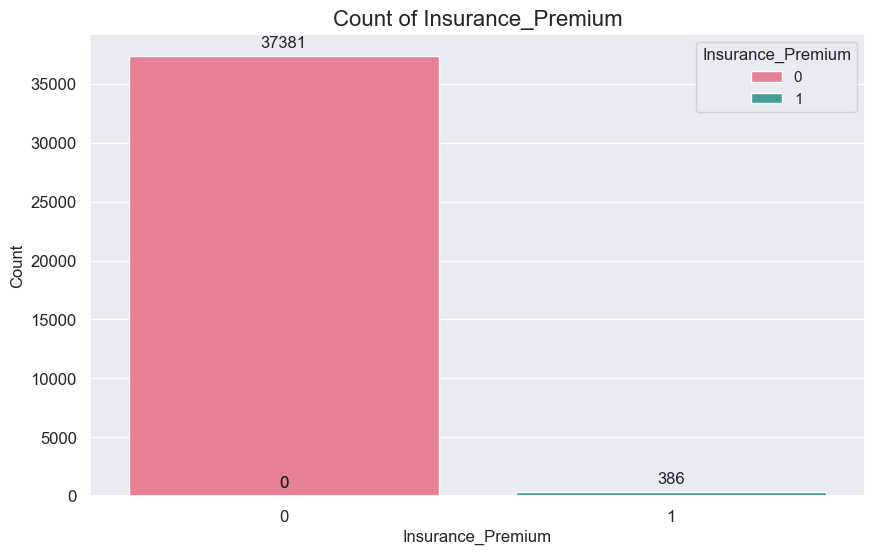

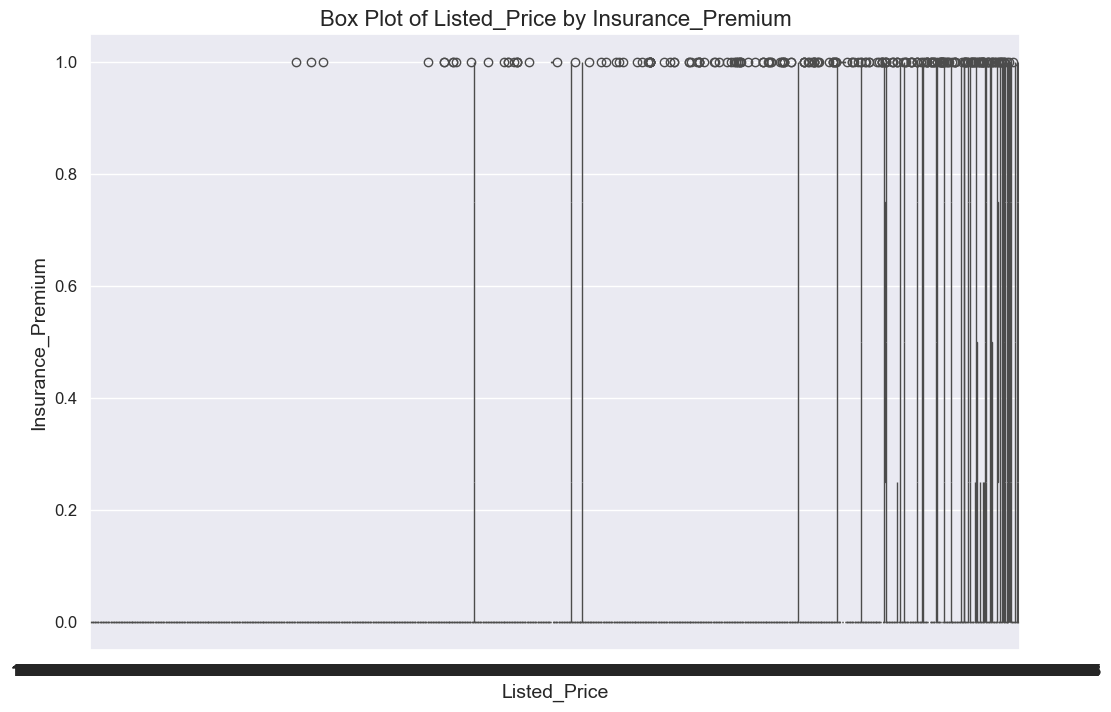

In [2]:
#Insurance Premium

category_column_analysis(cars_data_clean,'Insurance_Premium',n_rows=2,target=target)

In [5]:
cars_data_clean.columns

Index(['brand_name', 'model', 'location', 'state', 'Manufactured_Year',
       'owner_type', 'Body_Type', 'Transmission_Type', 'Insurance_Premium',
       'Fuel_Type', 'KM_Driven', 'discountValue', 'Car_Seller_Type', 'carType',
       'top_features', 'comfort_features', 'interior_features',
       'exterior_features', 'safety_features', 'Color', 'Engine Type',
       'Displacement', 'No of Cylinder', 'Valves_Per_Cylinder', 'Valve_Config',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Num_Doors', 'Cargo_Volume', 'engine_capacity', 'mileage',
       'Fuel Suppy System', 'Alloy Wheel Size', 'Listed_Price',
       'Max Power Delivered', 'Max Power At', 'Max Torque Delivered',
       'Max Torque At'],
      dtype='object')

Value Counts of Top 5 Frequent elements of Column: Front Tread


+-------------+--------+----------------+
| Front Tread | Count  | Mean of Target |
+-------------+--------+----------------+
|    1295.0   | 2311.0 |   268242.92    |
|    1505.0   | 1769.0 |    508179.7    |
|    1480.0   | 1504.0 |    520363.8    |
|    1400.0   | 1386.0 |   284657.92    |
|    1479.0   | 1287.0 |   429842.22    |
+-------------+--------+----------------+


Basic Info of Column Front Tread
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        156         |
|   Distinct %   | 0.4130590197791723 |
| Missing Count  |       15860        |
|   Missing %    | 41.994333677549186 |
|      Mean      | 1470.036262381887  |
|    Minimum     |       1143.0       |
|    Maximum     |       1705.0       |
+----------------+--------------------+


Quantile stats for column "Front Tread"
+---------------------+--------+
|      

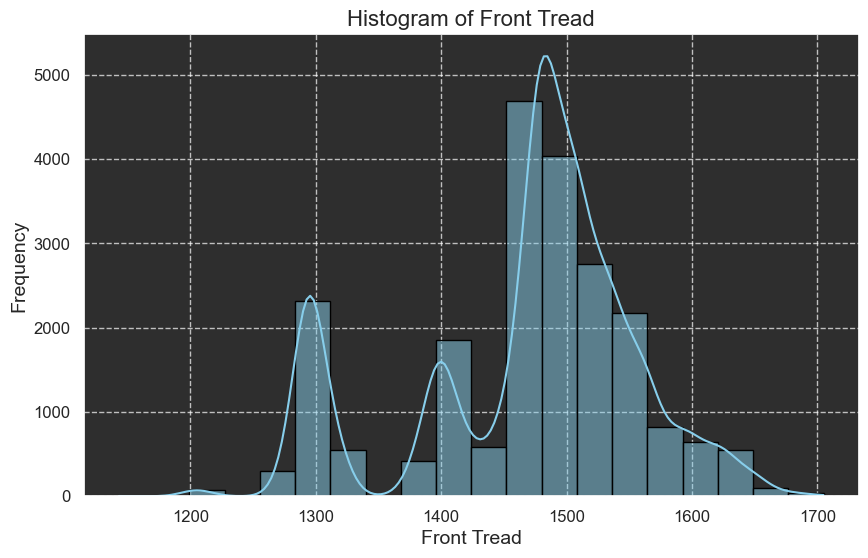

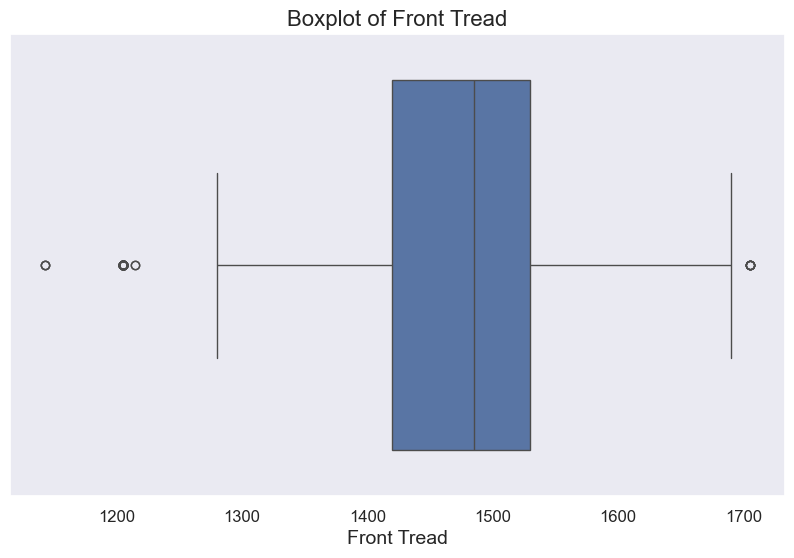

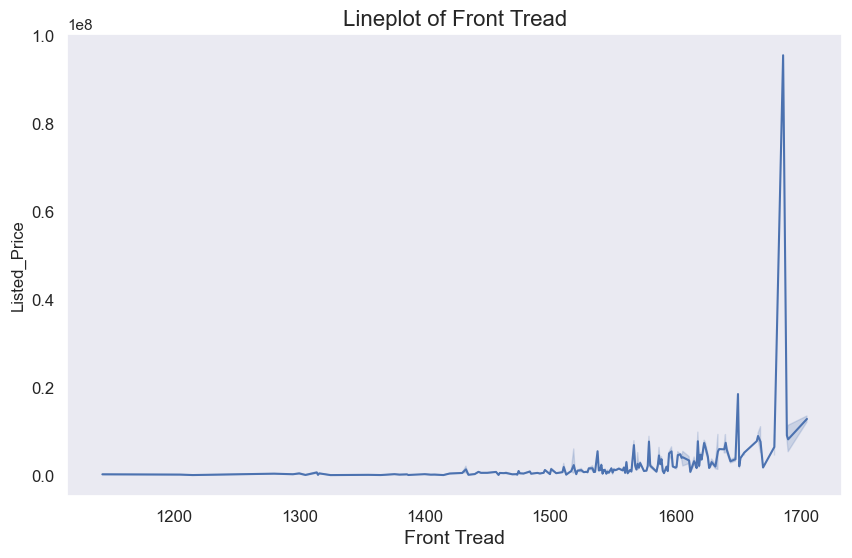

In [2]:
cars_data_clean['Front Tread'].unique()

numeric_column_analysis(cars_data_clean,col='Front Tread',target=target)

In [ ]:
cars_data_clean['Body_Type']

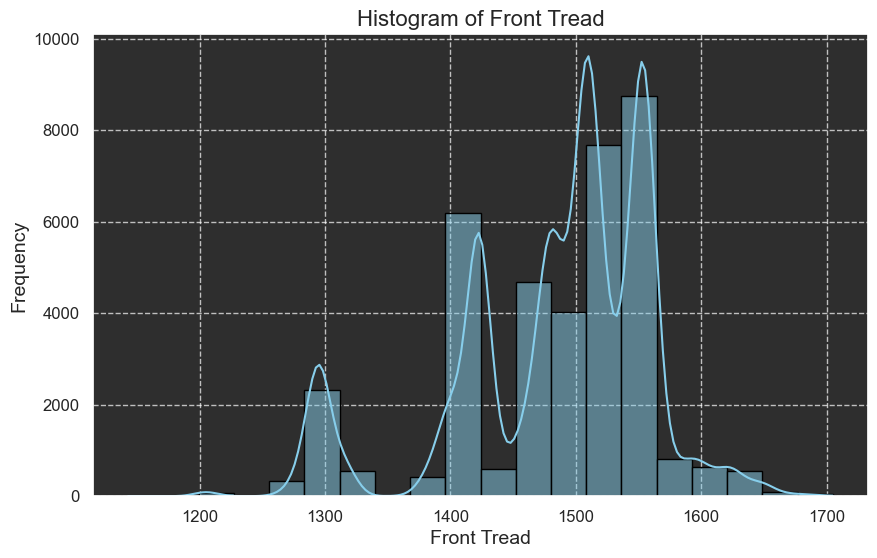

In [72]:
sns.set_theme(style="dark")
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(x=cars_data_clean['Front Tread'].fillna(cars_data_clean['Front Tread'].mean()), bins=20, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of {}'.format('Front Tread'), fontsize=16)
plt.xlabel('Front Tread', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('#2E2E2E')
plt.show()

In [9]:
numeric_df = cars_data_clean.select_dtypes(include=['number']).reset_index()
numeric_df.drop(columns='index',axis=1,inplace=True)


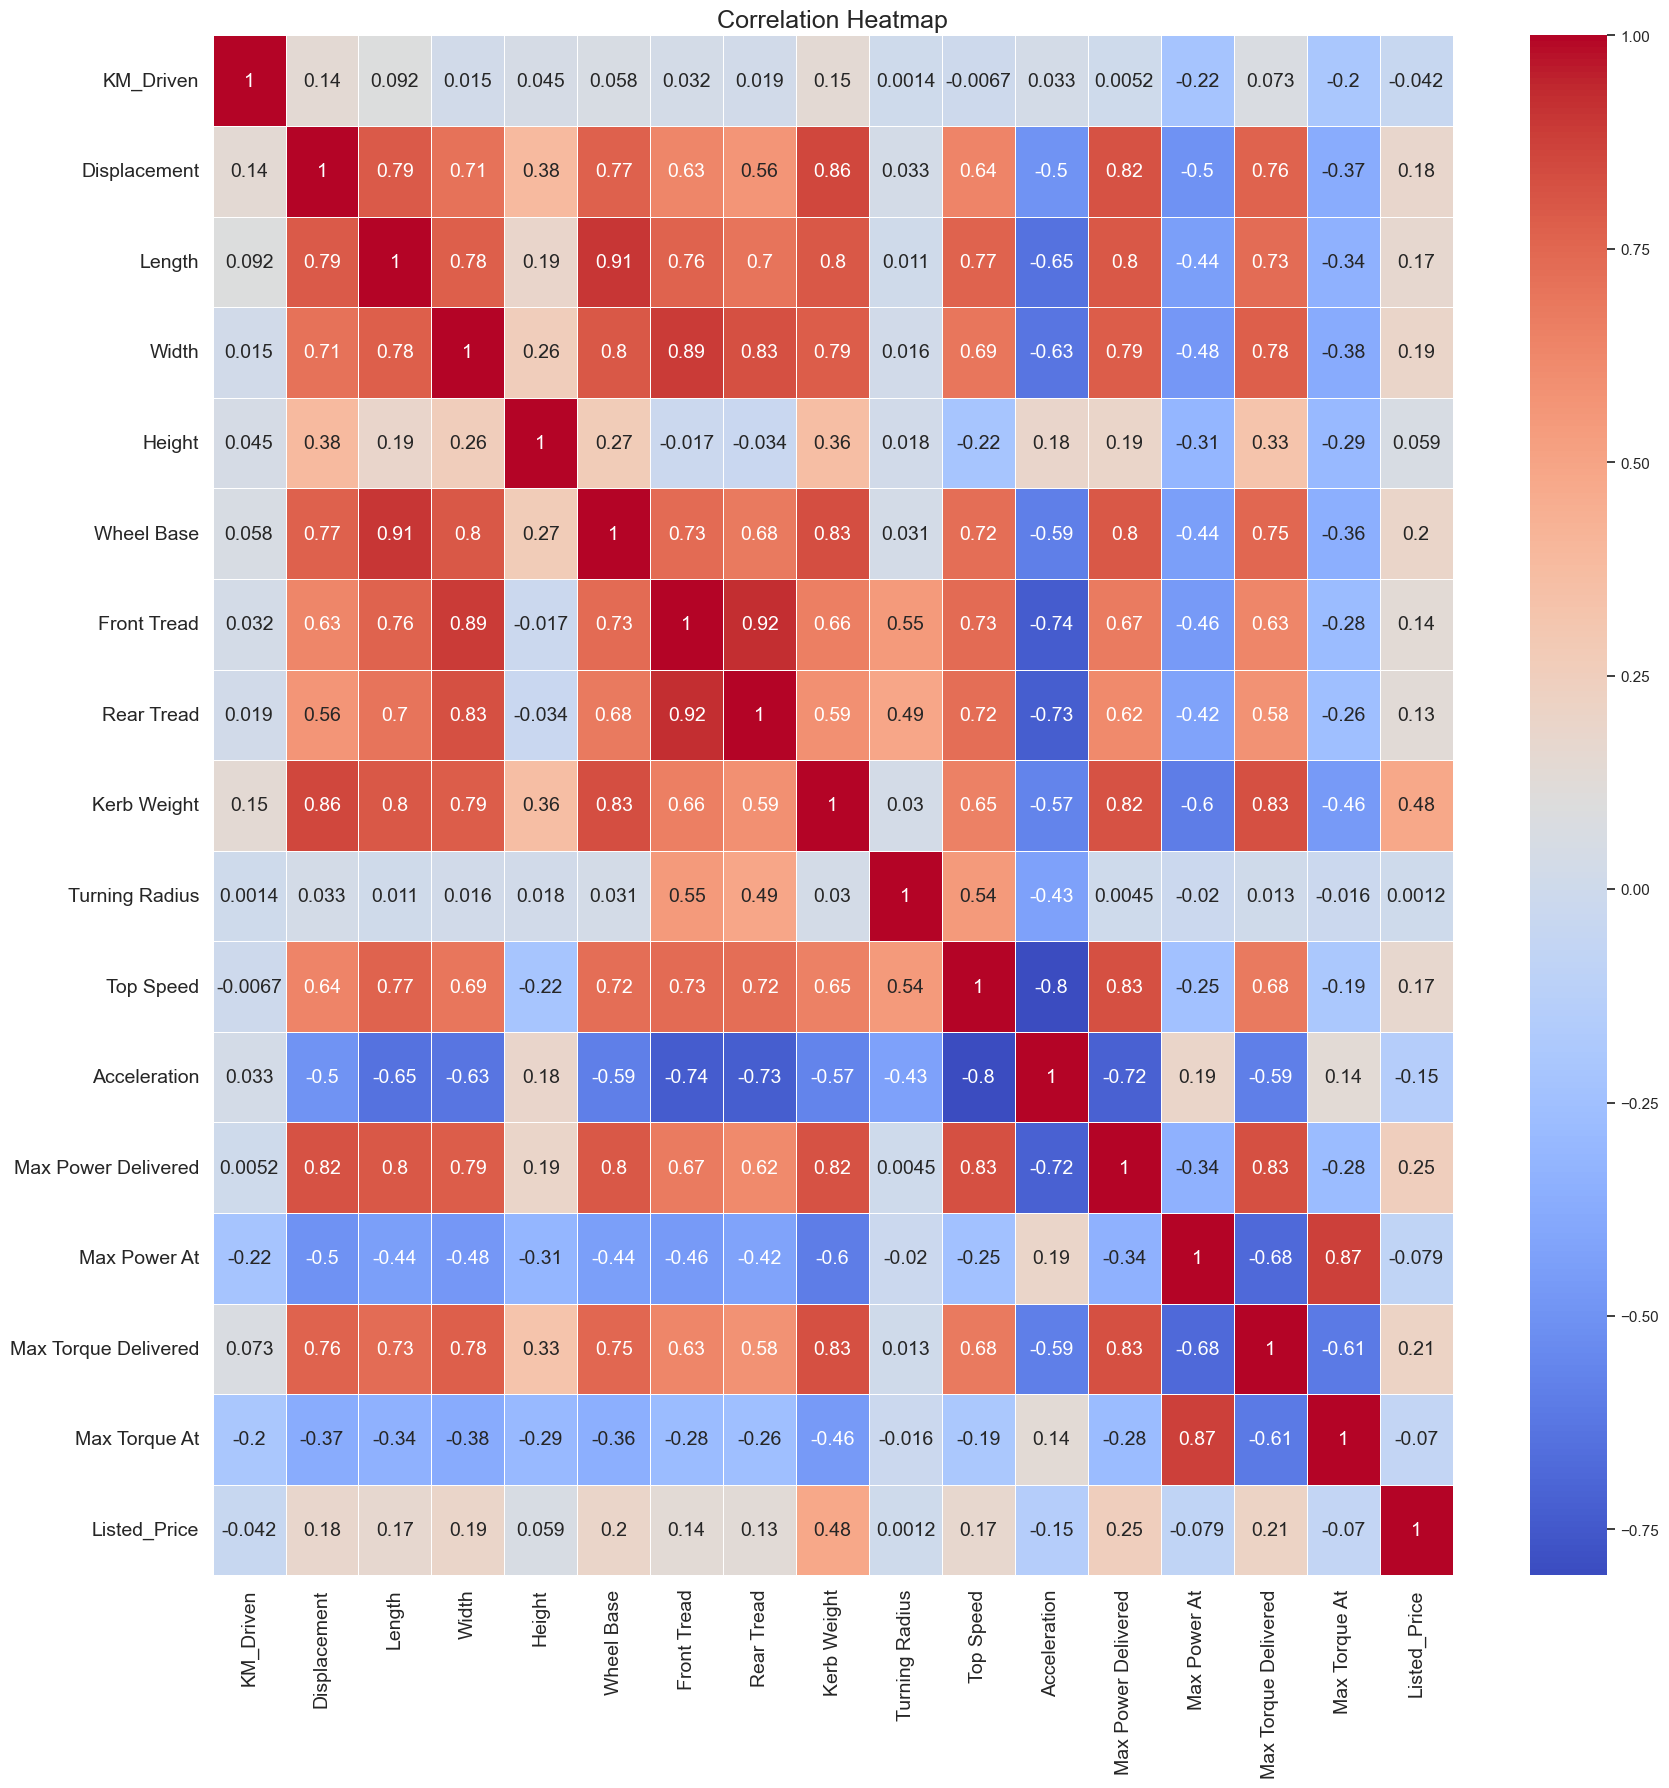

In [10]:
numeric_df.columns

discrete_cols=[]
continuous_cols=[]

for col in list(numeric_df.columns):
    if col=='Listed_Price':
        continue
    elif len(list(numeric_df[col].unique()))>35:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)

continuous_cols.append(str('Listed_Price'))

corr = cars_data_clean[continuous_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True,cmap='coolwarm', linewidths=0.5,annot_kws={"size": 14})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
corr_listed_price=corr['Listed_Price'].to_dict()
cols_to_remove=[]

for col in corr_listed_price.keys():
    if np.abs(corr_listed_price[col])<0.04:
        cols_to_remove.append(col)

print(cols_to_remove)

['Turning Radius']


['Turning Radius'] have very low correlation with target variable. So they can be dropped

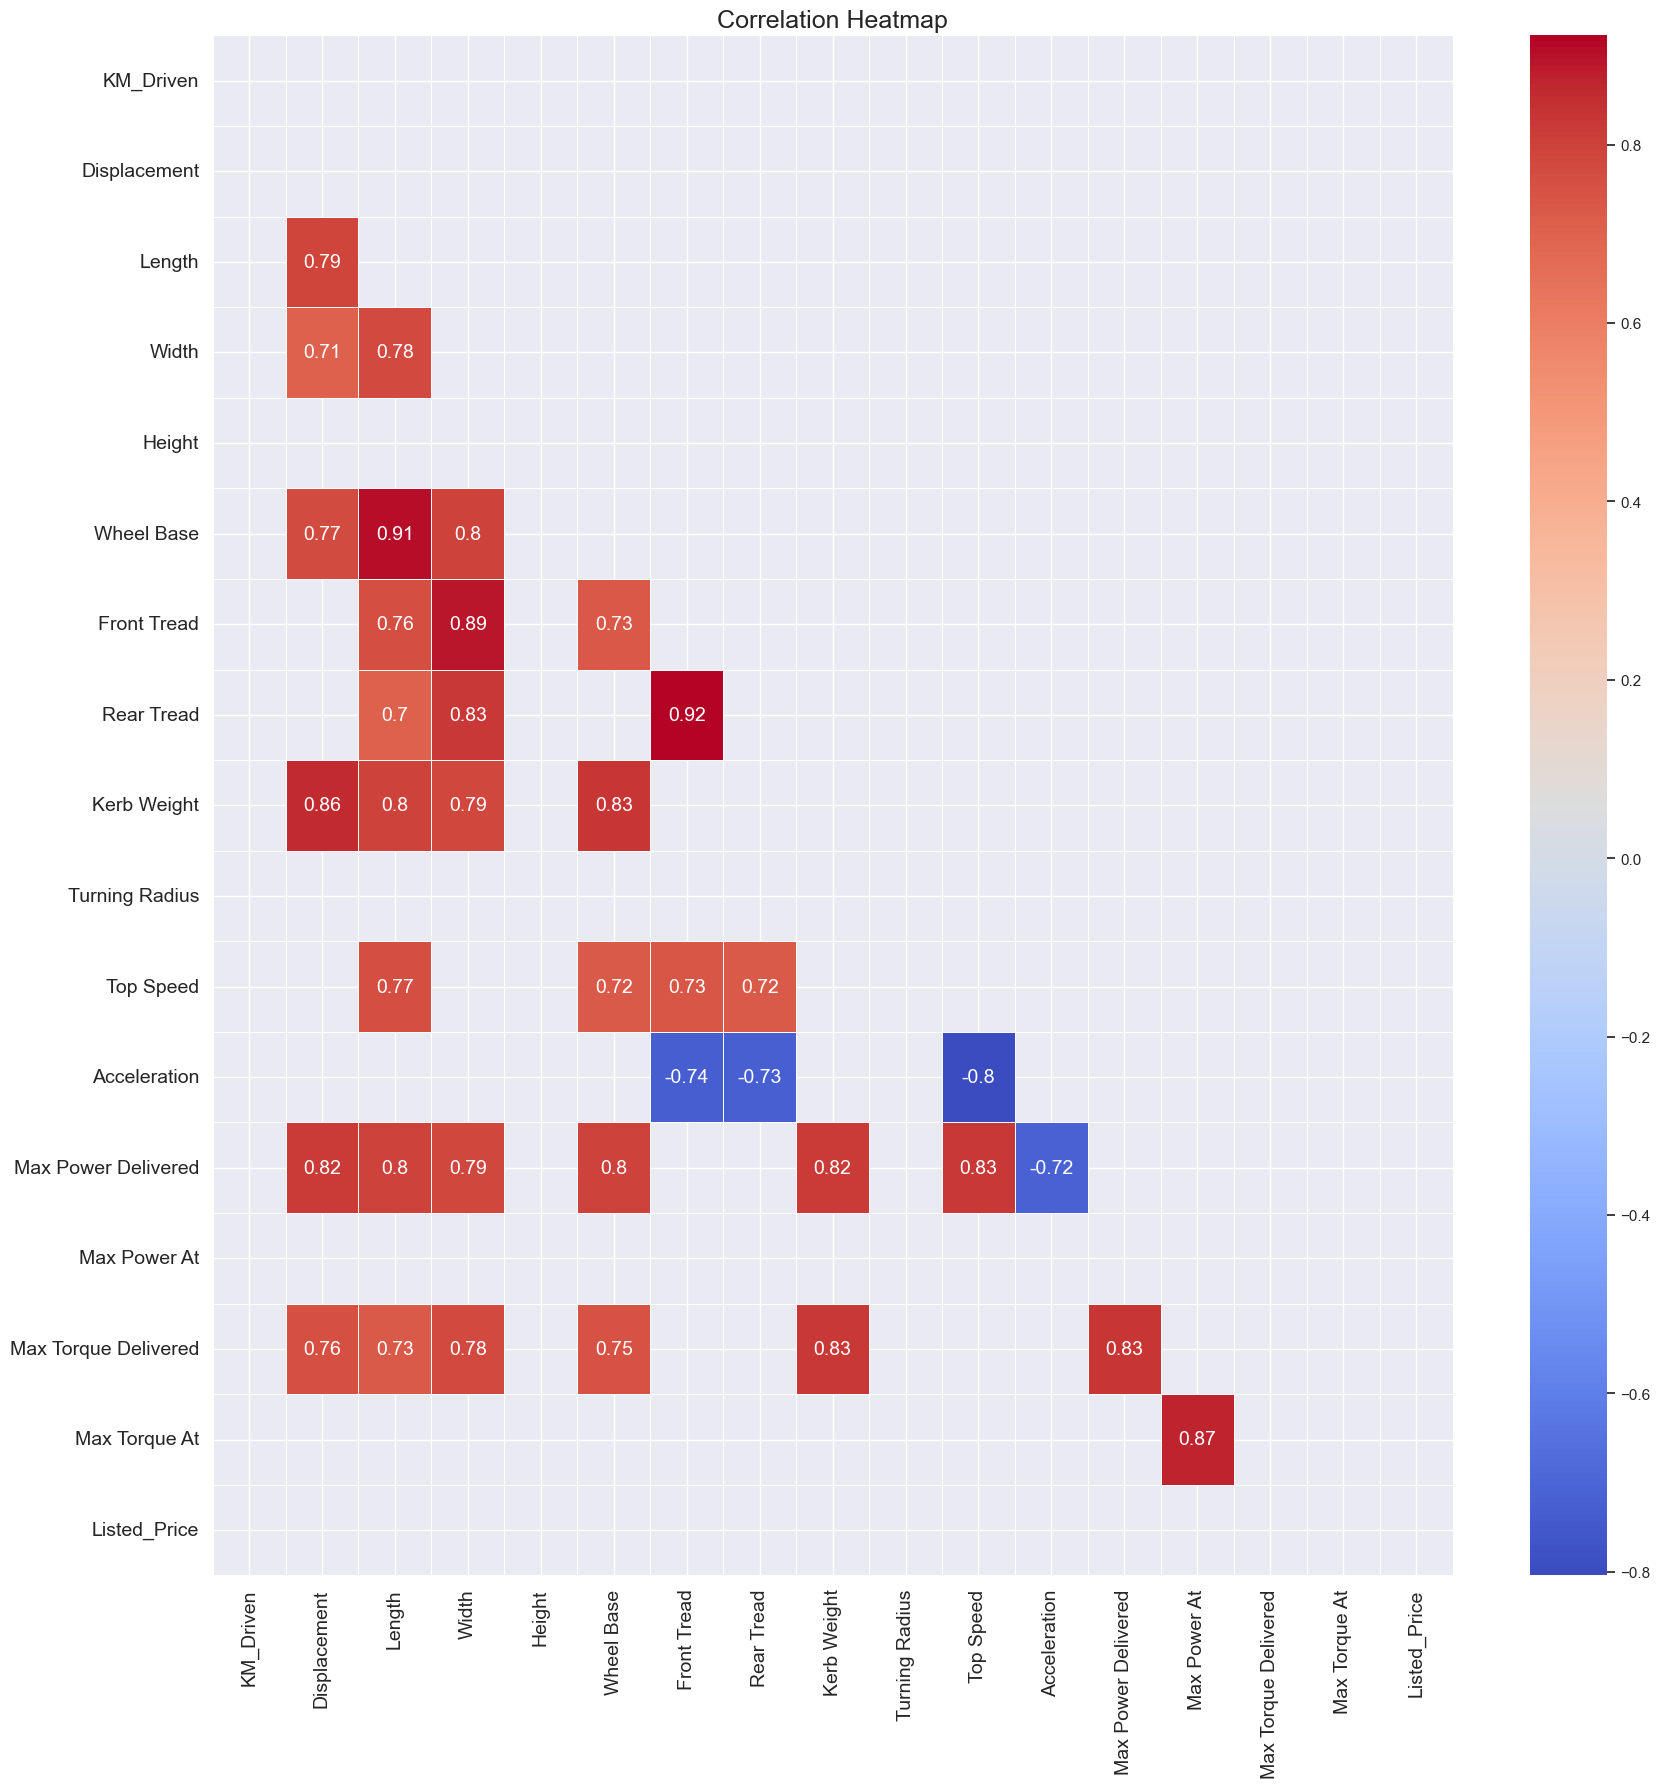

In [12]:
## Check for Multicollinearity
numeric_df.columns

discrete_cols=[]
continuous_cols=[]

for col in list(numeric_df.columns):
    if col=='Listed_Price':
        continue
    elif len(list(numeric_df[col].unique()))>35:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)

continuous_cols.append(str('Listed_Price'))

corr = cars_data_clean[continuous_cols].corr()

threshold = 0.7

# Create a mask to highlight correlations above the threshold
mask = np.abs(corr) < threshold

# Apply the mask
filtered_corr = corr.mask(mask)

# Generate a mask for the upper triangle
upper_tri_mask = np.triu(np.ones_like(corr, dtype=bool))

# Combine the masks
final_mask = mask | upper_tri_mask
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr, mask=upper_tri_mask,annot=True,cmap='coolwarm', linewidths=0.5,annot_kws={"size": 14})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Rear Tread and Front Tread have multicollinearity (0.92). Drop Rear Tread and Fill Na of Front Tread with front tread of Body_Type.

Value Counts of Top 5 Frequent elements of Column: Max Power At


+--------------+---------+----------------+
| Max Power At |  Count  | Mean of Target |
+--------------+---------+----------------+
|    6000.0    | 10666.0 |   546334.36    |
|    4000.0    |  6969.0 |   872914.89    |
|    3750.0    |  2850.0 |   1187413.43   |
|    5500.0    |  2385.0 |    630839.8    |
|    6200.0    |  1880.0 |   258988.56    |
+--------------+---------+----------------+


Basic Info of Column Max Power At
+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |          50         |
|   Distinct %   | 0.13239071146768341 |
| Missing Count  |         2244        |
|   Missing %    |  5.941695130669633  |
|      Mean      |  5102.824085803564  |
|    Minimum     |        1620.0       |
|    Maximum     |        8250.0       |
+----------------+---------------------+


Quantile stats for column "Max Power At"
+-------

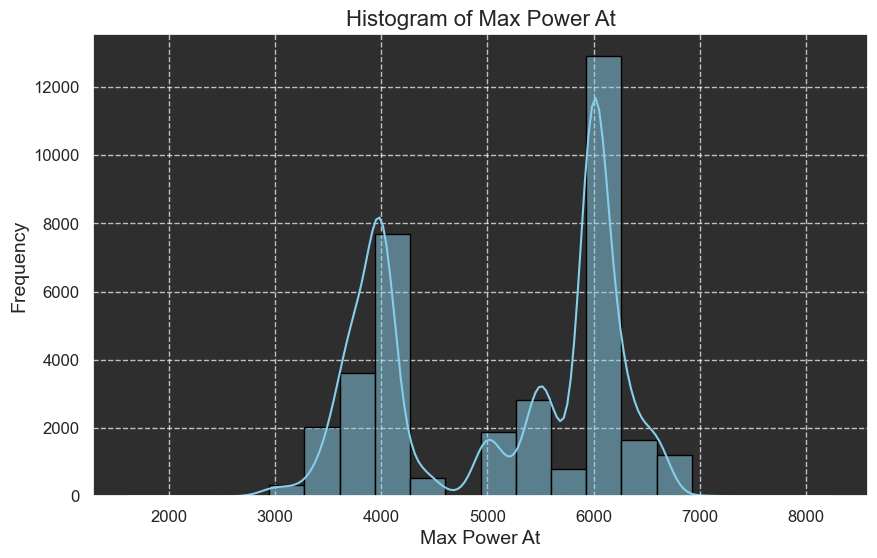

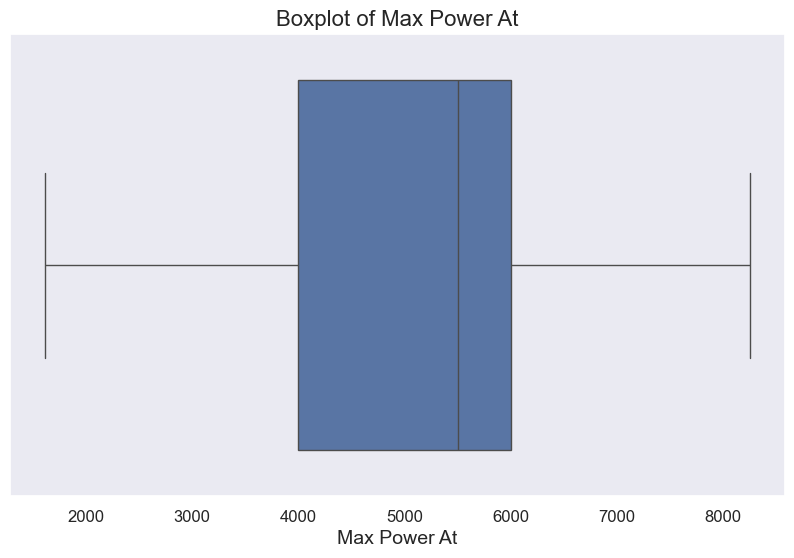

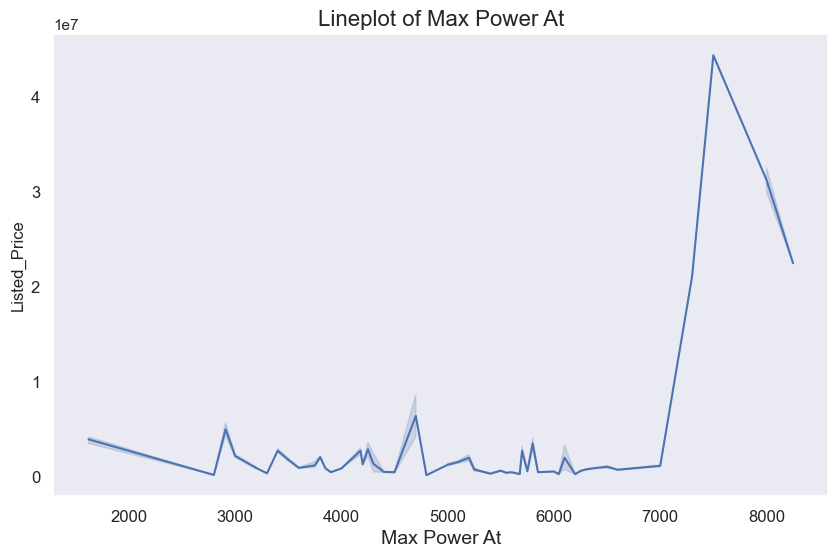

In [75]:
## Max Power
numeric_column_analysis(cars_data_clean,'Max Power At',target=target)

Value Counts of Top 5 Frequent elements of Column: Max Torque At


+---------------+--------+----------------+
| Max Torque At | Count  | Mean of Target |
+---------------+--------+----------------+
|     4000.0    | 5300.0 |   464657.88    |
|     3500.0    | 3700.0 |   390944.87    |
|     2125.0    | 2919.0 |   1438318.15   |
|     2000.0    | 2879.0 |    716168.4    |
|     1750.0    | 2514.0 |   643007.36    |
+---------------+--------+----------------+


Basic Info of Column Max Torque At
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        111         |
|   Distinct %   | 0.2939073794582572 |
| Missing Count  |        1974        |
|   Missing %    | 5.226785288744142  |
|      Mean      | 3161.6929846618054 |
|    Minimum     |       160.0        |
|    Maximum     |      21800.0       |
+----------------+--------------------+


Quantile stats for column "Max Torque At"
+---------------

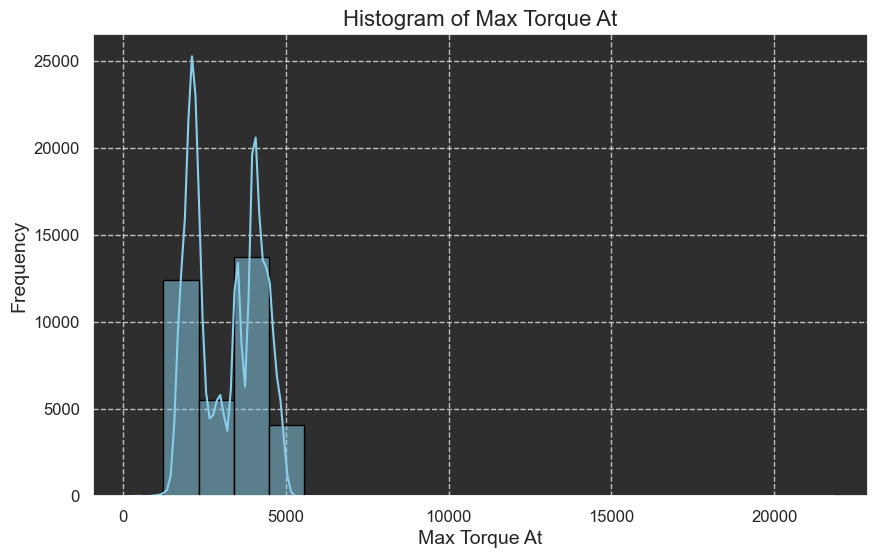

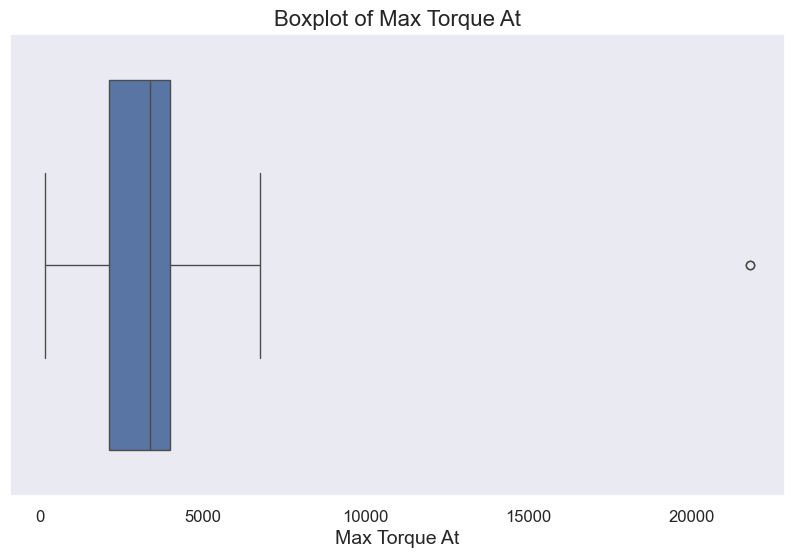

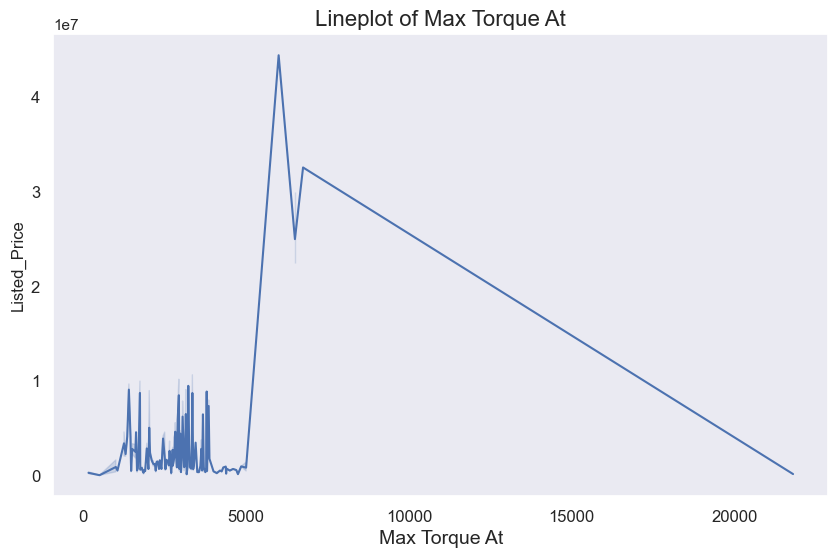

In [76]:
numeric_column_analysis(cars_data_clean,'Max Torque At',target=target)

Max Torque At and Max Power At have high multicollinearity. Remove Max Torque At and Replace Null value of Max Power At with the mean Max Power At of it model. Drop remaining Nulls

Value Counts of Top 5 Frequent elements of Column: Max Power Delivered


+---------------------+--------+----------------+
| Max Power Delivered | Count  | Mean of Target |
+---------------------+--------+----------------+
|         88.5        | 1315.0 |   720921.74    |
|         81.8        | 1287.0 |   590998.49    |
|         74.0        | 1046.0 |   413412.33    |
|        81.86        | 937.0  |   629732.68    |
|         67.0        | 737.0  |   284701.98    |
+---------------------+--------+----------------+


Basic Info of Column Max Power Delivered
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        570         |
|   Distinct %   | 1.509254110731591  |
| Missing Count  |        231         |
|   Missing %    | 0.6116450869806974 |
|      Mean      | 102.75665305306906 |
|    Minimum     |        10.8        |
|    Maximum     |       769.31       |
+----------------+----------------

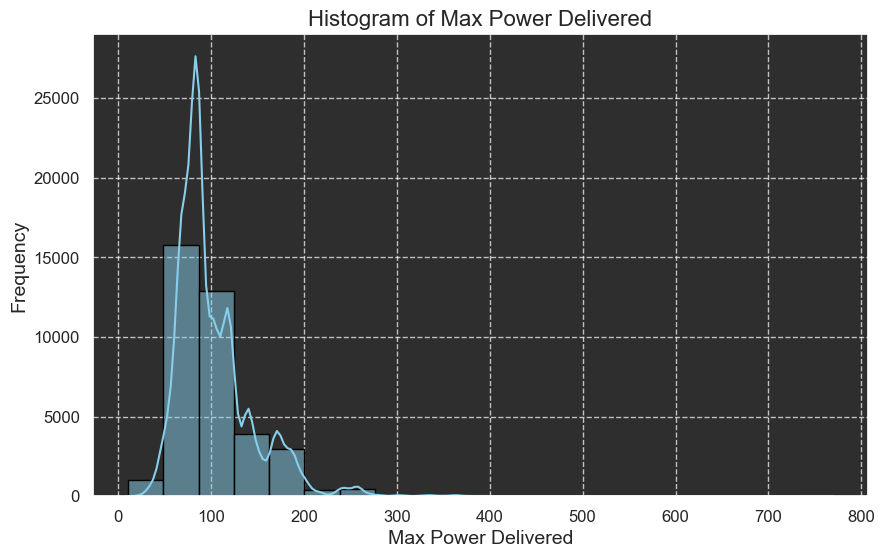

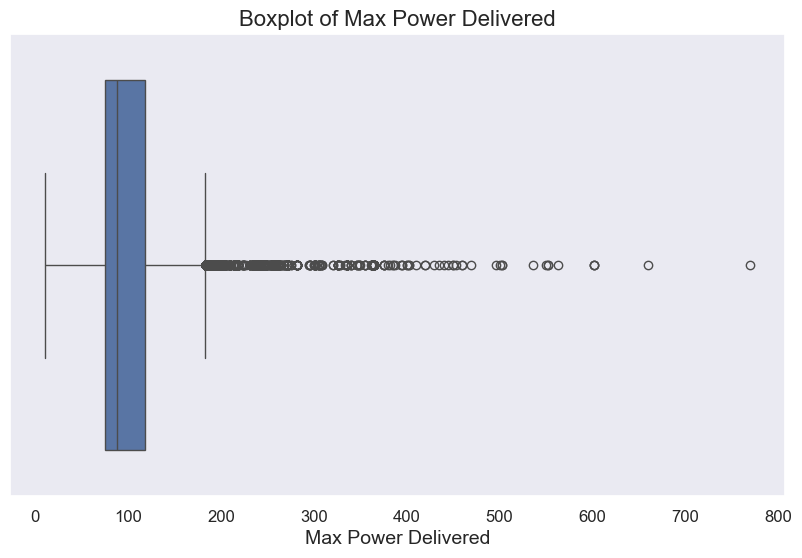

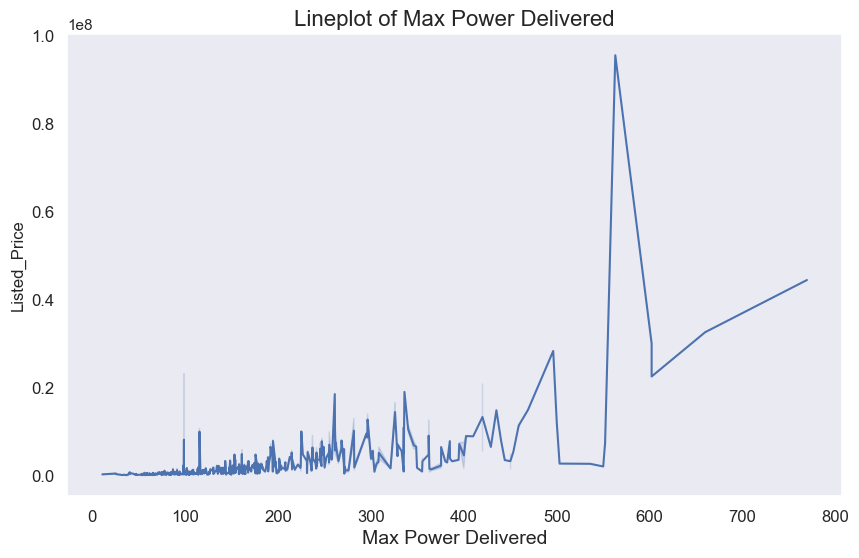

In [87]:
## Max Power Deliverd
numeric_column_analysis(cars_data_clean,'Max Power Delivered',target=target)

Value Counts of Top 5 Frequent elements of Column: Max Torque Delivered


+----------------------+--------+----------------+
| Max Torque Delivered | Count  | Mean of Target |
+----------------------+--------+----------------+
|        200.0         | 2625.0 |   618076.64    |
|        113.0         | 1742.0 |   594646.56    |
|        114.0         | 1536.0 |    385778.3    |
|         90.0         | 1497.0 |   322722.34    |
|        250.0         | 1459.0 |   1136917.7    |
+----------------------+--------+----------------+


Basic Info of Column Max Torque Delivered
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        330         |
|   Distinct %   | 0.8737786956867105 |
| Missing Count  |        231         |
|   Missing %    | 0.6116450869806974 |
|      Mean      | 178.78281463128732 |
|    Minimum     |        4.8         |
|    Maximum     |       900.0        |
+----------------+-----

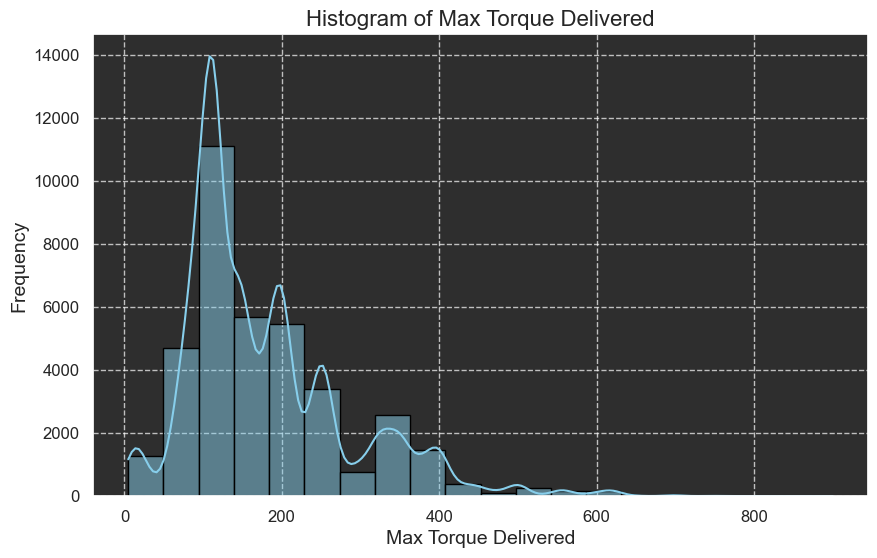

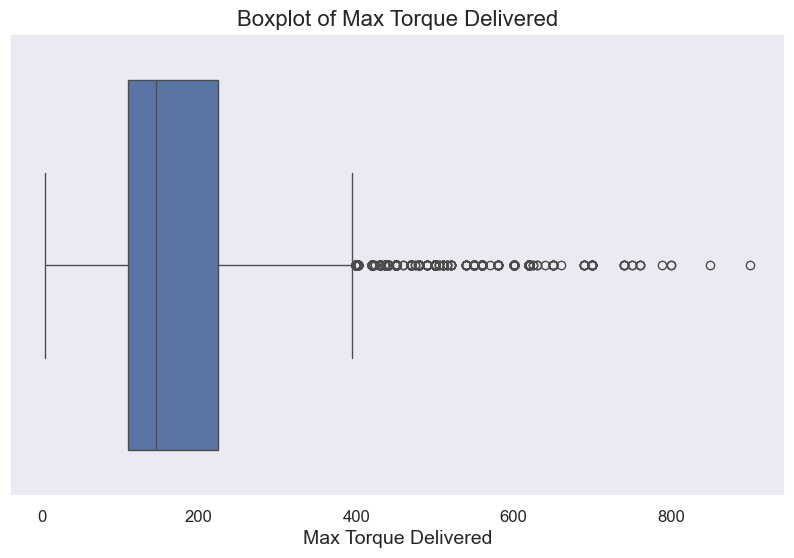

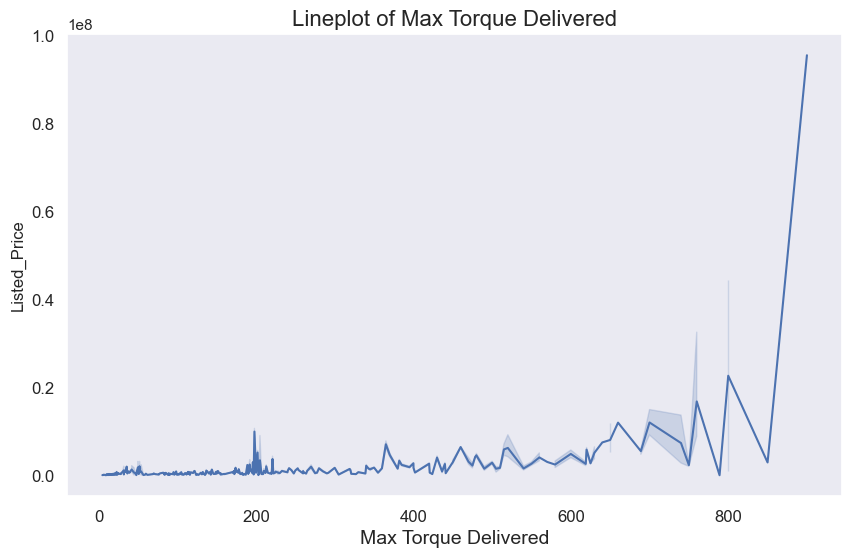

In [88]:
## Max Power Deliverd
numeric_column_analysis(cars_data_clean,'Max Torque Delivered',target=target)

Max Power Delivered and Max Torque Delivered have high multicollinearity
Drop Max Torque Delived and FillNa of Max Power Delivered like Max Power At

Value Counts of Top 5 Frequent elements of Column: Kerb Weight


+-------------+-------+----------------+
| Kerb Weight | Count | Mean of Target |
+-------------+-------+----------------+
|    860.0    | 718.0 |   355175.23    |
|    960.0    | 623.0 |   368192.12    |
|    1100.0   | 585.0 |   315348.41    |
|    1066.0   | 533.0 |   567101.94    |
|    935.0    | 522.0 |   442598.19    |
+-------------+-------+----------------+


Basic Info of Column Kerb Weight
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        539         |
|   Distinct %   | 1.4271718696216273 |
| Missing Count  |       13128        |
|   Missing %    | 34.76050520295496  |
|      Mean      | 1146.234912131174  |
|    Minimum     |       451.0        |
|    Maximum     |       2962.0       |
+----------------+--------------------+


Quantile stats for column "Kerb Weight"
+---------------------+--------+
|      Statistic

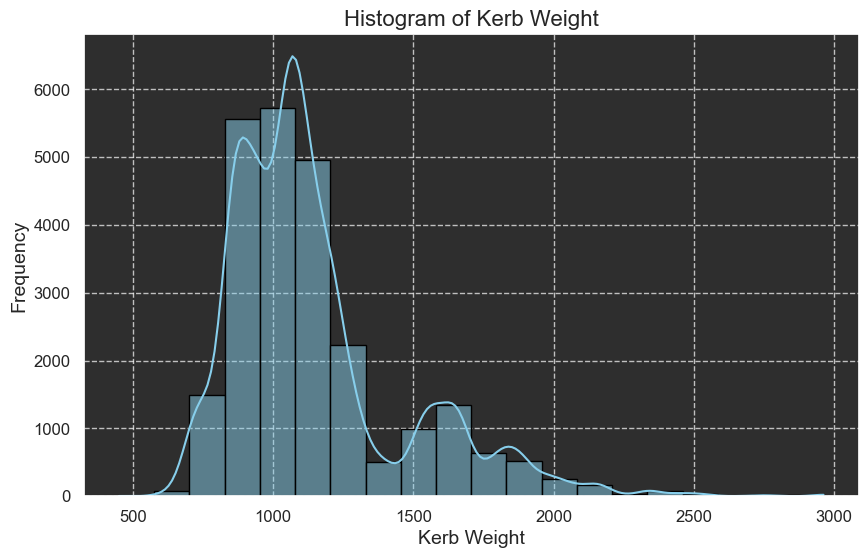

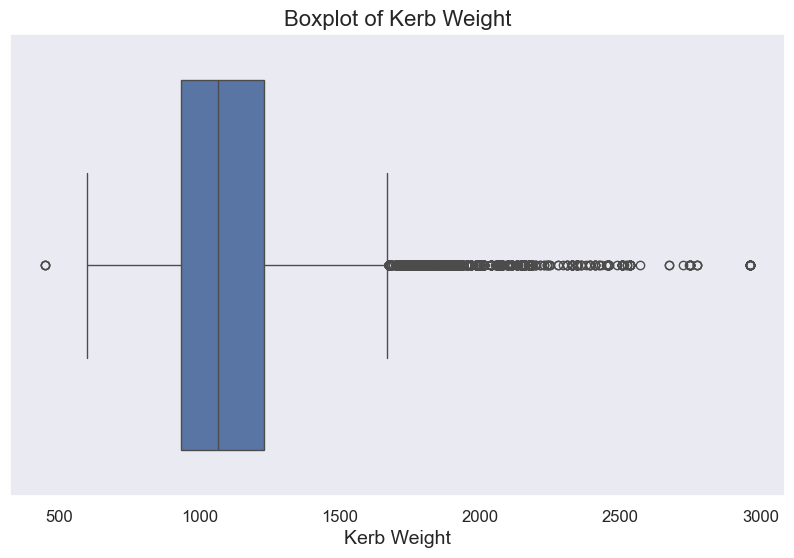

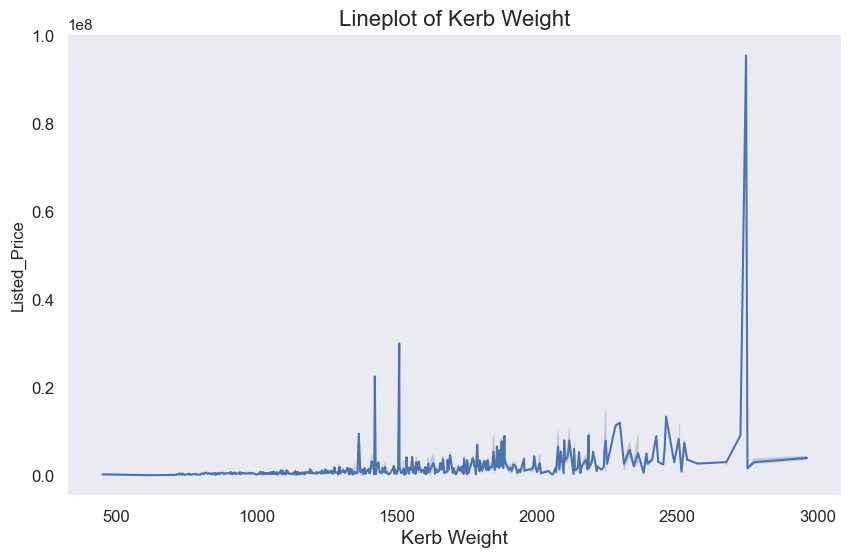

In [93]:
## Kerb Weight
numeric_column_analysis(cars_data_clean,'Kerb Weight',target=target)

Drop Kerb weight as it has lot of missing values and high correlation with max power delivered col.

Value Counts of Top 5 Frequent elements of Column: Top Speed


+-----------+--------+----------------+
| Top Speed | Count  | Mean of Target |
+-----------+--------+----------------+
|   165.0   | 1712.0 |   415570.52    |
|   160.0   | 1493.0 |   427598.22    |
|   190.0   | 1410.0 |   674875.89    |
|   170.0   | 1067.0 |   506470.15    |
|   172.0   | 1035.0 |    640567.8    |
+-----------+--------+----------------+


Basic Info of Column Top Speed
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        190         |
|   Distinct %   | 0.503084703577197  |
| Missing Count  |       15336        |
|   Missing %    | 40.60687902136786  |
|      Mean      | 173.00440060630376 |
|    Minimum     |        70.0        |
|    Maximum     |       340.0        |
+----------------+--------------------+


Quantile stats for column "Top Speed"
+---------------------+-------+
|      Statistic      | Value |


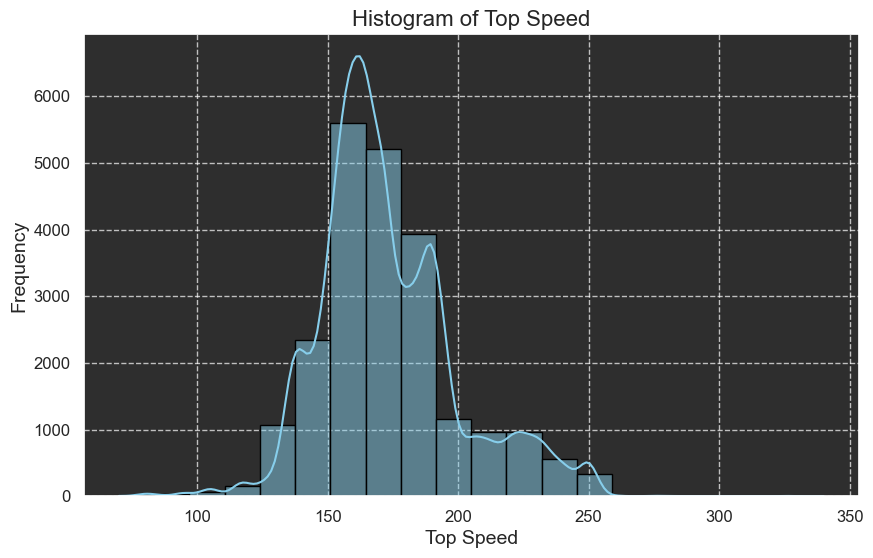

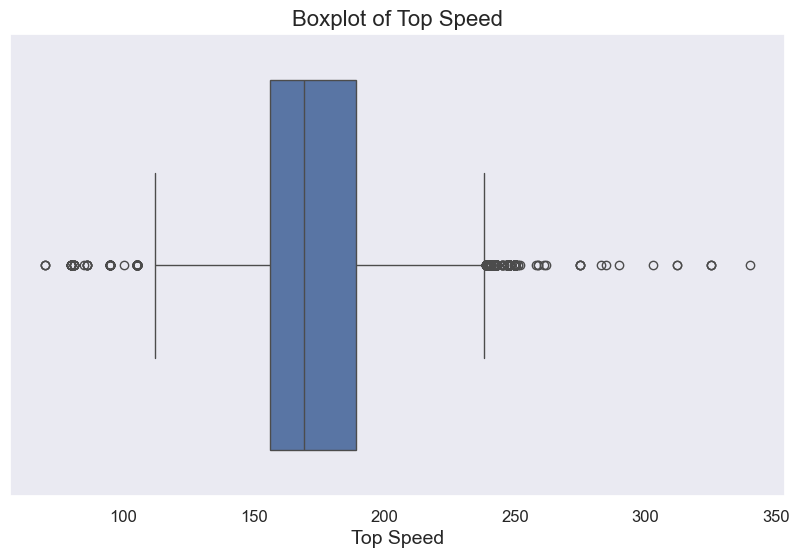

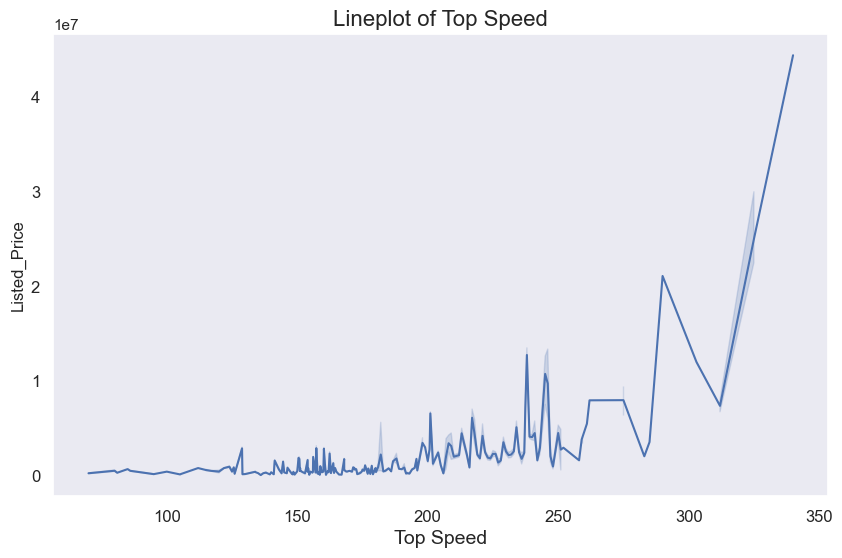

In [96]:
#Top Speed
numeric_column_analysis(cars_data_clean,'Top Speed',target=target)

Value Counts of Top 5 Frequent elements of Column: Acceleration


+--------------------+--------+----------------+
|    Acceleration    | Count  | Mean of Target |
+--------------------+--------+----------------+
| 14.601288731004539 | 4899.0 |   360837.55    |
| 12.121542835481426 | 4533.0 |   1304873.37   |
| 11.542291142777312 | 3376.0 |   575328.96    |
|        10.0        | 1210.0 |   727809.71    |
|       12.36        | 1143.0 |   691534.11    |
+--------------------+--------+----------------+


Basic Info of Column Acceleration
+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |         251         |
|   Distinct %   |  0.6646013715677708 |
| Missing Count  |          17         |
|   Missing %    | 0.04501284189901236 |
|      Mean      |  13.122395147671174 |
|    Minimum     |         2.5         |
|    Maximum     |        44.04        |
+----------------+---------------------+


Quan

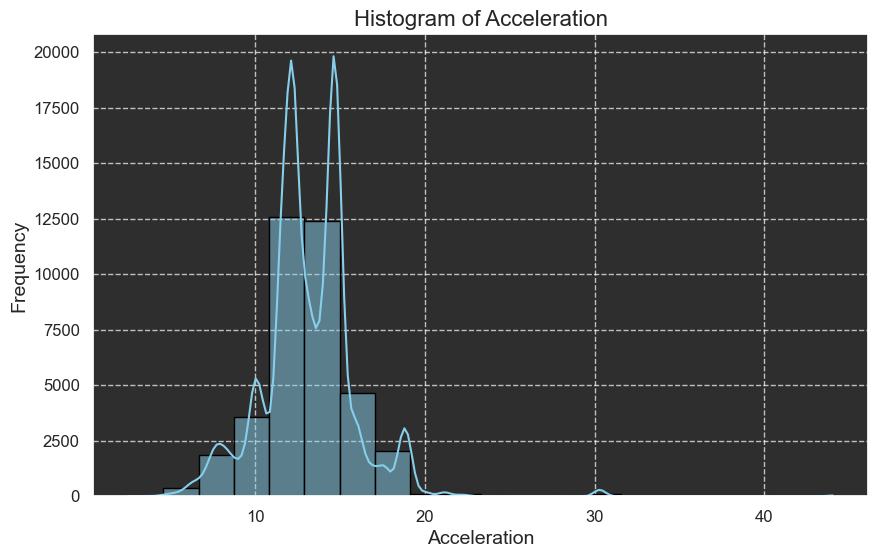

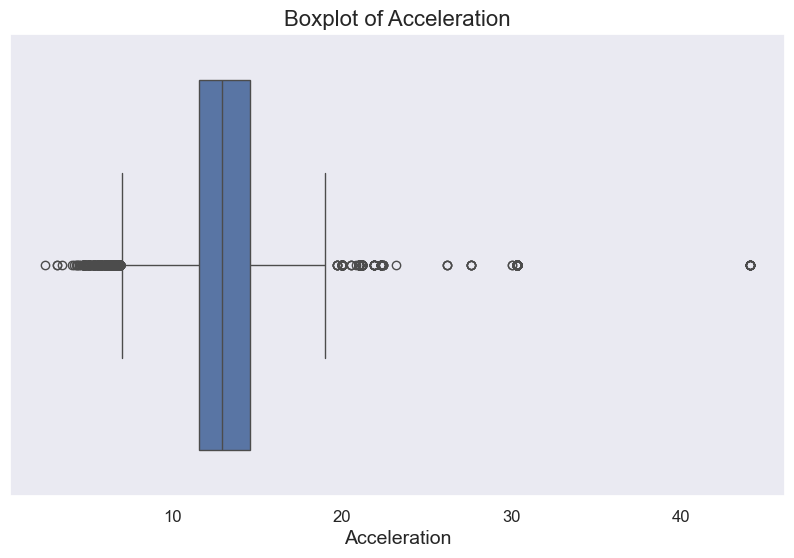

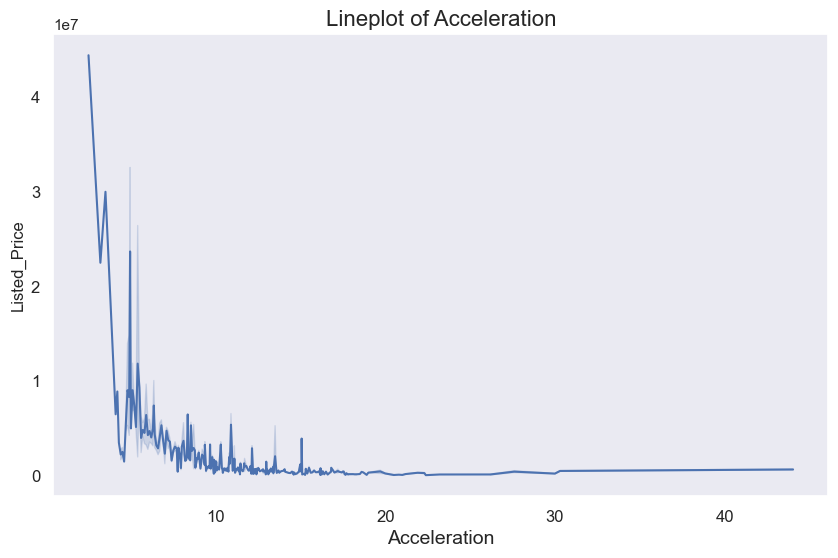

In [116]:
#Acceleration
numeric_column_analysis(cars_data_clean,'Acceleration',target=target)

Drop Top Speed. 
Replace Null of Accn with mean accn of its bodytype

Value Counts of Top 5 Frequent elements of Column: Wheel Base


+------------+--------+----------------+
| Wheel Base | Count  | Mean of Target |
+------------+--------+----------------+
|   2450.0   | 2402.0 |    574165.2    |
|   2600.0   | 2038.0 |   768448.43    |
|   2380.0   | 1737.0 |   235565.99    |
|   2425.0   | 1701.0 |   430559.15    |
|   2400.0   | 1674.0 |   350421.81    |
+------------+--------+----------------+


Basic Info of Column Wheel Base
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        219         |
|   Distinct %   | 0.5798713162284534 |
| Missing Count  |        554         |
|   Missing %    | 1.4668890830619323 |
|      Mean      | 2545.814043479429  |
|    Minimum     |       1840.0       |
|    Maximum     |       3772.0       |
+----------------+--------------------+


Quantile stats for column "Wheel Base"
+---------------------+--------+
|      Statistic   

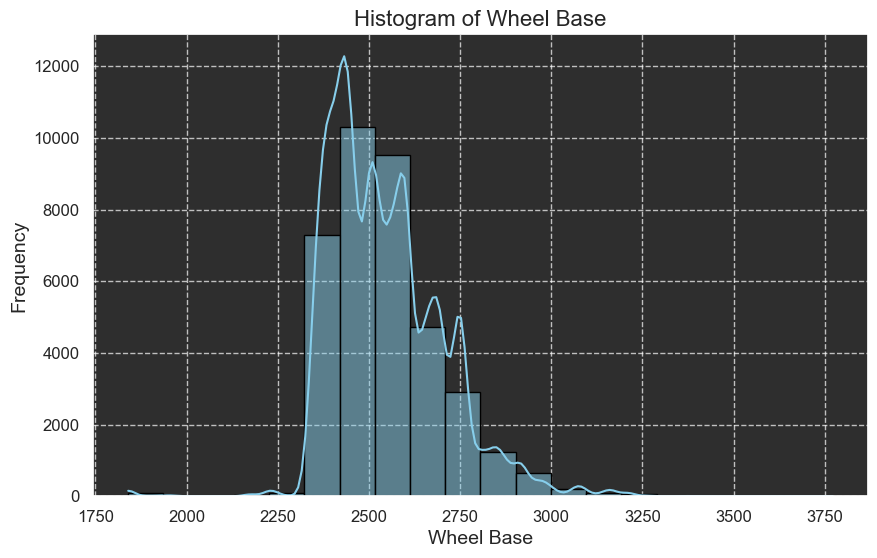

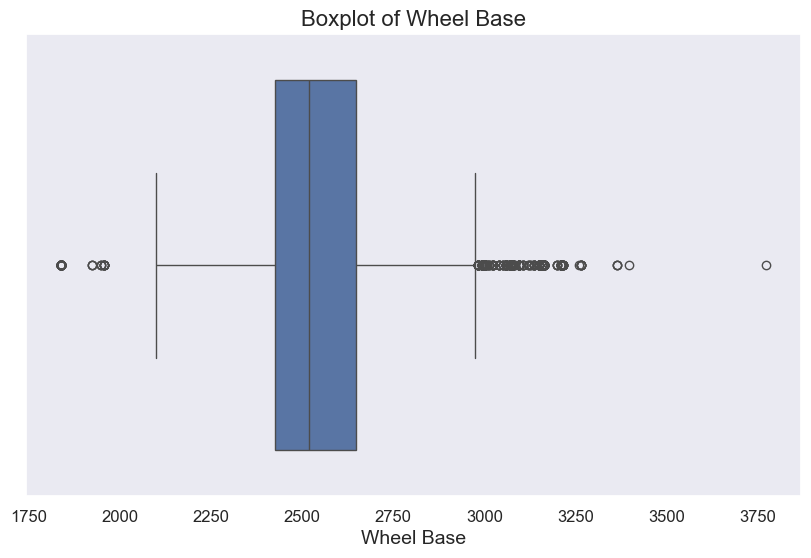

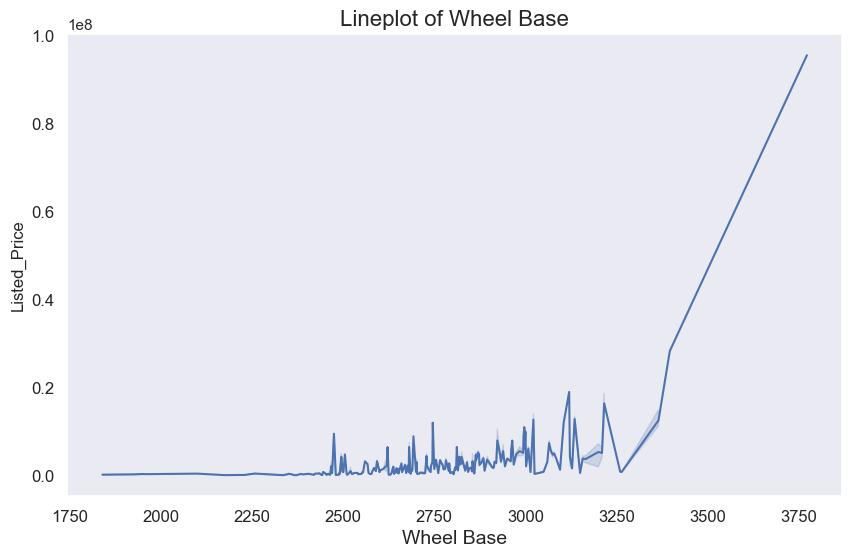

In [118]:
#WheelBase
numeric_column_analysis(cars_data_clean,'Wheel Base',target=target)


Value Counts of Top 5 Frequent elements of Column: Height


+--------+--------+----------------+
| Height | Count  | Mean of Target |
+--------+--------+----------------+
| 1505.0 | 2209.0 |   455223.61    |
| 1520.0 | 1828.0 |   422291.93    |
| 1530.0 | 1816.0 |   405504.27    |
| 1475.0 | 1761.0 |   496761.89    |
| 1495.0 | 1340.0 |   638380.15    |
+--------+--------+----------------+


Basic Info of Column Height
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        300         |
|   Distinct %   | 0.7943442688061007 |
| Missing Count  |        362         |
|   Missing %    | 0.958508751026028  |
|      Mean      | 1577.5219890388985 |
|    Minimum     |       1165.0       |
|    Maximum     |       2075.0       |
+----------------+--------------------+


Quantile stats for column "Height"
+---------------------+--------+
|      Statistic      | Value  |
+---------------------+--------+
|

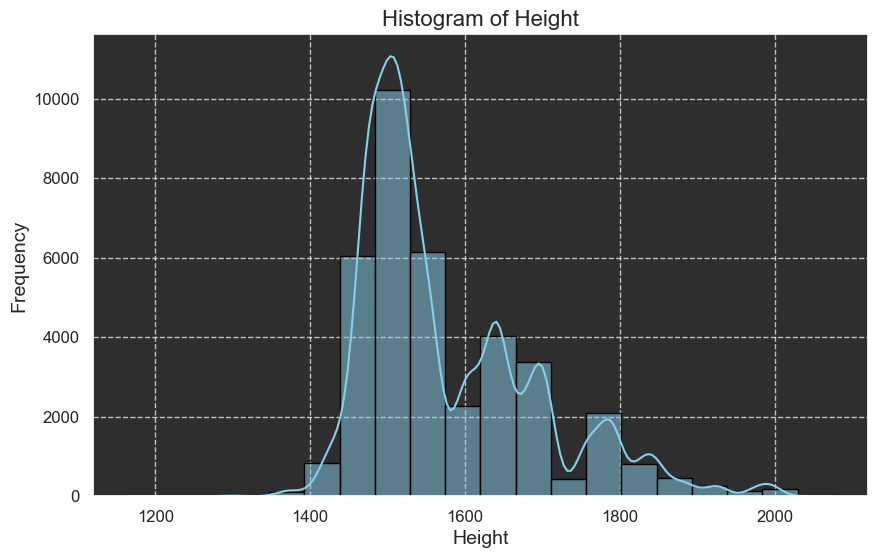

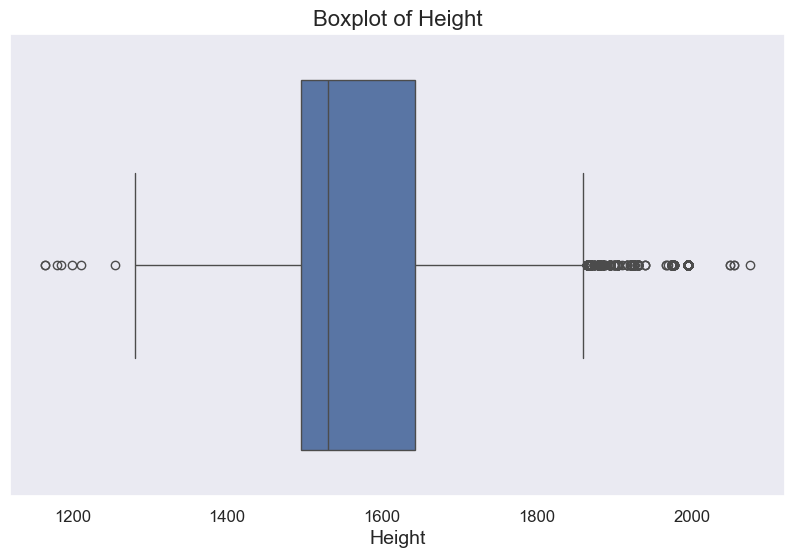

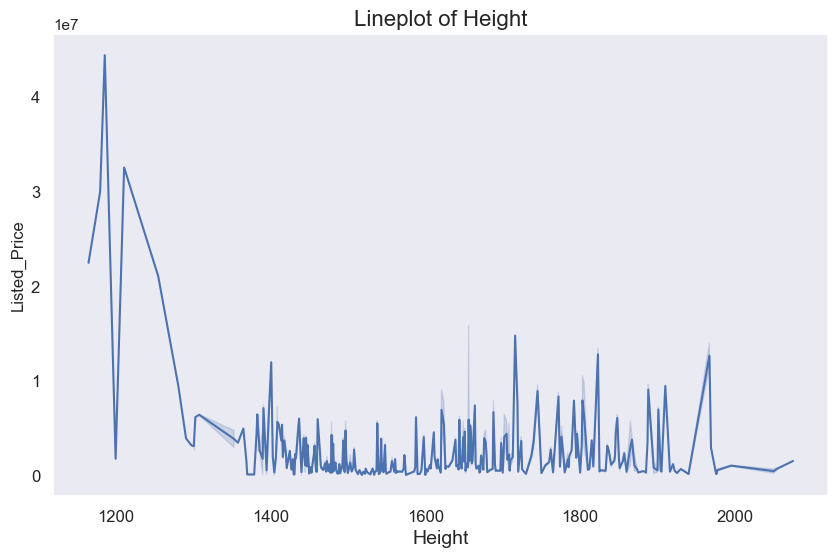

In [119]:
#Height

numeric_column_analysis(cars_data_clean,'Height',target=target)

Value Counts of Top 5 Frequent elements of Column: Length


+--------+--------+----------------+
| Length | Count  | Mean of Target |
+--------+--------+----------------+
| 3995.0 | 4627.0 |   656485.67    |
| 4440.0 | 1580.0 |   704196.73    |
| 3765.0 | 1084.0 |   450126.95    |
| 3985.0 | 1063.0 |   739603.55    |
| 3585.0 | 974.0  |   225077.34    |
+--------+--------+----------------+


Basic Info of Column Length
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        416         |
|   Distinct %   | 1.101490719411126  |
| Missing Count  |         0          |
|   Missing %    |        0.0         |
|      Mean      | 4112.3939430307955 |
|    Minimum     |       2752.0       |
|    Maximum     |       5982.0       |
+----------------+--------------------+


Quantile stats for column "Length"
+---------------------+--------+
|      Statistic      | Value  |
+---------------------+--------+
|

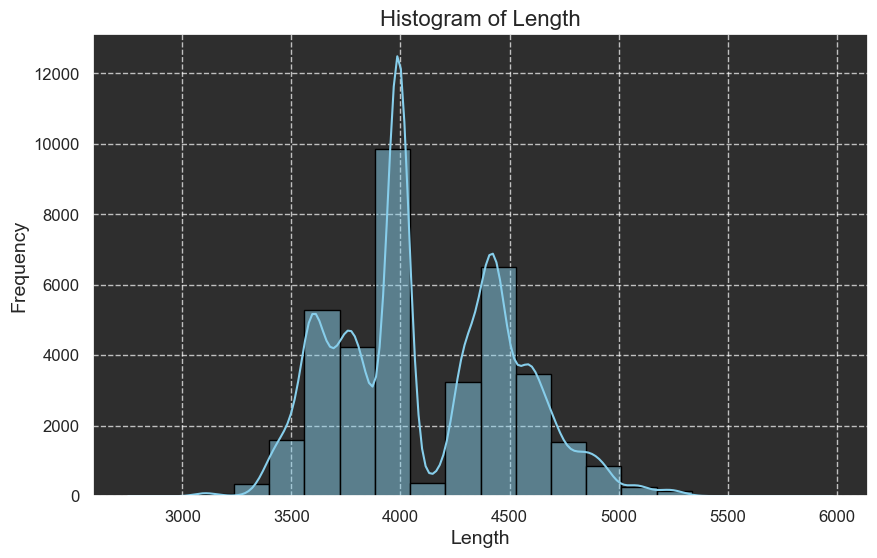

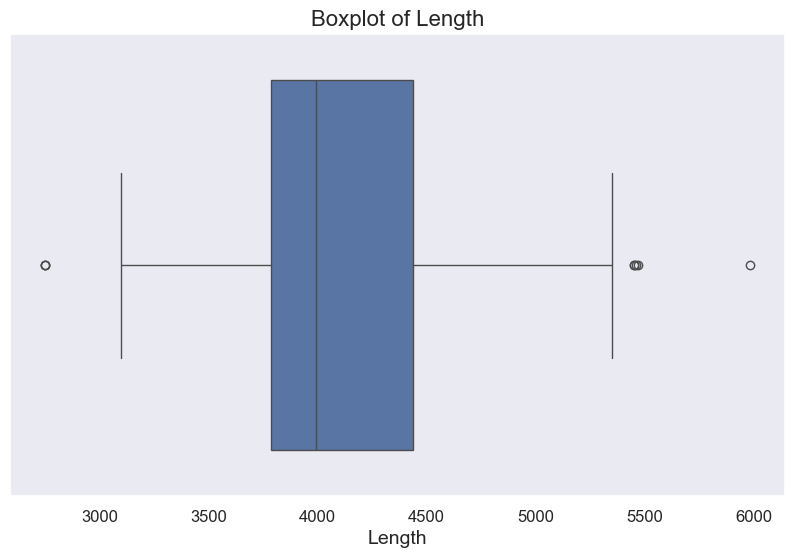

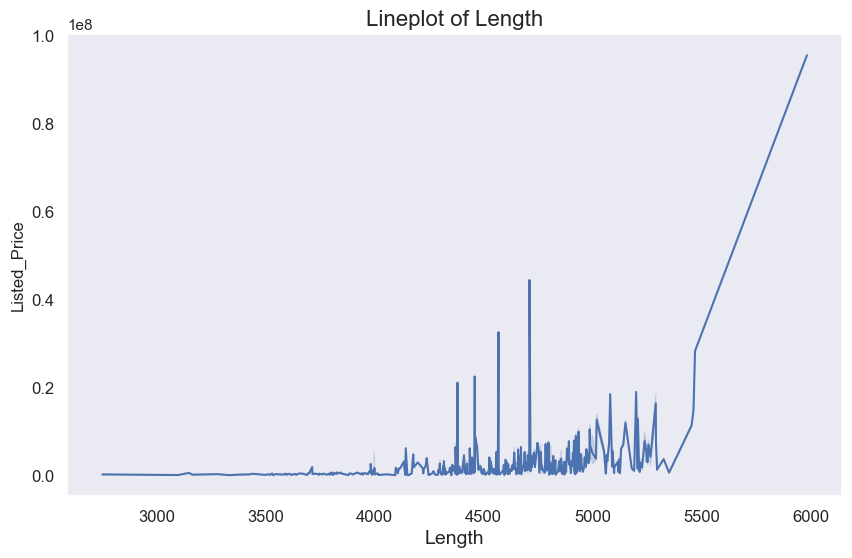

In [125]:
#Length
numeric_column_analysis(cars_data_clean,'Length',target=target)

Value Counts of Top 5 Frequent elements of Column: Width


+--------+--------+----------------+
| Width  | Count  | Mean of Target |
+--------+--------+----------------+
| 1695.0 | 3722.0 |   495030.24    |
| 1735.0 | 1731.0 |   554327.16    |
| 1680.0 | 1564.0 |   376232.45    |
| 1595.0 | 1338.0 |   209433.35    |
| 1660.0 | 1335.0 |   427866.18    |
+--------+--------+----------------+


Basic Info of Column Width
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        276         |
|   Distinct %   | 0.7307967273016126 |
| Missing Count  |        370         |
|   Missing %    | 0.9796912648608574 |
|      Mean      | 1725.6071342621067 |
|    Minimum     |       1312.0       |
|    Maximum     |       2236.0       |
+----------------+--------------------+


Quantile stats for column "Width"
+---------------------+--------+
|      Statistic      | Value  |
+---------------------+--------+
|   

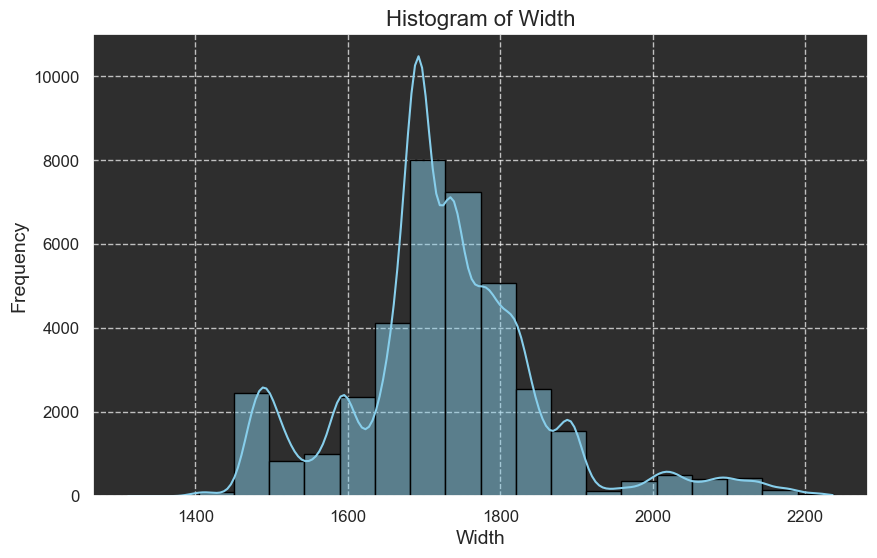

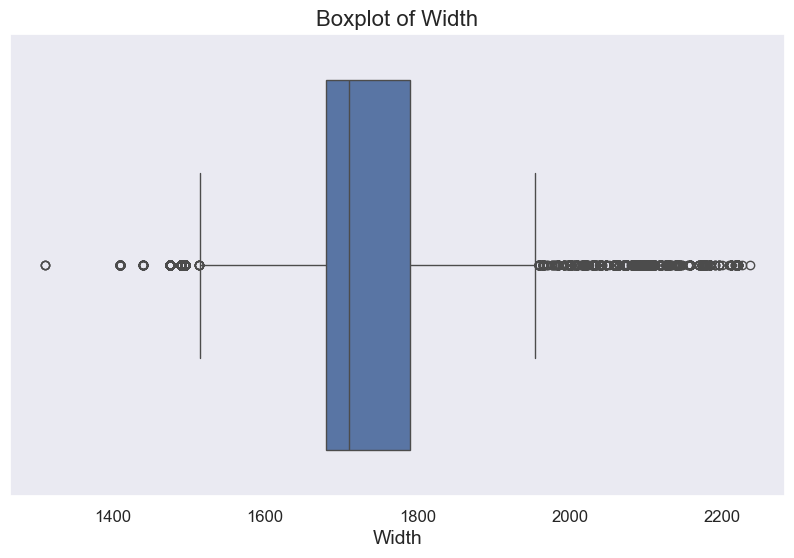

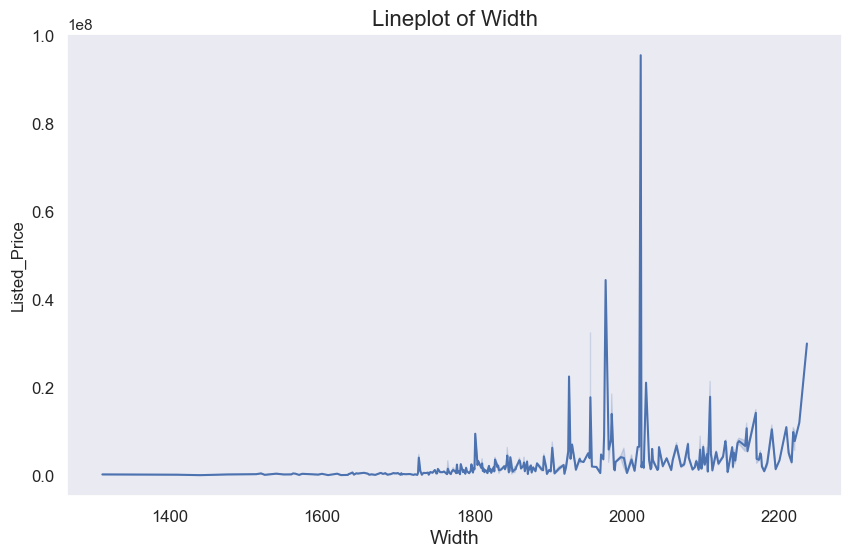

In [121]:
#Width
numeric_column_analysis(cars_data_clean,'Width',target=target)

Drop Height as it is not much correlated with the target
Length and Width have multicollinearity. So drop width
Fill Null of Length with mean length of body type

Value Counts of Top 5 Frequent elements of Column: Displacement


+--------------+--------+----------------+
| Displacement | Count  | Mean of Target |
+--------------+--------+----------------+
|    1197.0    | 5902.0 |    498783.3    |
|    1248.0    | 2765.0 |   517299.47    |
|    998.0     | 2540.0 |   442836.23    |
|    1497.0    | 2129.0 |   693086.93    |
|    1498.0    | 1839.0 |   937430.14    |
+--------------+--------+----------------+


Basic Info of Column Displacement
+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |         187         |
|   Distinct %   | 0.49514126088913607 |
| Missing Count  |          53         |
|   Missing %    | 0.14033415415574443 |
|      Mean      |  1438.6330010075833 |
|    Minimum     |         0.0         |
|    Maximum     |        6749.0       |
+----------------+---------------------+


Quantile stats for column "Displacement"
+----------------

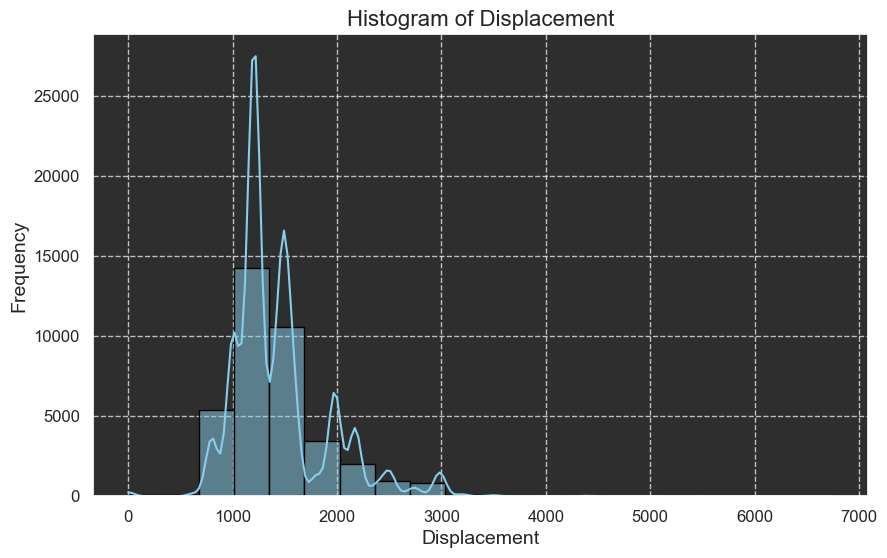

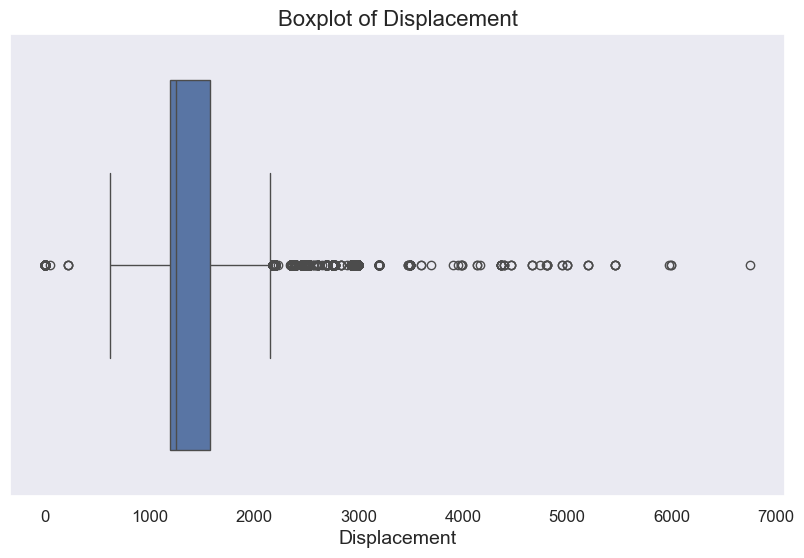

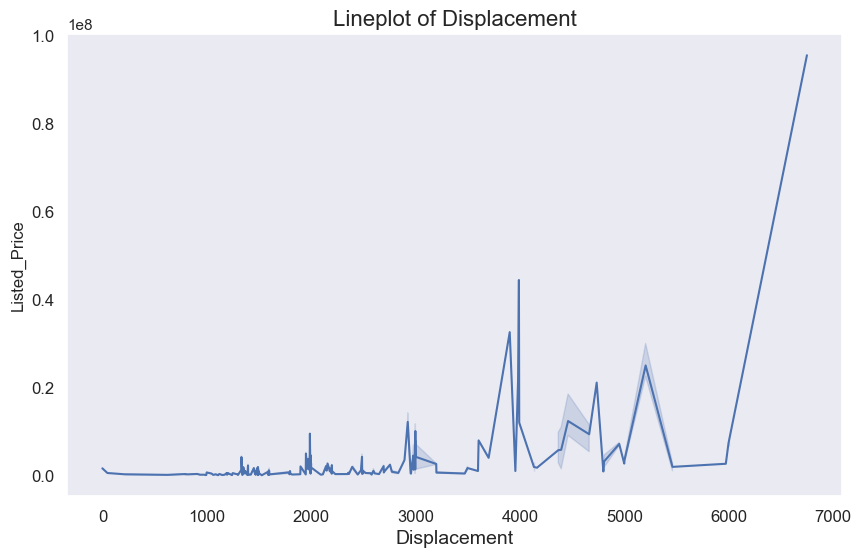

In [127]:
#Displacement
numeric_column_analysis(cars_data_clean,'Displacement',target=target)

Even though Displacement and Length have high multicollinearity, Keep them as they are important and have similar correlation to target

drop null values in displacement and drop engine_capacity column

Value Counts of Top 5 Frequent elements of Column: KM_Driven


+--------------------+-------+----------------+
|     KM_Driven      | Count | Mean of Target |
+--------------------+-------+----------------+
| 11.156250521031495 | 602.0 |   588695.67    |
| 11.695247021764184 | 570.0 |   443326.96    |
| 11.289781913656018 | 532.0 |   635781.58    |
| 11.002099841204238 | 528.0 |   723384.95    |
| 10.819778284410283 | 475.0 |   803047.79    |
+--------------------+-------+----------------+


Basic Info of Column KM_Driven
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |       23863        |
|   Distinct %   | 63.184790955066596 |
| Missing Count  |         0          |
|   Missing %    |        0.0         |
|      Mean      | 10.77293733841399  |
|    Minimum     |  4.61512051684126  |
|    Maximum     | 15.65606019136176  |
+----------------+--------------------+


Quantile stats for column "KM_

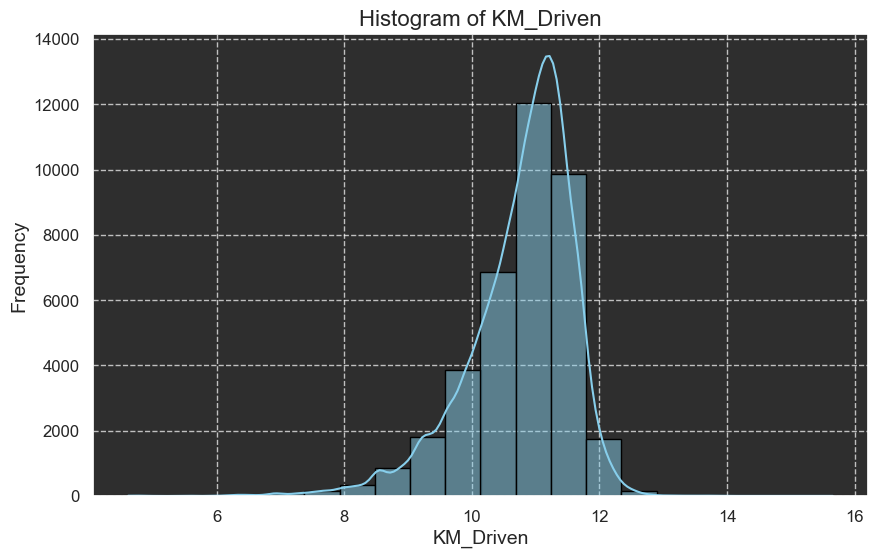

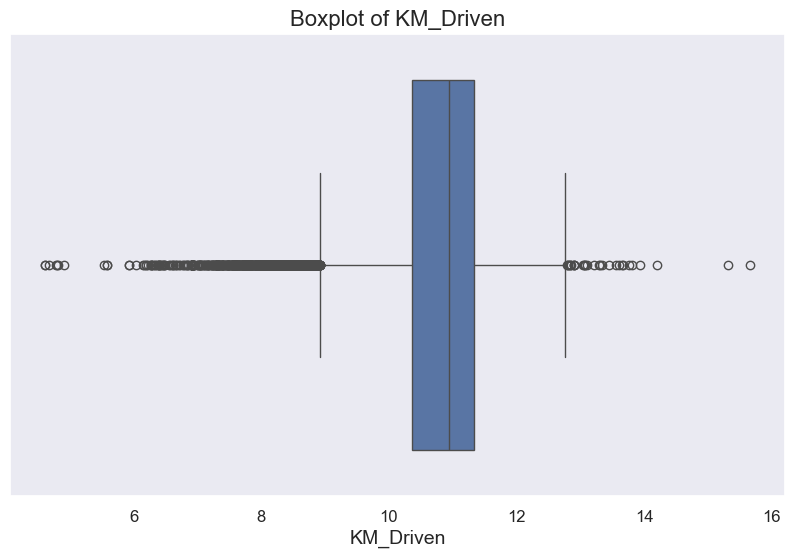

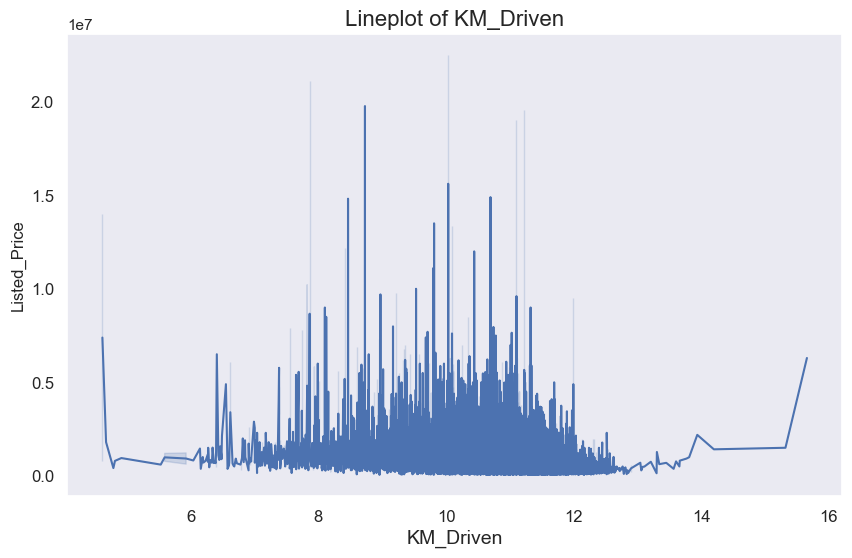

In [135]:
cars_data_clean['KM_Driven']=cars_data_clean['KM_Driven'].apply(np.log)

numeric_column_analysis(cars_data_clean,'KM_Driven',target=target)

Do a np.log transformation on KM Driven

In [136]:
discrete_cols

['Manufactured_Year',
 'Insurance_Premium',
 'discountValue',
 'No of Cylinder',
 'Valves_Per_Cylinder',
 'Seating Capacity',
 'Num_Doors',
 'Alloy Wheel Size']

Value Counts of Top 2 Frequent elements of Column: Insurance_Premium


+-------------------+---------+----------------+
| Insurance_Premium |  Count  | Mean of Target |
+-------------------+---------+----------------+
|        0.0        | 37381.0 |    780993.3    |
|        1.0        |  386.0  |   2627702.59   |
+-------------------+---------+----------------+


Basic Info of Column Insurance_Premium


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   2   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




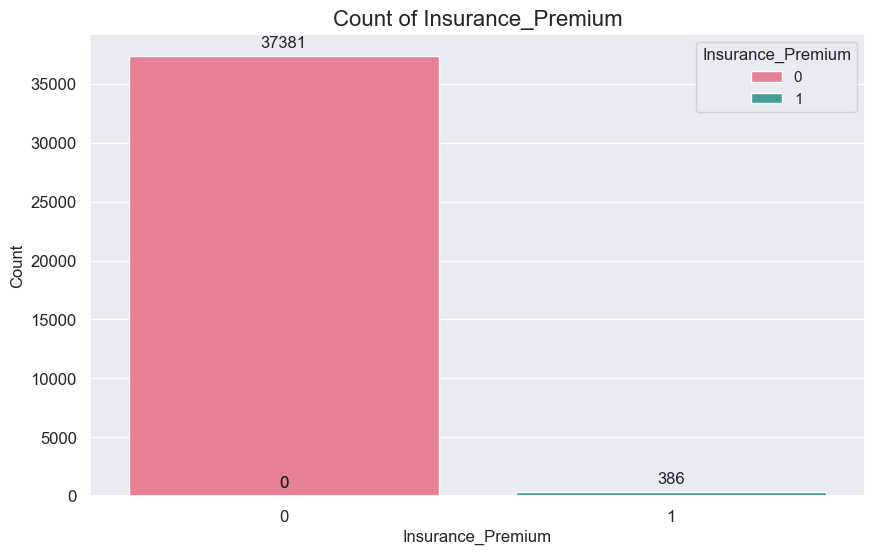

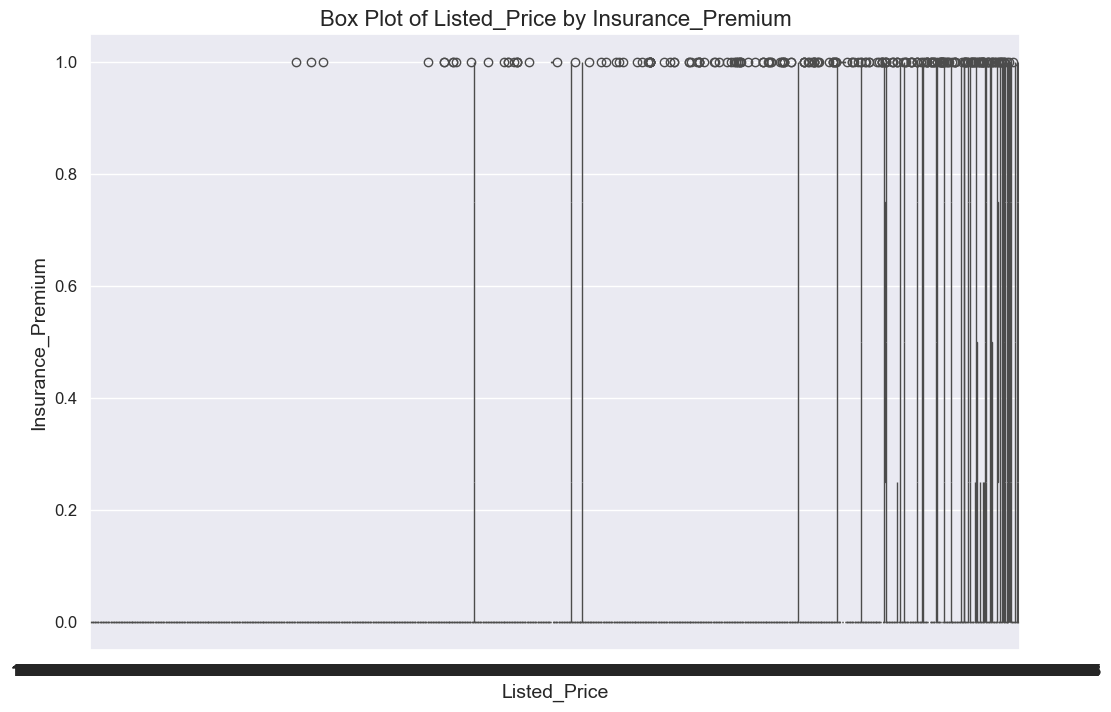

In [4]:
#Insurance_Premium

category_column_analysis(cars_data_clean,col='Insurance_Premium',target=target,n_rows=2)

In [5]:
annova_test(cars_data_clean, 'Insurance_Premium')

Null Hypothesis: There is no difference between groups of Insurance_Premium
+---------------------+-------------------+-----------------------+------+-----+-------+
|         F(c)        |    F statistic    |         pvalue        |  q   | dfd |  dfn  |
+---------------------+-------------------+-----------------------+------+-----+-------+
| 0.05129336405011733 | 180.4321691738312 | 4.846109718935747e-41 | 0.05 |  2  | 37767 |
+---------------------+-------------------+-----------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(180.4321691738312), pvalue=np.float64(4.846109718935747e-41))

For Insurance_Premium reject null hypothesis. and keep this value for final prediction. Since the data is highly imbalanced, we can remove it later if model performance is less

In [13]:
discrete_cols

['Manufactured_Year',
 'Insurance_Premium',
 'discountValue',
 'No of Cylinder',
 'Valves_Per_Cylinder',
 'Seating Capacity',
 'Num_Doors',
 'Alloy Wheel Size']

In [15]:
#Discount Value
category_column_analysis(cars_data_clean,col='discountValue',target=target,countplot=False,boxplot=False)

Value Counts of Top 5 Frequent elements of Column: discountValue


+---------------+---------+----------------+
| discountValue |  Count  | Mean of Target |
+---------------+---------+----------------+
|      0.0      | 37705.0 |   798762.01    |
|     5000.0    |   10.0  |   1100800.0    |
|    100000.0   |   7.0   |   3170000.0    |
|     3000.0    |   6.0   |    406000.0    |
|     4000.0    |   5.0   |    689400.0    |
+---------------+---------+----------------+


Basic Info of Column discountValue


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   30  |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




In [16]:
annova_test(cars_data_clean,'discountValue')

Null Hypothesis: There is no difference between groups of discountValue
+--------------------+--------------------+--------------------+------+-----+-------+
|        F(c)        |    F statistic     |       pvalue       |  q   | dfd |  dfn  |
+--------------------+--------------------+--------------------+------+-----+-------+
| 0.6163444676104796 | 0.7548066630556594 | 0.8246797291127188 | 0.05 |  30 | 37767 |
+--------------------+--------------------+--------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(0.7548066630556594), pvalue=np.float64(0.8246797291127188))

Accept Null Hypothese and drop discountvalue

Value Counts of Top 5 Frequent elements of Column: No of Cylinder


+----------------+---------+----------------+
| No of Cylinder |  Count  | Mean of Target |
+----------------+---------+----------------+
|      4.0       | 28722.0 |    832214.8    |
|      3.0       |  8076.0 |    436853.1    |
|      6.0       |  500.0  |   3676785.21   |
|      5.0       |  121.0  |   1301327.61   |
|      2.0       |   97.0  |   178190.66    |
+----------------+---------+----------------+


Basic Info of Column No of Cylinder


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         11         |
| Missing Count  |        143         |
|   Missing %    | 0.3786374347975746 |
+----------------+--------------------+




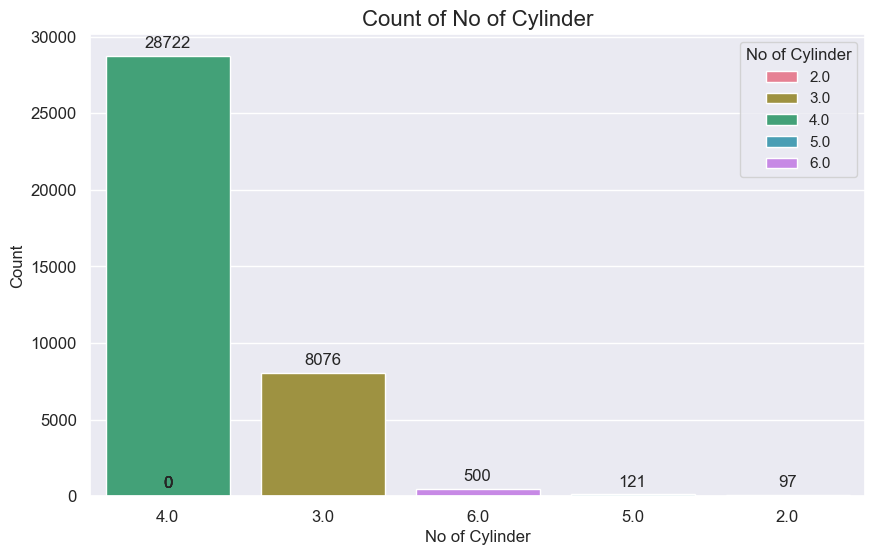

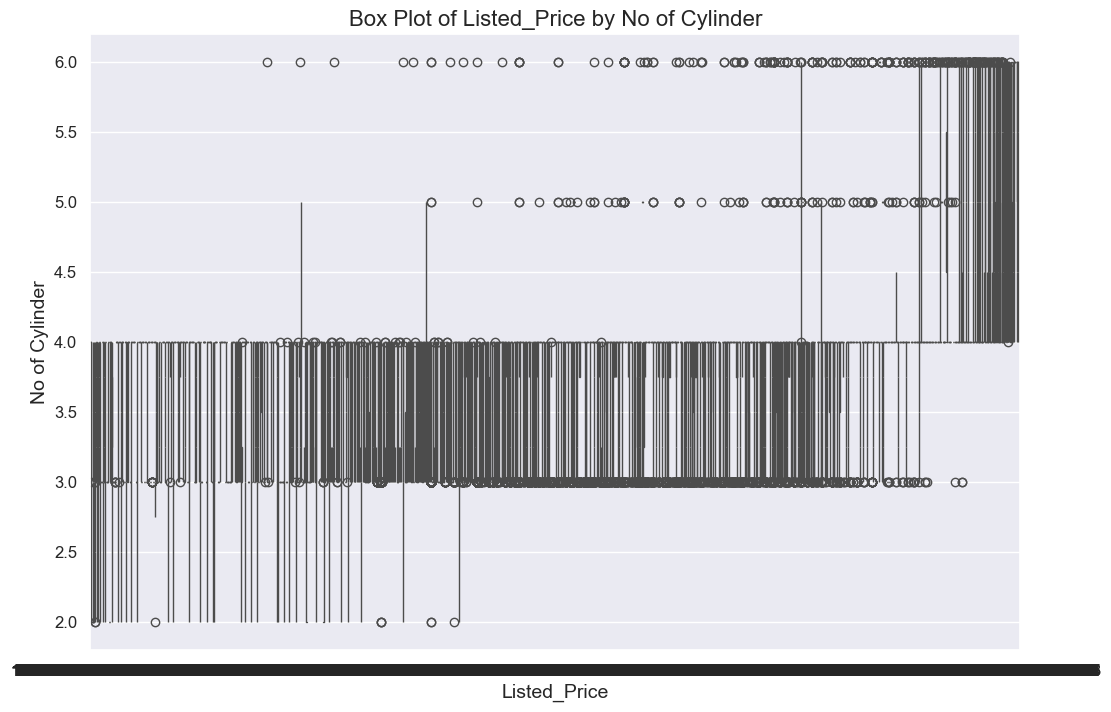

In [2]:
category_column_analysis(cars_data_clean,col='No of Cylinder',target=target)

In [5]:
annova_test(cars_data_clean,'No of Cylinder')

Null Hypothesis: There is no difference between groups of No of Cylinder
+---------------------+-------------------+-------------------------+------+-----+-------+
|         F(c)        |    F statistic    |          pvalue         |  q   | dfd |  dfn  |
+---------------------+-------------------+-------------------------+------+-----+-------+
| 0.41586773577121783 | 84.77070446945498 | 1.1500287530297557e-173 | 0.05 |  11 | 37767 |
+---------------------+-------------------+-------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(84.77070446945498), pvalue=np.float64(1.1500287530297557e-173))

If its an electric car then change no of cylinder to 0 and replace null values with the mode no of cylinder value of that car's fuel type

Value Counts of Top 5 Frequent elements of Column: Seating Capacity


+------------------+---------+----------------+
| Seating Capacity |  Count  | Mean of Target |
+------------------+---------+----------------+
|       5.0        | 32644.0 |   737179.81    |
|       7.0        |  3761.0 |   1178002.23   |
|       8.0        |  427.0  |   669879.09    |
|       4.0        |  410.0  |   1672108.6    |
|       6.0        |  393.0  |   1240058.71   |
+------------------+---------+----------------+


Basic Info of Column Seating Capacity


+----------------+----------------------+
|    Measure     |        Value         |
+----------------+----------------------+
| Distinct Count |          11          |
| Missing Count  |          18          |
|   Missing %    | 0.047660656128366036 |
+----------------+----------------------+




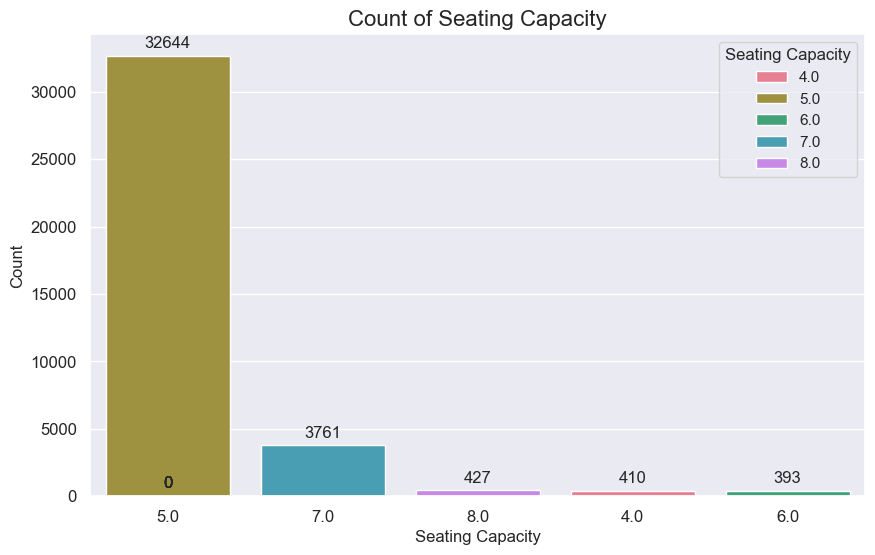

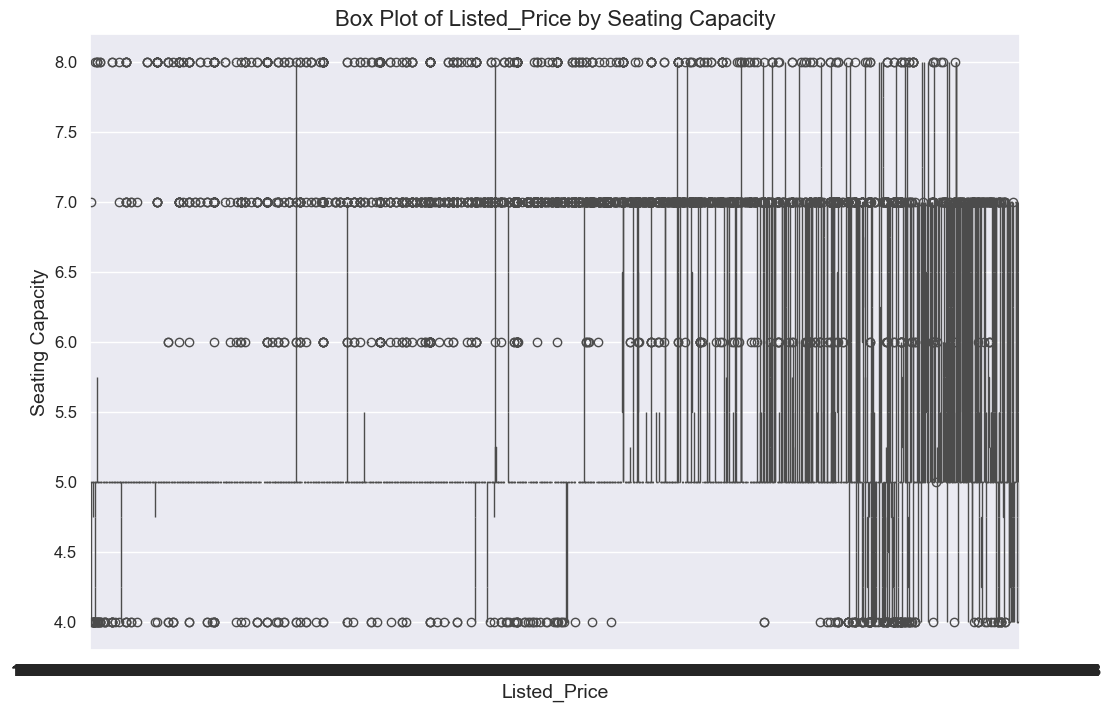

In [18]:
#Seating Capacity
category_column_analysis(cars_data_clean,'Seating Capacity',target=target)

In [19]:
annova_test(cars_data_clean,'Seating Capacity')

Null Hypothesis: There is no difference between groups of Seating Capacity
+---------------------+-------------------+-------------------------+------+-----+-------+
|         F(c)        |    F statistic    |          pvalue         |  q   | dfd |  dfn  |
+---------------------+-------------------+-------------------------+------+-----+-------+
| 0.41586773577121783 | 68.62640919586926 | 1.1325026897341754e-139 | 0.05 |  11 | 37767 |
+---------------------+-------------------+-------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(68.62640919586926), pvalue=np.float64(1.1325026897341754e-139))

drop null values and remove rows which have seating capacity as 0

Value Counts of Top 5 Frequent elements of Column: Num_Doors


+-----------+---------+----------------+
| Num_Doors |  Count  | Mean of Target |
+-----------+---------+----------------+
|    5.0    | 25368.0 |   792139.38    |
|    4.0    | 12019.0 |   777307.41    |
|    3.0    |  261.0  |   1340091.33   |
|    2.0    |   53.0  |   6032559.91   |
|    6.0    |   22.0  |   255000.68    |
+-----------+---------+----------------+


Basic Info of Column Num_Doors


+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |          5          |
| Missing Count  |          44         |
|   Missing %    | 0.11650382609156142 |
+----------------+---------------------+




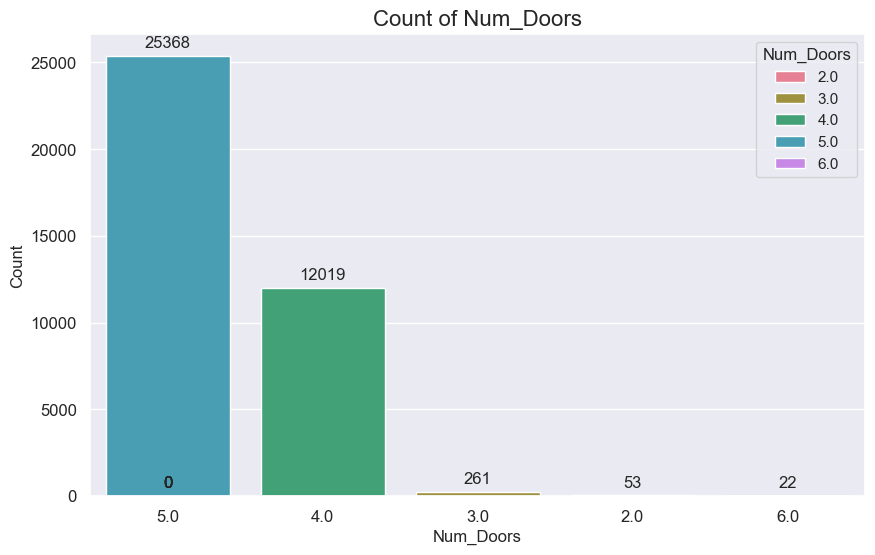

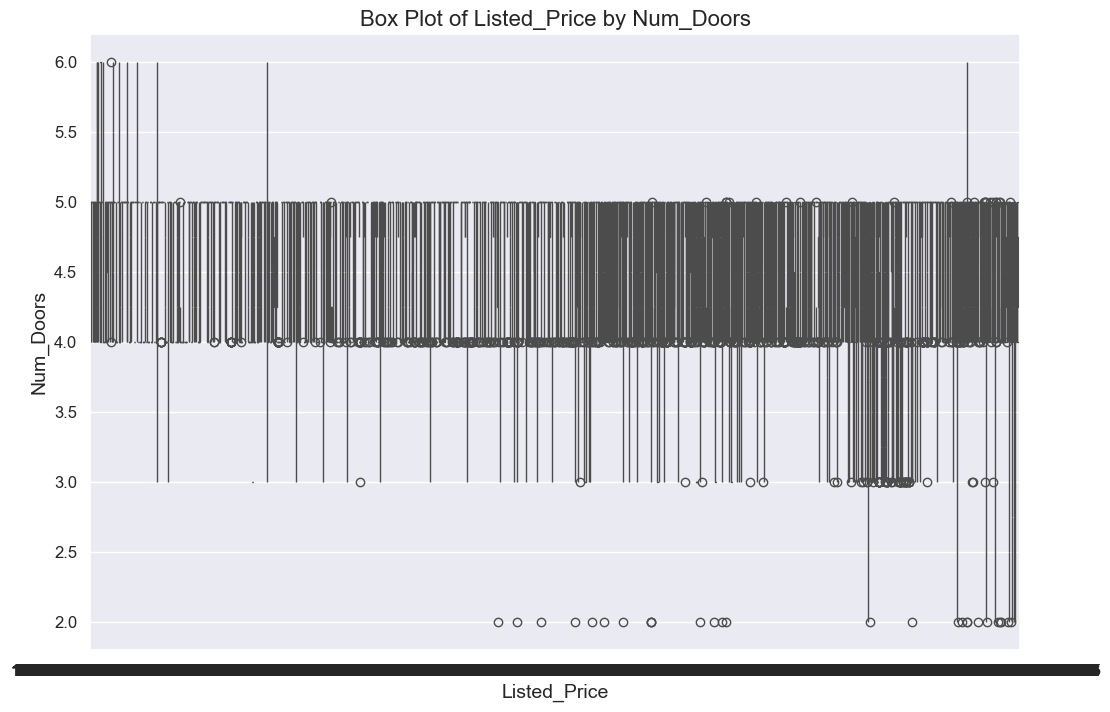

In [23]:
#Num_Doors
category_column_analysis(cars_data_clean,'Num_Doors',target=target)

In [24]:
annova_test(cars_data_clean,'Num_Doors')

Null Hypothesis: There is no difference between groups of Num_Doors
+---------------------+------------------+----------------------+------+-----+-------+
|         F(c)        |   F statistic    |        pvalue        |  q   | dfd |  dfn  |
+---------------------+------------------+----------------------+------+-----+-------+
| 0.22908962071176103 | 75.7567097712921 | 4.37855918170438e-64 | 0.05 |  5  | 37767 |
+---------------------+------------------+----------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(75.7567097712921), pvalue=np.float64(4.37855918170438e-64))

In [25]:
cars_data_clean.dropna(subset=['Num_Doors'],inplace=True)

Empty DataFrame
Columns: [brand_name, model, location, state, Manufactured_Year, owner_type, Body_Type, Transmission_Type, Insurance_Premium, Fuel_Type, KM_Driven, discountValue, Car_Seller_Type, carType, top_features, comfort_features, interior_features, exterior_features, safety_features, Color, Engine Type, Displacement, No of Cylinder, Valves_Per_Cylinder, Valve_Config, Turbo Charger, Super Charger, Length, Width, Height, Wheel Base, Front Tread, Rear Tread, Kerb Weight, Gear Box, Drive Type, Seating Capacity, Steering Type, Turning Radius, Front Brake Type, Rear Brake Type, Top Speed, Acceleration, Tyre Type, Num_Doors, Cargo_Volume, engine_capacity, mileage, Fuel Suppy System, Alloy Wheel Size, Listed_Price, Max Power Delivered, Max Power At, Max Torque Delivered, Max Torque At]
Index: []

[0 rows x 55 columns]

Value Counts of Top 5 Frequent elements of Column: Alloy Wheel Size


+------------------+--------+----------------+
| Alloy Wheel Size | Count  | Mean of Target |
+------------------+--------+----------------+
|       16.0       | 6194.0 |   906681.51    |
|       15.0       | 4980.0 |   509522.91    |
|       14.0       | 4109.0 |   302374.54    |
|       17.0       | 3661.0 |   1574136.82   |
|       13.0       | 2047.0 |   186402.51    |
+------------------+--------+----------------+


Basic Info of Column Alloy Wheel Size


+----------------+-------------------+
|    Measure     |       Value       |
+----------------+-------------------+
| Distinct Count |         11        |
| Missing Count  |       14445       |
|   Missing %    | 38.24767654301374 |
+----------------+-------------------+




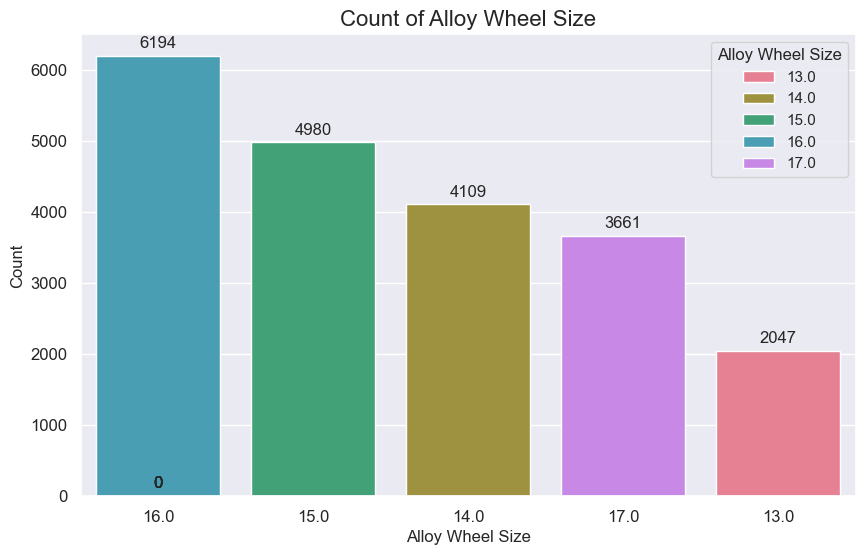

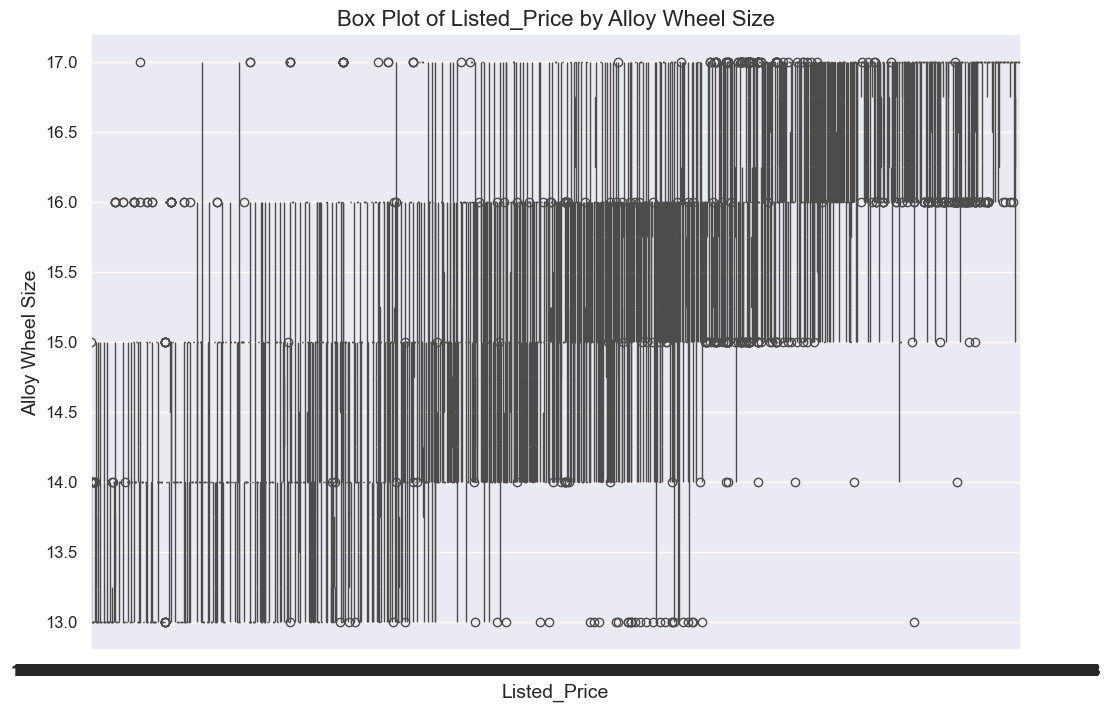

In [27]:
#Alloy Wheel Size
category_column_analysis(cars_data_clean,'Alloy Wheel Size',target=target)

In [26]:
annova_test(cars_data_clean,'Alloy Wheel Size')

Null Hypothesis: There is no difference between groups of Alloy Wheel Size
+---------------------+--------------------+------------------------+------+-----+-------+
|         F(c)        |    F statistic     |         pvalue         |  q   | dfd |  dfn  |
+---------------------+--------------------+------------------------+------+-----+-------+
| 0.41586773577121783 | 104.06305964462048 | 2.193673984136089e-212 | 0.05 |  11 | 37767 |
+---------------------+--------------------+------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(104.06305964462048), pvalue=np.float64(2.193673984136089e-212))

drop rows will alloy wheel size = 7 (as there are only 2 rows). For Null values, replace them with mode Alloy Wheel Size of that tyre type

In [38]:
cars_data_clean=cars_data_clean[cars_data_clean['Alloy Wheel Size']!=7]
cars_data_clean=cars_data_clean.reset_index()
cars_data_clean.drop(columns=['index'],axis=1,inplace=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Alloy Wheel Size'])=='nan':
        tyre_type=cars_data_clean.loc[row,'Tyre Type']
        if str(tyre_type)=='nan':
            continue
        else:
            tyre_mode=cars_data_clean[cars_data_clean['Tyre Type']==tyre_type]['Alloy Wheel Size'].mode()
            try:
                cars_data_clean.loc[row,'Alloy Wheel Size']=tyre_mode[0]
            except:
                continue
cars_data_clean.dropna(subset=['Alloy Wheel Size'],inplace=True)

np.int64(223)

Value Counts of Top 5 Frequent elements of Column: Valves_Per_Cylinder


+---------------------+---------+----------------+
| Valves_Per_Cylinder |  Count  | Mean of Target |
+---------------------+---------+----------------+
|         4.0         | 35003.0 |   815721.43    |
|         2.0         |  1500.0 |    679447.6    |
|         3.0         |  1023.0 |   265215.45    |
|         5.0         |   7.0   |   766250.86    |
|         1.0         |   4.0   |    169750.0    |
+---------------------+---------+----------------+


Basic Info of Column Valves_Per_Cylinder
+----------------+----------------------+
|    Measure     |        Value         |
+----------------+----------------------+
| Distinct Count |          7           |
|   Distinct %   | 0.018534699605475678 |
| Missing Count  |         228          |
|   Missing %    |  0.6037016442926364  |
|      Mean      |  3.8939769306587815  |
|    Minimum     |         1.0          |
|    Maximum     |         48.0         |
+----

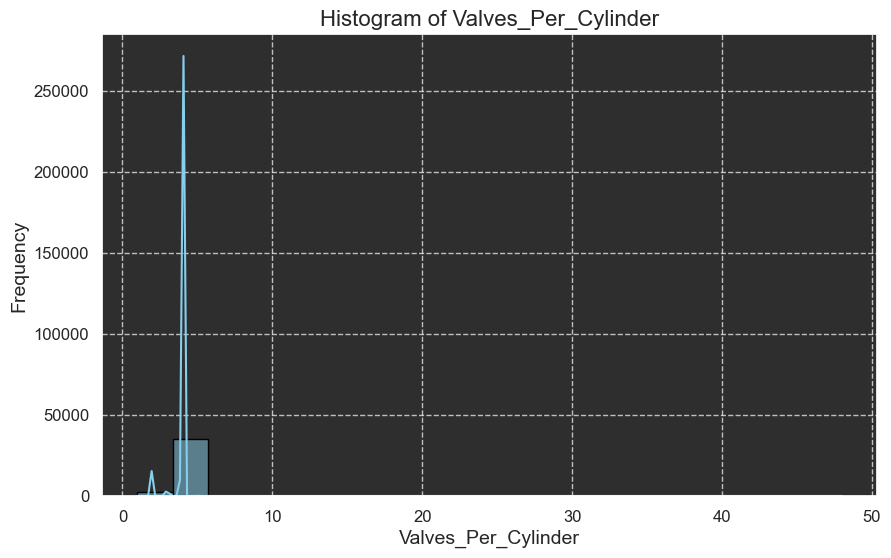

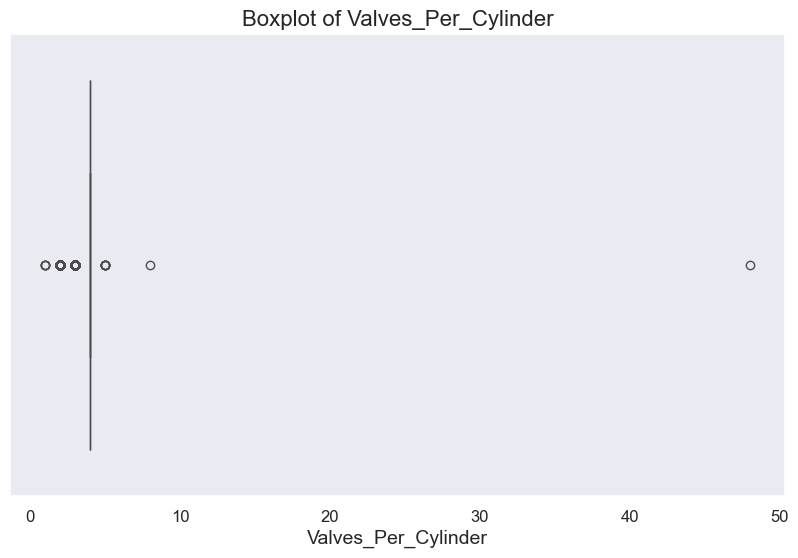

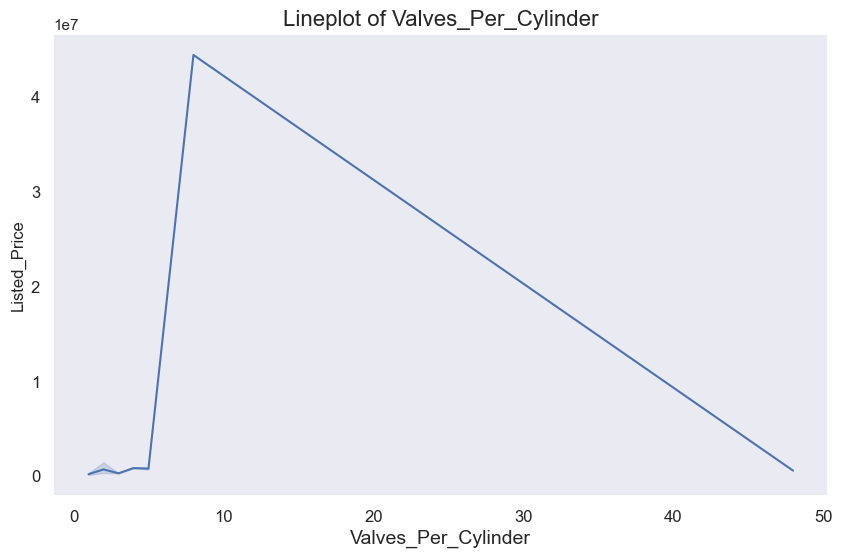

In [3]:
#Valves Per Cylinder
numeric_column_analysis(cars_data_clean,'Valves_Per_Cylinder',target=target)

In [4]:
annova_test(cars_data_clean,'Valves_Per_Cylinder')

Null Hypothesis: There is no difference between groups of Valves_Per_Cylinder
+---------------------+-------------------+-------------------------+------+-----+-------+
|         F(c)        |    F statistic    |          pvalue         |  q   | dfd |  dfn  |
+---------------------+-------------------+-------------------------+------+-----+-------+
| 0.30960980515449965 | 93.23706977895266 | 1.0048527927599075e-116 | 0.05 |  7  | 37767 |
+---------------------+-------------------+-------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(93.23706977895266), pvalue=np.float64(1.0048527927599075e-116))

Drop null values of valves_per_cylinder

Value Counts of Top 5 Frequent elements of Column: mileage


+--------------------+--------+----------------+
|      mileage       | Count  | Mean of Target |
+--------------------+--------+----------------+
|        18.9        | 1145.0 |   381454.02    |
|        17.0        | 1059.0 |   543864.42    |
|        18.6        | 1036.0 |   534832.76    |
|        18.0        | 712.0  |   722715.93    |
| 17.394373165162552 | 612.0  |   2141633.47   |
+--------------------+--------+----------------+


Basic Info of Column mileage
+----------------+-----------------------+
|    Measure     |         Value         |
+----------------+-----------------------+
| Distinct Count |          630          |
|   Distinct %   |   1.6681229644928113  |
| Missing Count  |           1           |
|   Missing %    | 0.0026478142293536685 |
|      Mean      |   19.32430179081231   |
|    Minimum     |          7.08         |
|    Maximum     |         120.0         |
+----------------+-------------------

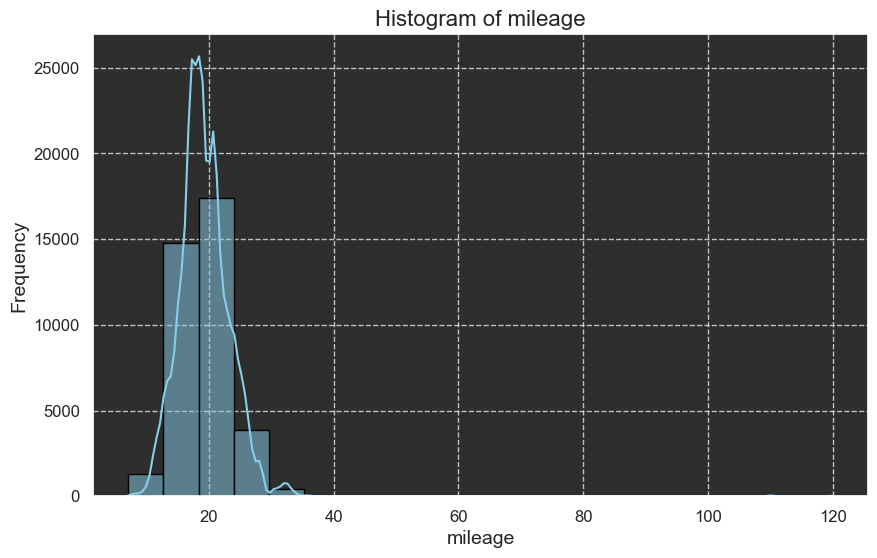

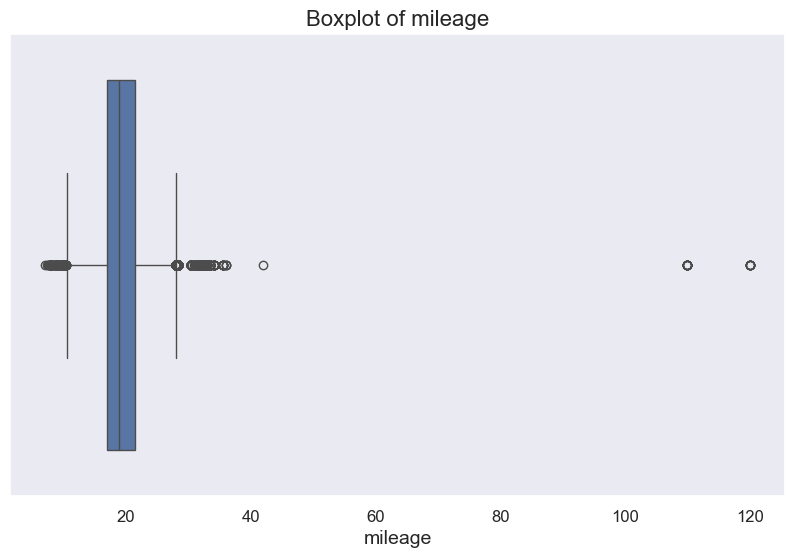

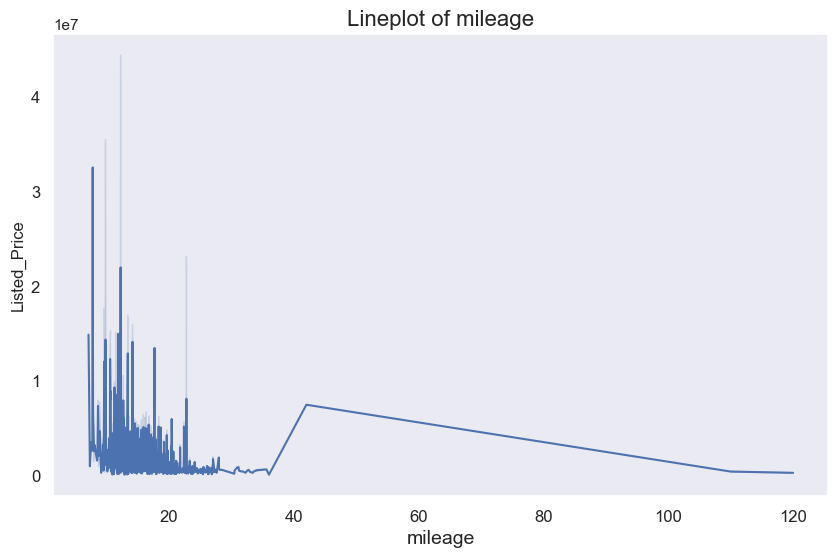

In [37]:
#Mileage

cars_data_clean[['mileage','Cargo_Volume','Listed_Price']].corr()

numeric_column_analysis(cars_data_clean,'mileage',target=target)

Replace null values of mileage with the mean mileage of bodytype

Value Counts of Top 5 Frequent elements of Column: Cargo_Volume


+--------------+--------+----------------+
| Cargo_Volume | Count  | Mean of Target |
+--------------+--------+----------------+
|    510.0     | 1849.0 |   665529.25    |
|    400.0     | 1415.0 |    727273.8    |
|    256.0     | 1013.0 |   438263.97    |
|    460.0     | 935.0  |   973667.33    |
|    339.0     | 849.0  |    636035.0    |
+--------------+--------+----------------+


Basic Info of Column Cargo_Volume
+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        203         |
|   Distinct %   | 0.5375062885587948 |
| Missing Count  |        6721        |
|   Missing %    | 17.795959435486004 |
|      Mean      |  363.146299040134  |
|    Minimum     |        20.0        |
|    Maximum     |       2055.0       |
+----------------+--------------------+


Quantile stats for column "Cargo_Volume"
+---------------------+-----

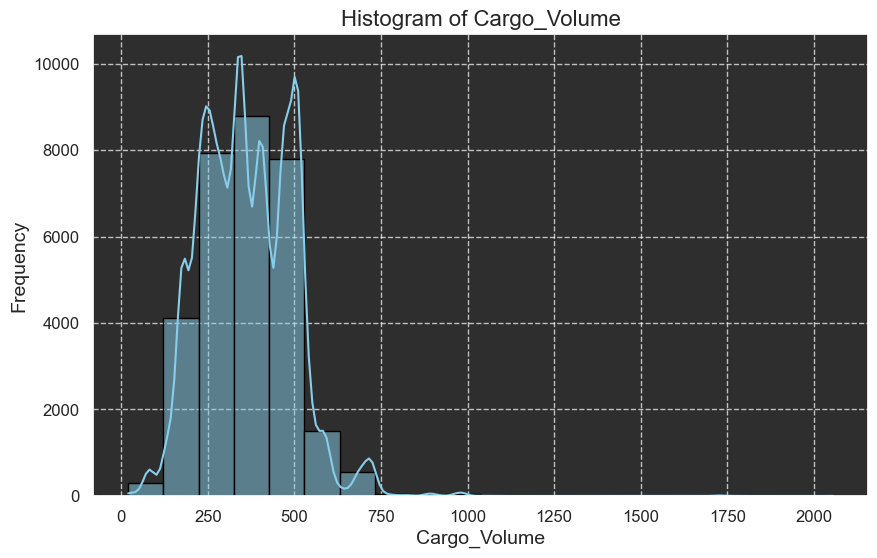

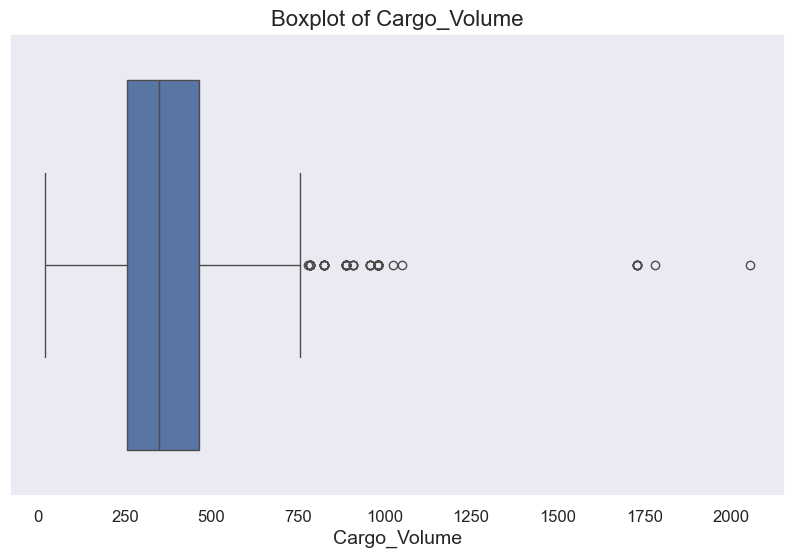

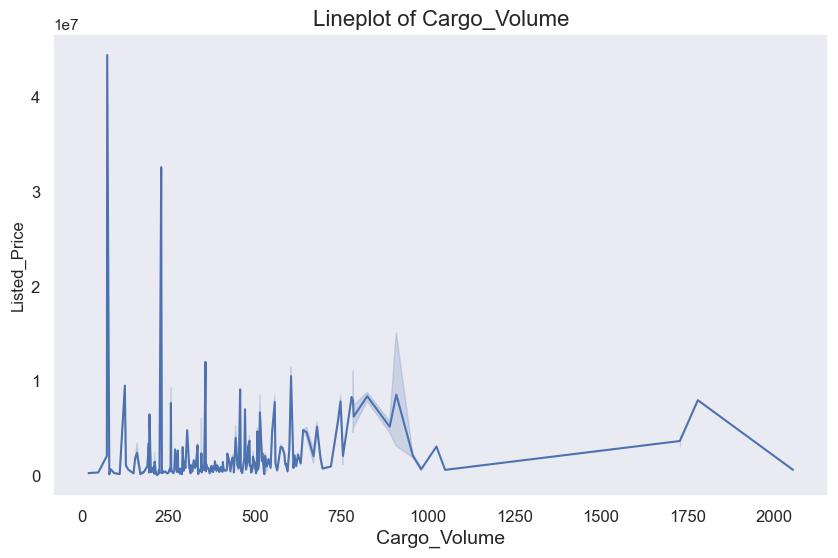

In [39]:
#Cargo_Volume
cars_data_clean['Cargo_Volume']

numeric_column_analysis(cars_data_clean,'Cargo_Volume',target=target)

Since CargoVolume has lot of null values. Drop this column

In [43]:
cars_data_clean['Fuel_Type'].isna().sum()

np.int64(0)

Value Counts of Top 5 Frequent elements of Column: Fuel Suppy System


+----------------------------+-------+----------------+
|     Fuel Suppy System      | Count | Mean of Target |
+----------------------------+-------+----------------+
| Multi-Point Fuel Injection | 14039 |   476472.06    |
|   Common Rail Injection    | 11804 |   970865.68    |
|      Direct Injection      |  3835 |   1226799.99   |
| Electronic Fuel Injection  |  1593 |   404450.08    |
| Gasoline Direct Injection  |  653  |   1352773.43   |
+----------------------------+-------+----------------+


Basic Info of Column Fuel Suppy System


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         14         |
| Missing Count  |        5493        |
|   Missing %    | 14.544443561839701 |
+----------------+--------------------+




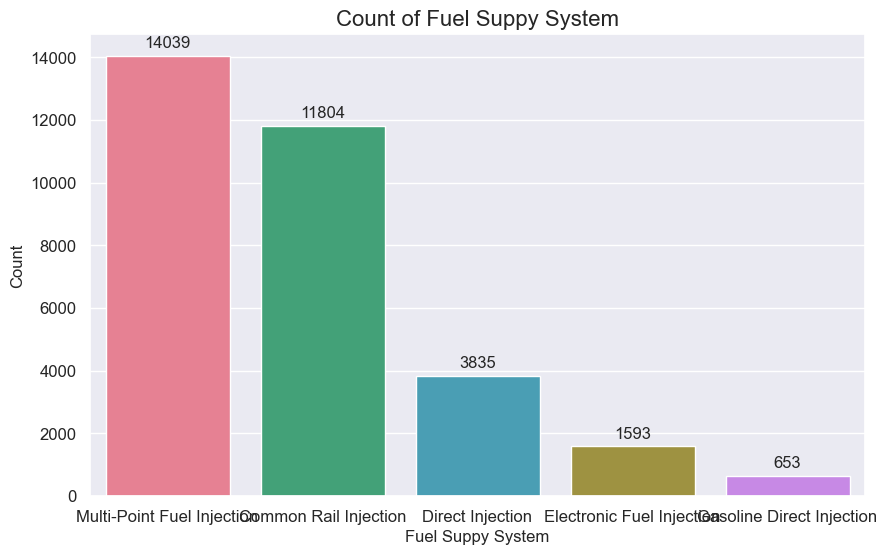

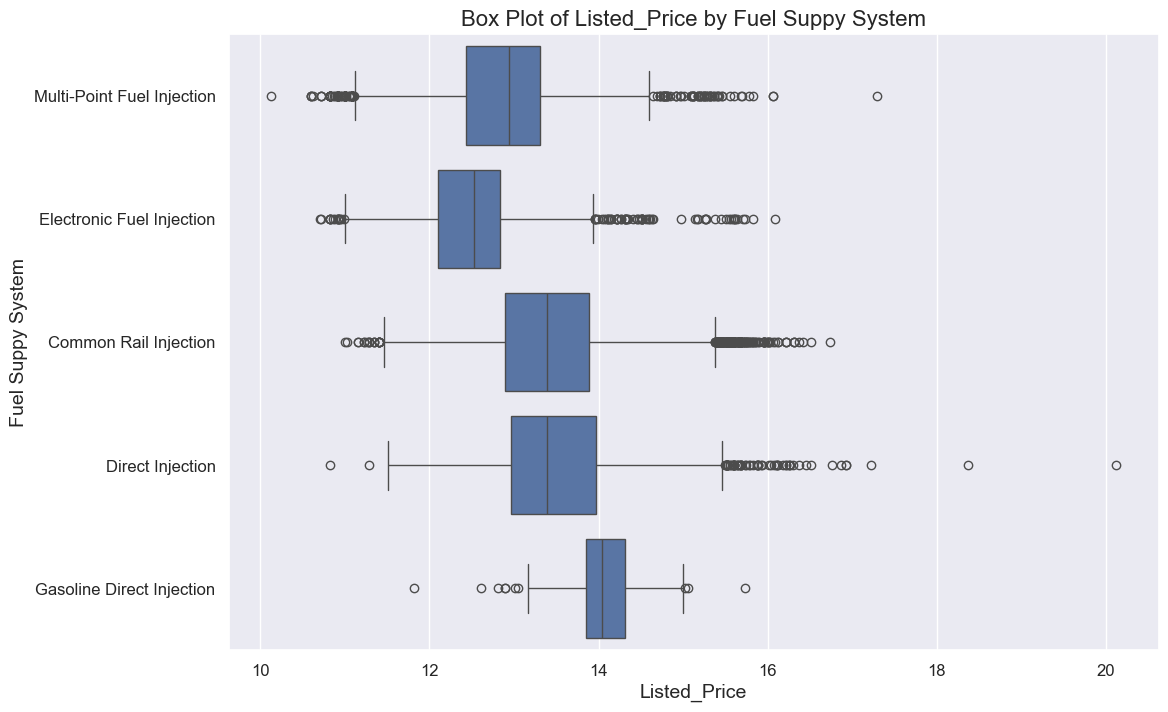

In [41]:
#Fuel Suppy System
category_column_analysis(cars_data_clean,'Fuel Suppy System',target=target)

In [45]:
annova_test(cars_data_clean,'Fuel Suppy System')

Null Hypothesis: There is no difference between groups of Fuel Suppy System
+--------------------+-------------------+--------+------+-----+-------+
|        F(c)        |    F statistic    | pvalue |  q   | dfd |  dfn  |
+--------------------+-------------------+--------+------+-----+-------+
| 0.4692970826780274 | 149.8756182090445 |  0.0   | 0.05 |  14 | 37767 |
+--------------------+-------------------+--------+------+-----+-------+


F_onewayResult(statistic=np.float64(149.8756182090445), pvalue=np.float64(0.0))

Drop the column fuel supply system

Value Counts of Top 4 Frequent elements of Column: Tyre Type


+-----------------+-------+----------------+
|    Tyre Type    | Count | Mean of Target |
+-----------------+-------+----------------+
| tubeless radial | 29070 |   829953.23    |
|     tubeless    |  8176 |   578971.17    |
|     runflat     |  260  |   4258658.92   |
|       tube      |   4   |    787500.0    |
+-----------------+-------+----------------+


Basic Info of Column Tyre Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         4          |
| Missing Count  |        257         |
|   Missing %    | 0.6804882569438928 |
+----------------+--------------------+




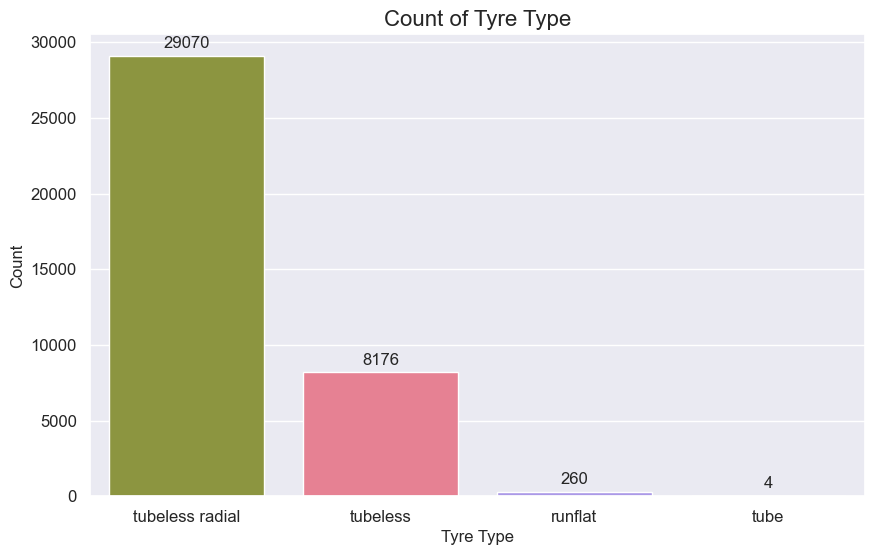

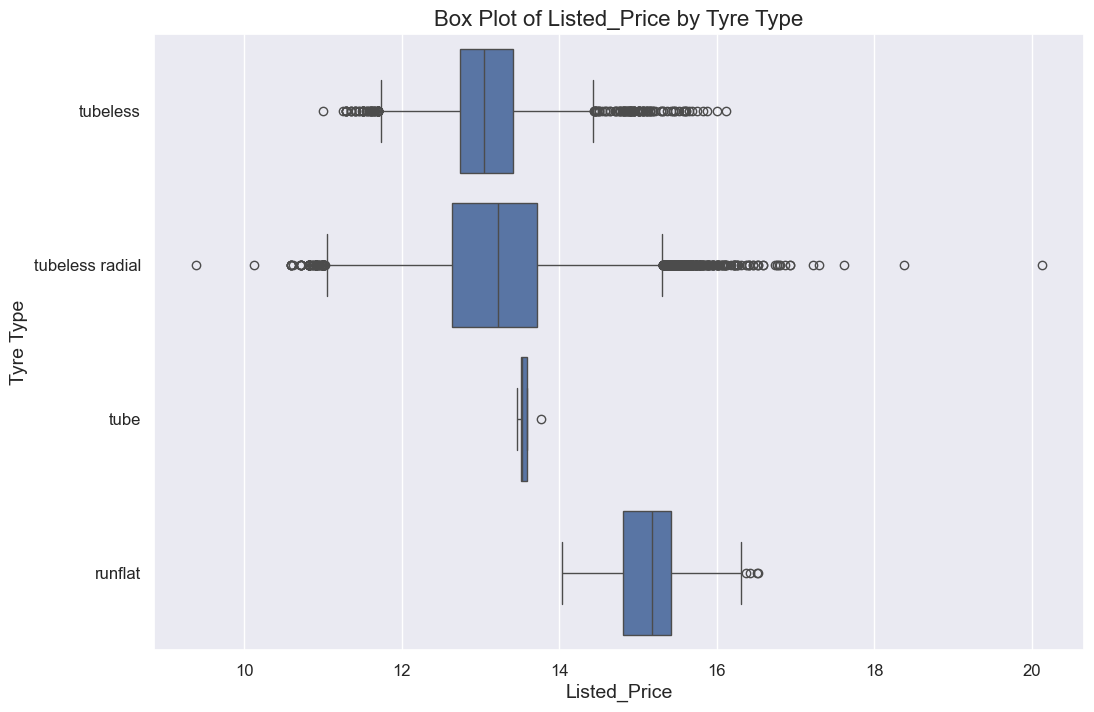

In [49]:
#Tyre Type
category_column_analysis(cars_data_clean,'Tyre Type',target=target,n_rows=4)

In [50]:
annova_test(cars_data_clean,'Tyre Type')

Null Hypothesis: There is no difference between groups of Tyre Type
+---------------------+-------------------+------------------------+------+-----+-------+
|         F(c)        |    F statistic    |         pvalue         |  q   | dfd |  dfn  |
+---------------------+-------------------+------------------------+------+-----+-------+
| 0.17767772266265144 | 264.8209743571754 | 4.308089535922917e-170 | 0.05 |  4  | 37767 |
+---------------------+-------------------+------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(264.8209743571754), pvalue=np.float64(4.308089535922917e-170))

Drop Null values of tyre type and encode them

Value Counts of Top 2 Frequent elements of Column: Transmission_Type


+-------------------+-------+----------------+
| Transmission_Type | Count | Mean of Target |
+-------------------+-------+----------------+
|       manual      | 28658 |   544867.82    |
|     automatic     |  8852 |   1621779.03   |
+-------------------+-------+----------------+


Basic Info of Column Transmission_Type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   2   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




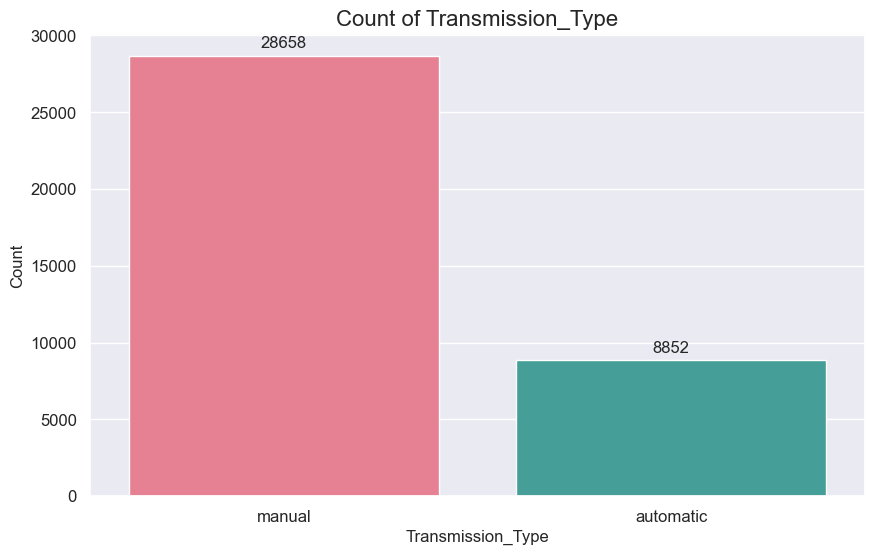

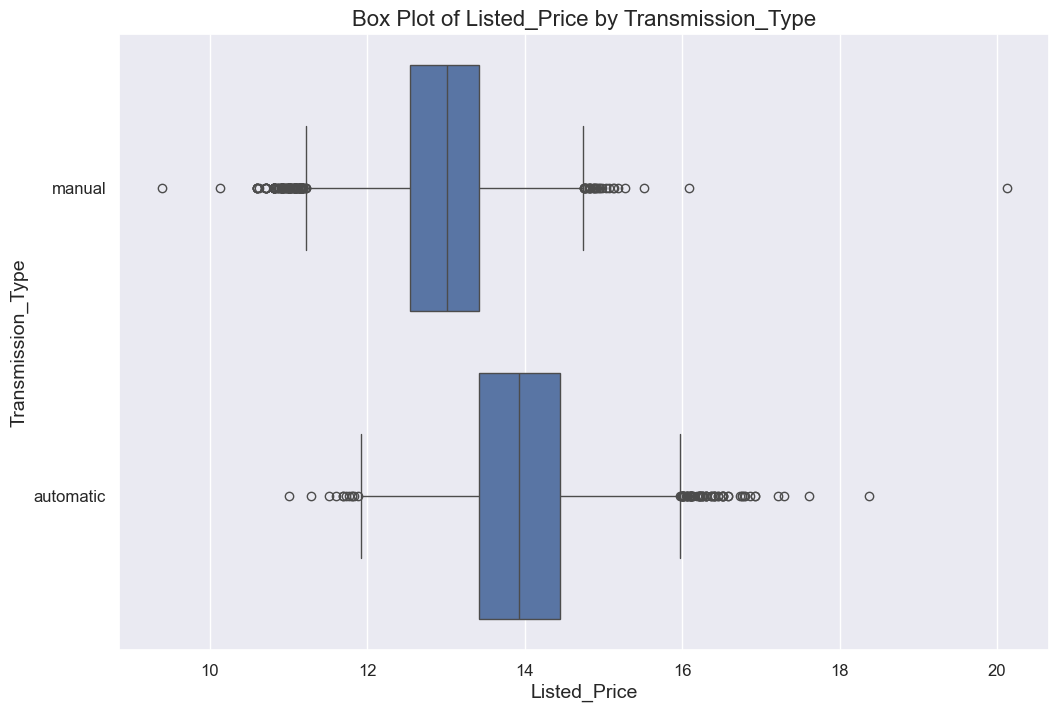

In [58]:
#Transmission Type
category_column_analysis(cars_data_clean,'Transmission_Type',n_rows=2,target=target)

In [56]:
annova_test(cars_data_clean,'Transmission_Type')

Null Hypothesis: There is no difference between groups of Transmission_Type
+---------------------+-------------------+-------------------------+------+-----+-------+
|         F(c)        |    F statistic    |          pvalue         |  q   | dfd |  dfn  |
+---------------------+-------------------+-------------------------+------+-----+-------+
| 0.05129336452954251 | 903.3860173506989 | 3.8549078948705503e-196 | 0.05 |  2  | 37510 |
+---------------------+-------------------+-------------------------+------+-----+-------+


F_onewayResult(statistic=np.float64(903.3860173506989), pvalue=np.float64(3.8549078948705503e-196))

Encode Transmission Type

Value Counts of Top 5 Frequent elements of Column: Fuel_Type


+-----------+-------+----------------+
| Fuel_Type | Count | Mean of Target |
+-----------+-------+----------------+
|   petrol  | 21519 |   634378.52    |
|   diesel  | 14592 |   1069773.39   |
|    cng    |  1070 |   457296.14    |
|    lpg    |  203  |   177267.72    |
|  electric |  126  |   1461850.79   |
+-----------+-------+----------------+


Basic Info of Column Fuel_Type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   5   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




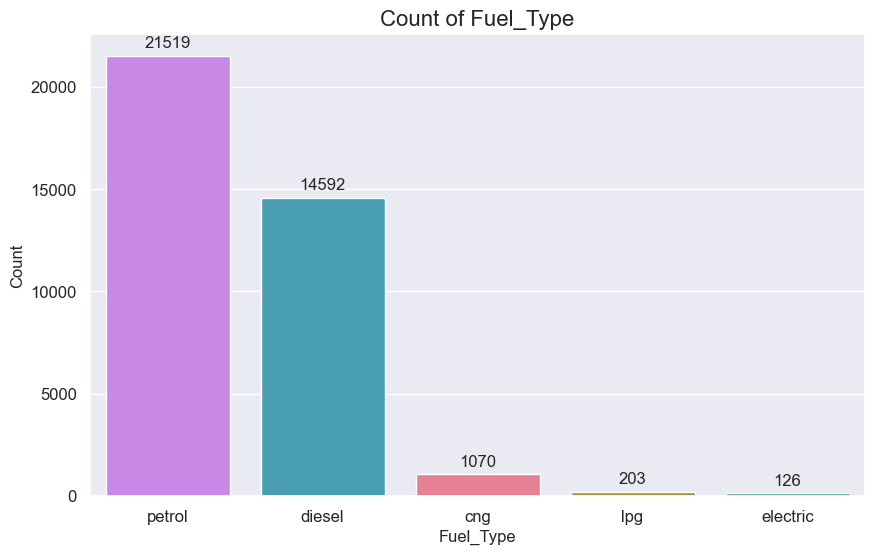

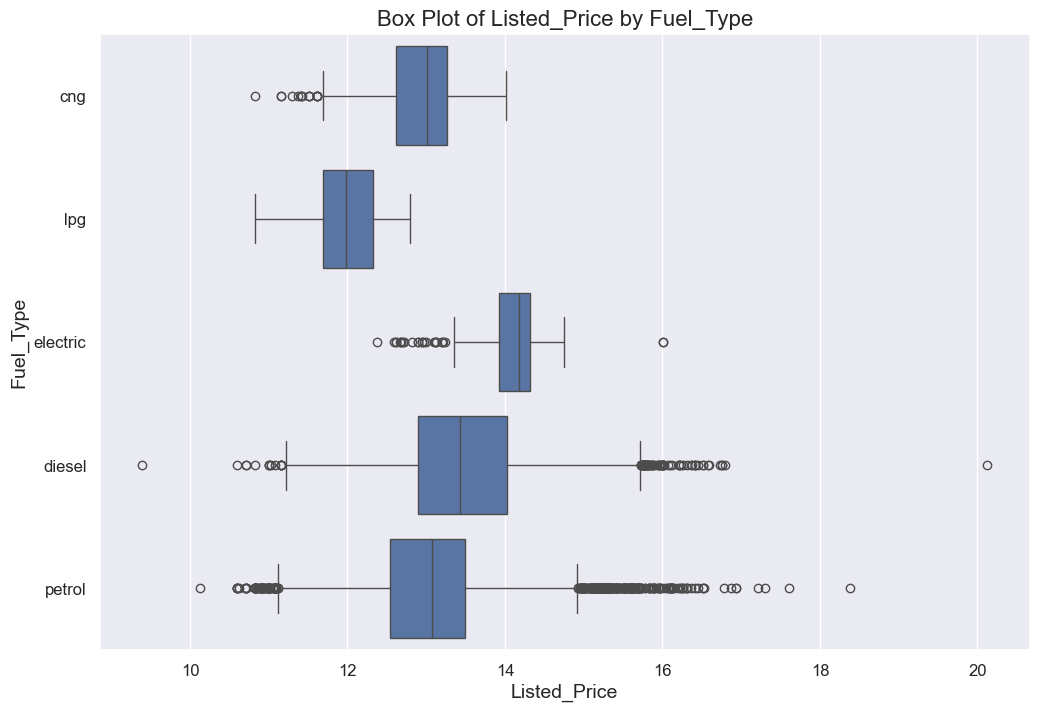

In [61]:
category_column_analysis(cars_data_clean,'Fuel_Type',target=target)

In [60]:
annova_test(cars_data_clean,'Fuel_Type')

Null Hypothesis: There is no difference between groups of Fuel_Type
+---------------------+-------------------+--------+------+-----+-------+
|         F(c)        |    F statistic    | pvalue |  q   | dfd |  dfn  |
+---------------------+-------------------+--------+------+-----+-------+
| 0.22908958217415126 | 1258.915158036427 |  0.0   | 0.05 |  5  | 37510 |
+---------------------+-------------------+--------+------+-----+-------+


F_onewayResult(statistic=np.float64(1258.915158036427), pvalue=np.float64(0.0))

Encode Fuel Type

Value Counts of Top 5 Frequent elements of Column: Body_Type


+-----------+-------+----------------+
| Body_Type | Count | Mean of Target |
+-----------+-------+----------------+
| hatchback | 14838 |   388396.92    |
|   sedan   | 10511 |   828650.11    |
|    suv    |  9784 |   1341671.44   |
|    muv    |  1811 |   906014.77    |
|  minivans |  389  |   330966.57    |
+-----------+-------+----------------+


Basic Info of Column Body_Type


+----------------+---------------------+
|    Measure     |        Value        |
+----------------+---------------------+
| Distinct Count |          11         |
| Missing Count  |          18         |
|   Missing %    | 0.04798720341242336 |
+----------------+---------------------+




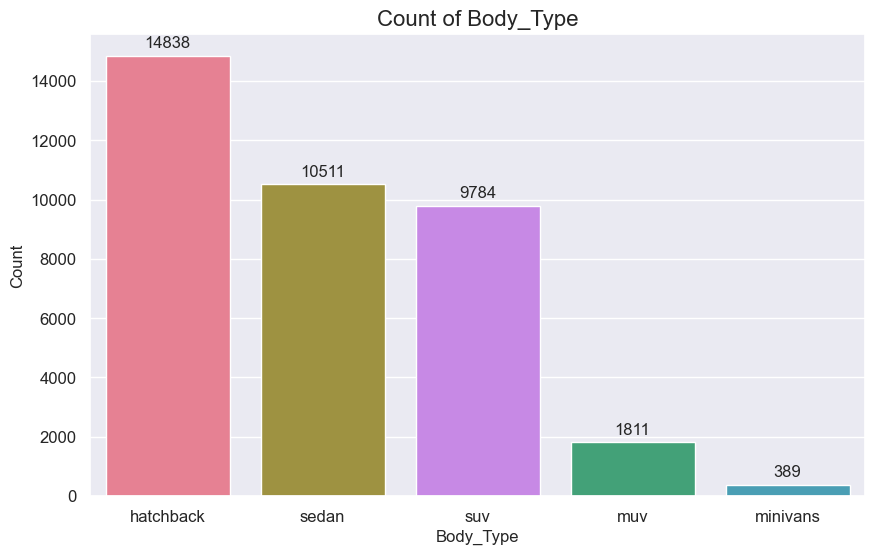

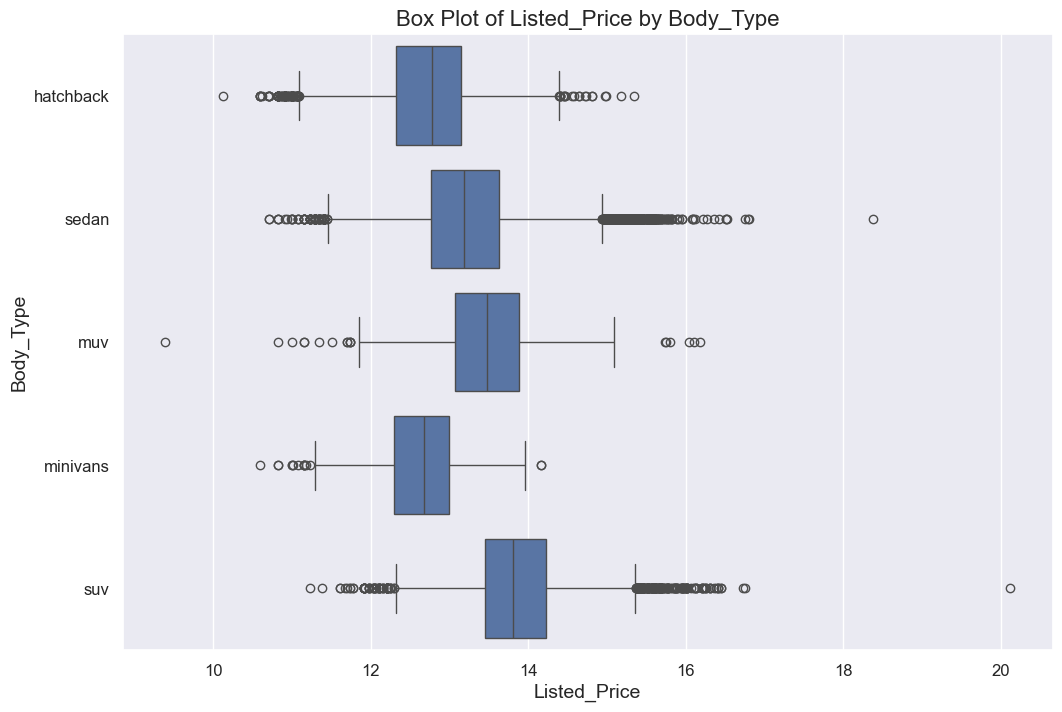

In [63]:
#Body_Type

category_column_analysis(cars_data_clean,'Body_Type',target=target)

In [64]:
annova_test(cars_data_clean,'Body_Type')

Null Hypothesis: There is no difference between groups of Body_Type
+--------------------+--------------------+--------+------+-----+-------+
|        F(c)        |    F statistic     | pvalue |  q   | dfd |  dfn  |
+--------------------+--------------------+--------+------+-----+-------+
| 0.4158675688731226 | 324.94476726438813 |  0.0   | 0.05 |  11 | 37510 |
+--------------------+--------------------+--------+------+-----+-------+


F_onewayResult(statistic=np.float64(324.94476726438813), pvalue=np.float64(0.0))

Drop null body types and encode them

Value Counts of Top 5 Frequent elements of Column: Rear Brake Type


+-----------------+-------+----------------+
| Rear Brake Type | Count | Mean of Target |
+-----------------+-------+----------------+
|       drum      | 29937 |   558593.37    |
|       disc      |  6187 |   1646476.24   |
| ventilated disc |  943  |   2826895.2    |
|     caliper     |  310  |   733469.54    |
|   disc & drum   |   64  |   331707.14    |
+-----------------+-------+----------------+


Basic Info of Column Rear Brake Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         6          |
| Missing Count  |        325         |
|   Missing %    | 0.8605396245399423 |
+----------------+--------------------+




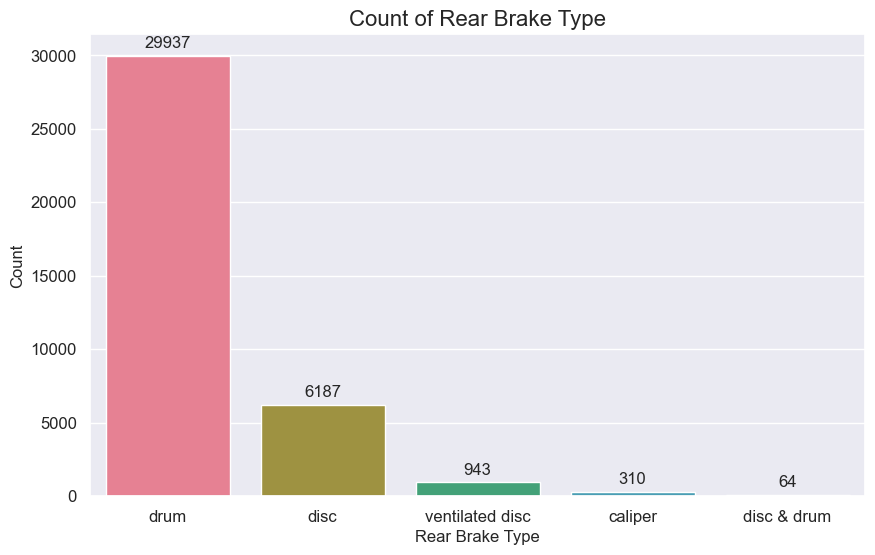

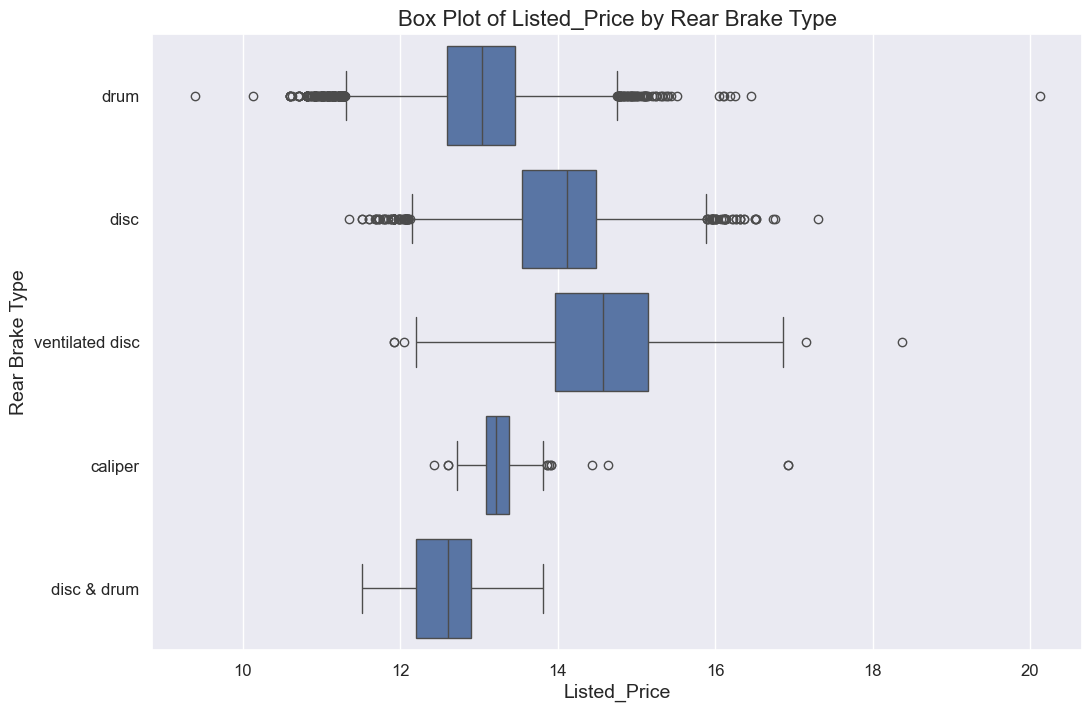

In [3]:
#Rear Brake Type
category_column_analysis(cars_data_clean,'Rear Brake Type',target=target)

Value Counts of Top 5 Frequent elements of Column: Front Brake Type


+------------------+-------+----------------+
| Front Brake Type | Count | Mean of Target |
+------------------+-------+----------------+
|       disc       | 23310 |   824859.57    |
| ventilated disc  | 13738 |   751502.49    |
|     caliper      |  312  |   810178.07    |
|       drum       |   70  |   145797.67    |
|   disc & drum    |   10  |    827596.3    |
+------------------+-------+----------------+


Basic Info of Column Front Brake Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         6          |
| Missing Count  |        326         |
|   Missing %    | 0.8631874387692959 |
+----------------+--------------------+




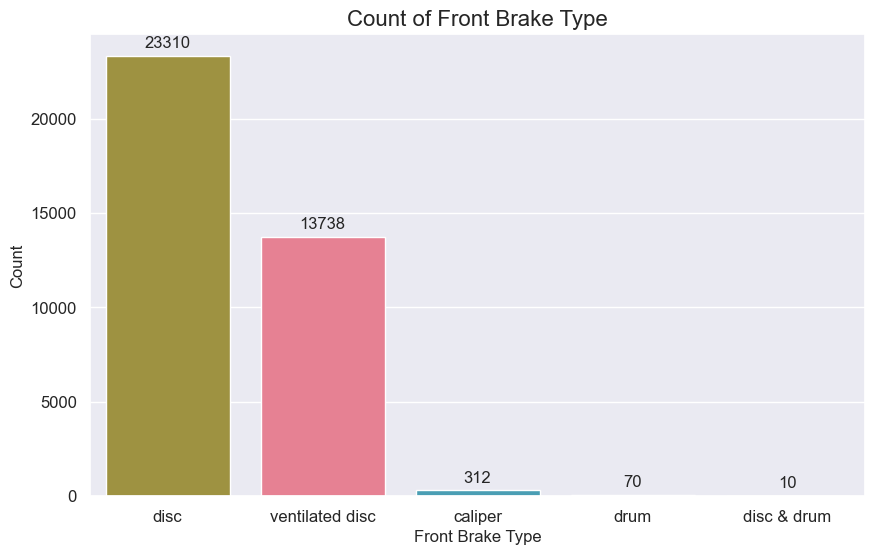

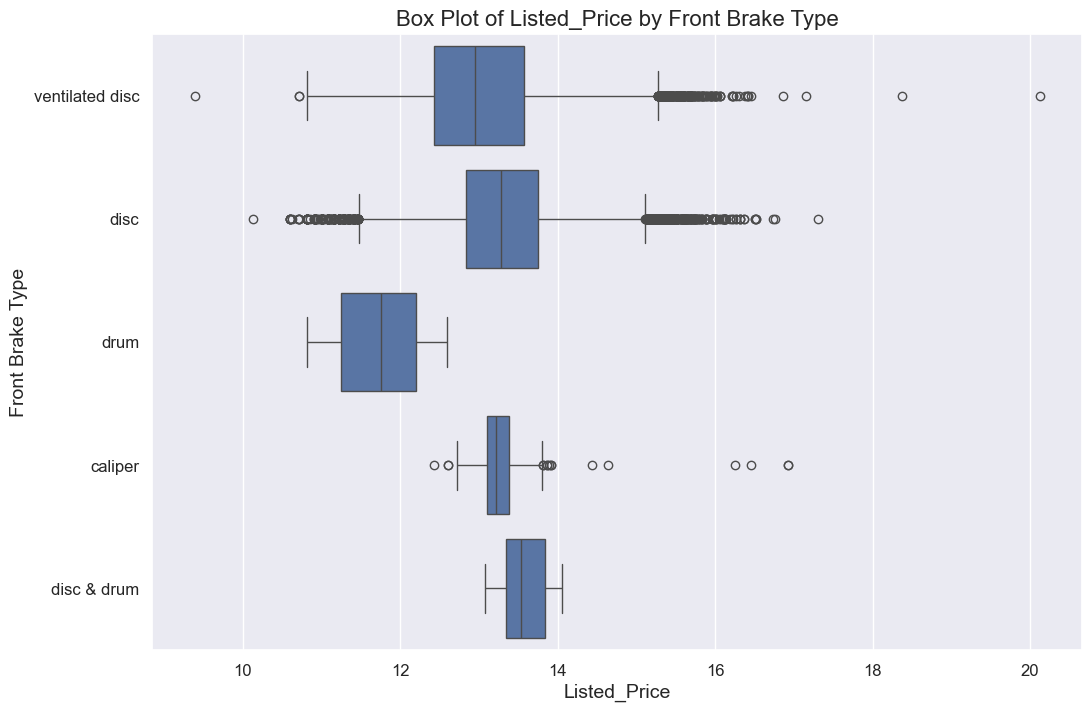

In [4]:
category_column_analysis(cars_data_clean,target=target,col='Front Brake Type')

Value Counts of Top 2 Frequent elements of Column: Steering Type


+---------------+-------+----------------+
| Steering Type | Count | Mean of Target |
+---------------+-------+----------------+
|     power     | 36305 |   793086.55    |
|     manual    |  655  |    283202.9    |
+---------------+-------+----------------+


Basic Info of Column Steering Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         2          |
| Missing Count  |        807         |
|   Missing %    | 2.1367860830884102 |
+----------------+--------------------+




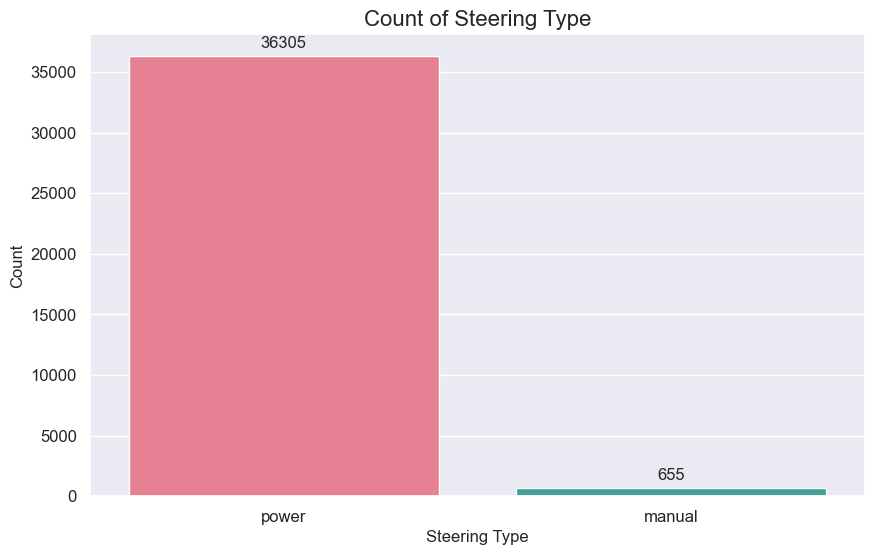

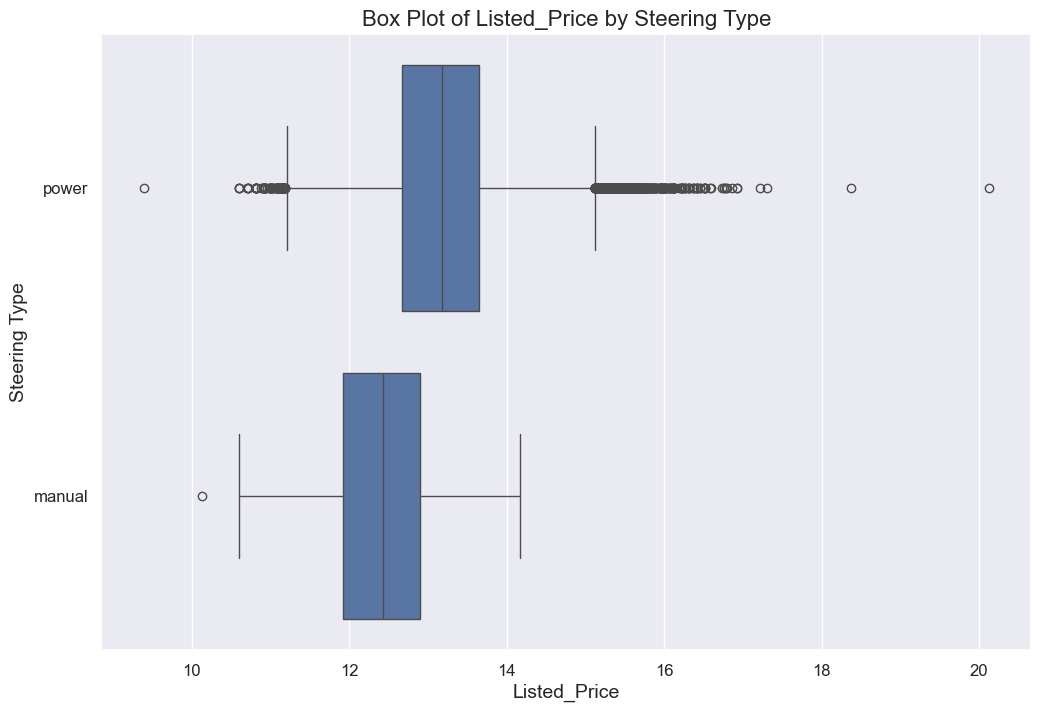

In [9]:
#Steering Type
category_column_analysis(cars_data_clean,'Steering Type',target,n_rows=2)

Value Counts of Top 5 Frequent elements of Column: Drive Type


+------------+-------+----------------+
| Drive Type | Count | Mean of Target |
+------------+-------+----------------+
|    fwd     | 27602 |   607253.11    |
|    rwd     |  2296 |   1673467.89   |
|    2wd     |  1141 |   640130.29    |
|    awd     |  1138 |   2788370.46   |
|    4wd     |  806  |   2107900.86   |
+------------+-------+----------------+


Basic Info of Column Drive Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         6          |
| Missing Count  |        4488        |
|   Missing %    | 11.883390261339265 |
+----------------+--------------------+




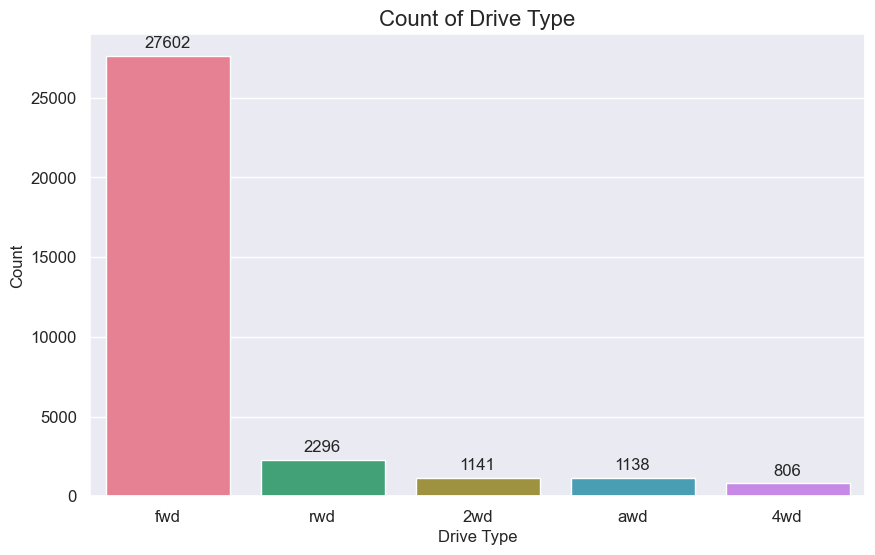

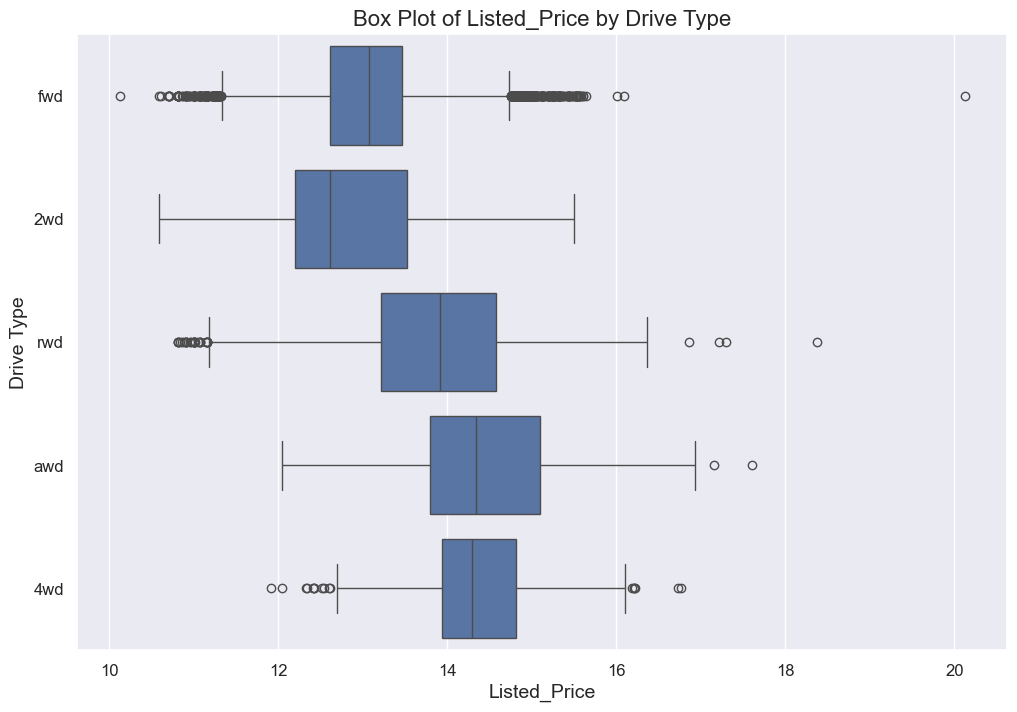

In [13]:
#Drive Type
category_column_analysis(cars_data_clean,'Drive Type',target=target)

Value Counts of Top 5 Frequent elements of Column: Gear Box


+----------+-------+----------------+
| Gear Box | Count | Mean of Target |
+----------+-------+----------------+
| 5 speed  | 25169 |   476791.51    |
| 6 speed  |  7459 |   1102804.63   |
| 7 speed  |  1836 |   1745705.91   |
| 8 speed  |  1150 |   3137452.44   |
| 4 speed  |  758  |   497350.67    |
+----------+-------+----------------+


Basic Info of Column Gear Box


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |         11         |
| Missing Count  |        471         |
|   Missing %    | 1.2471205020255778 |
+----------------+--------------------+




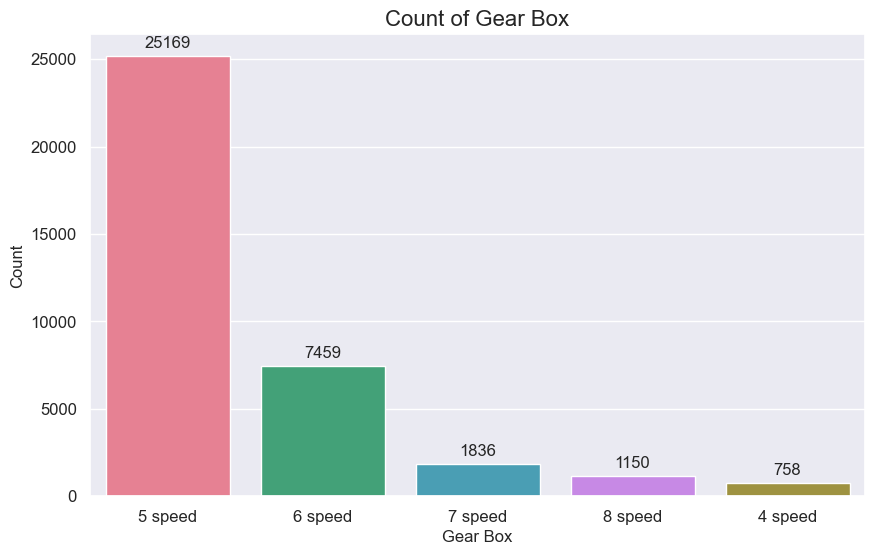

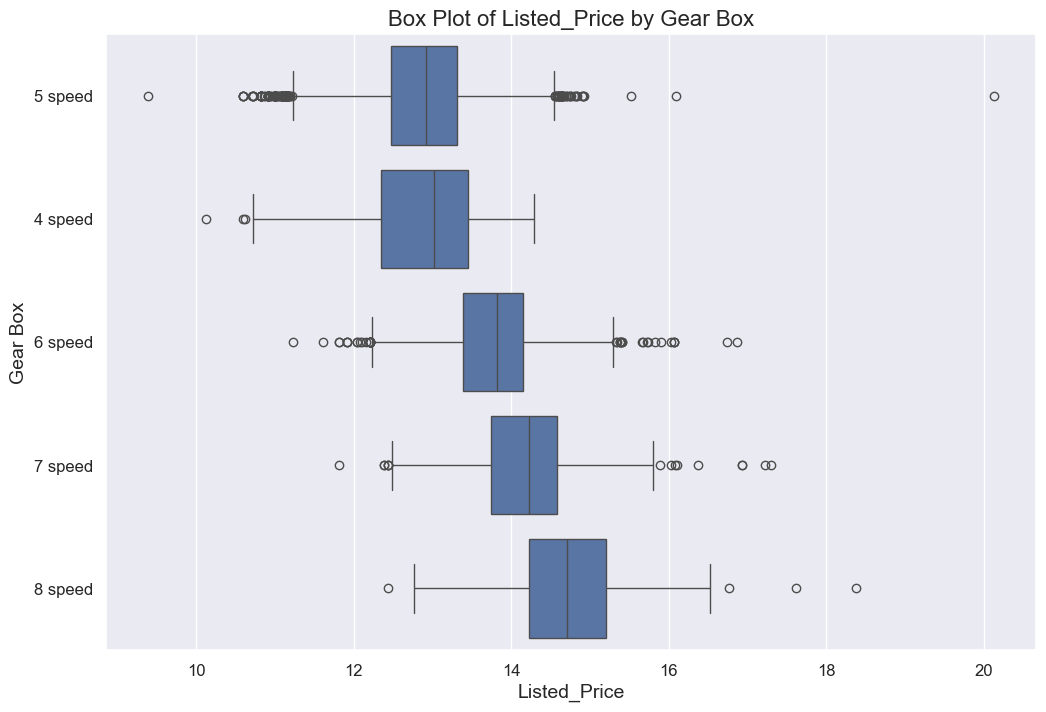

In [18]:
#Gear Box
category_column_analysis(cars_data_clean,'Gear Box',target)

Value Counts of Top 5 Frequent elements of Column: Valve_Config


+---------------+-------+----------------+
|  Valve_Config | Count | Mean of Target |
+---------------+-------+----------------+
|      dohc     | 23478 |   802095.92    |
|      sohc     |  6191 |   508485.78    |
|      idsi     |   66  |   211488.94    |
| dohc with vis |   31  |   1136118.45   |
| dohc with vgt |   20  |   1248756.3    |
+---------------+-------+----------------+


Basic Info of Column Valve_Config


+----------------+-------------------+
|    Measure     |       Value       |
+----------------+-------------------+
| Distinct Count |         11        |
| Missing Count  |        7940       |
|   Missing %    | 21.02364498106813 |
+----------------+-------------------+




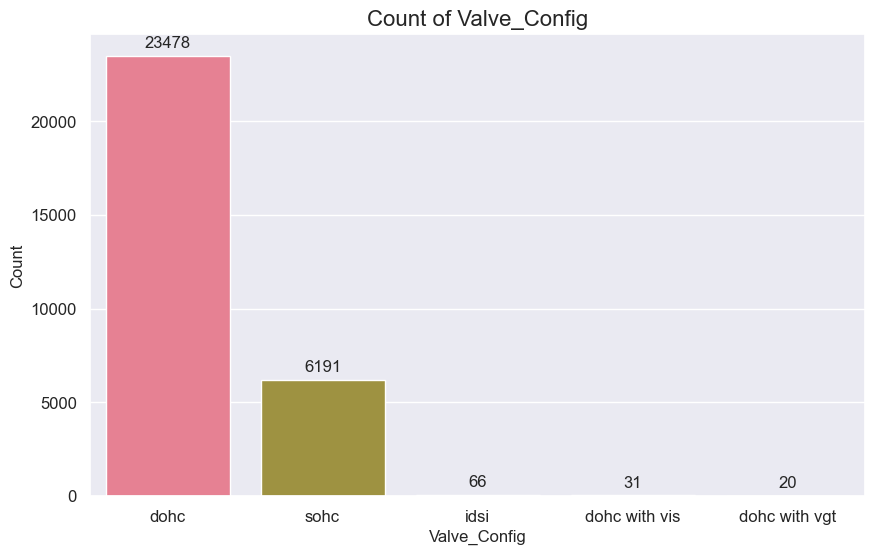

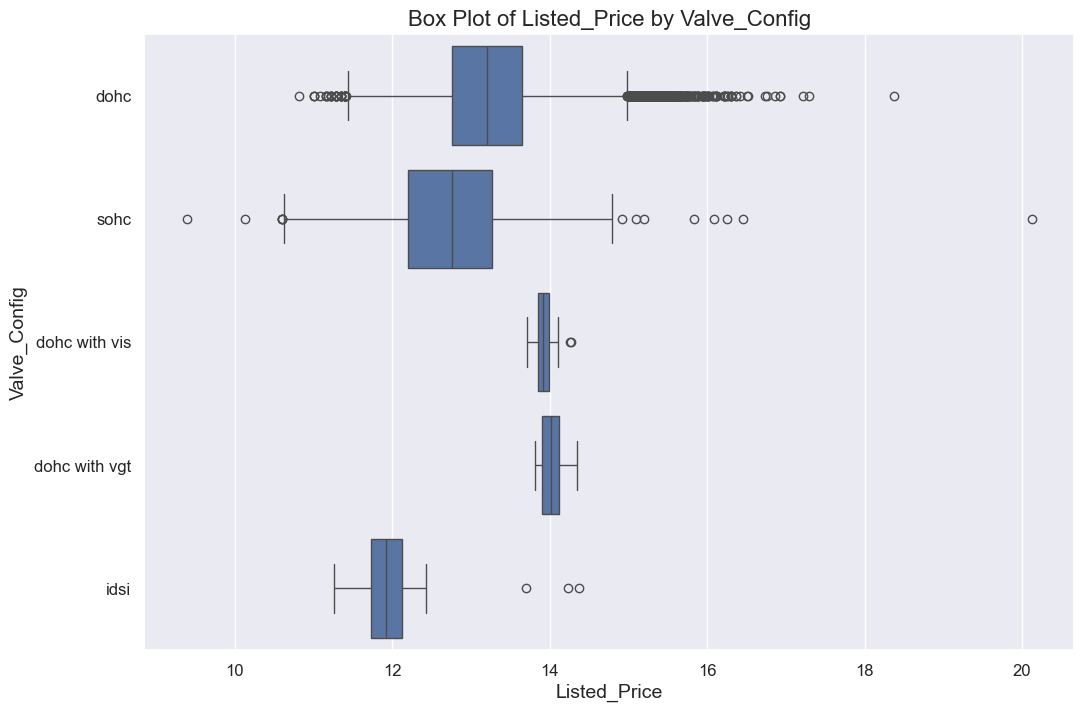

In [21]:
#Valve_Config
category_column_analysis(cars_data_clean,'Valve_Config',target)

Value Counts of Top 5 Frequent elements of Column: Engine Type


+--------------------------+-------+----------------+
|       Engine Type        | Count | Mean of Target |
+--------------------------+-------+----------------+
|      in-line engine      |  3367 |   366401.97    |
| kappa vtvt petrol engine |  1657 |   504452.49    |
|      petrol engine       |  1619 |   434504.54    |
|    ddis diesel engine    |  1212 |   444795.63    |
|  k series petrol engine  |  1138 |    271060.6    |
+--------------------------+-------+----------------+


Basic Info of Column Engine Type


+----------------+--------------------+
|    Measure     |       Value        |
+----------------+--------------------+
| Distinct Count |        566         |
| Missing Count  |        867         |
|   Missing %    | 2.2956549368496306 |
+----------------+--------------------+




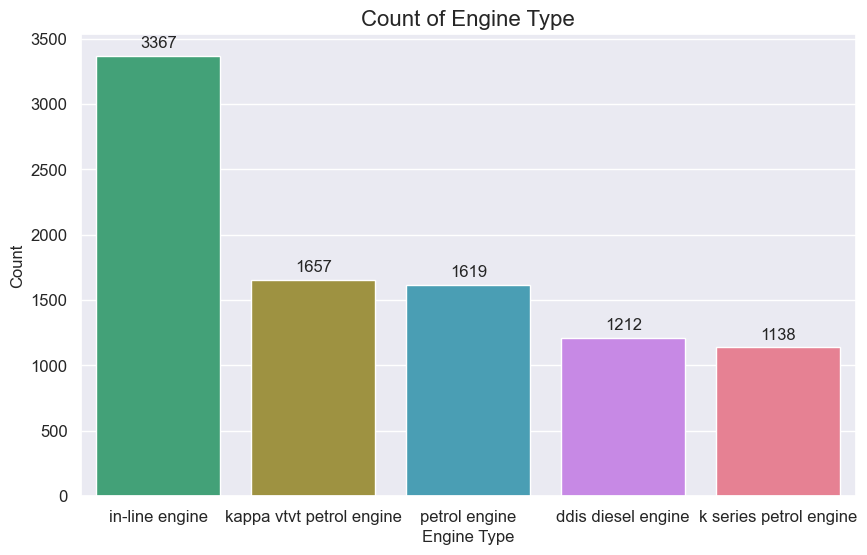

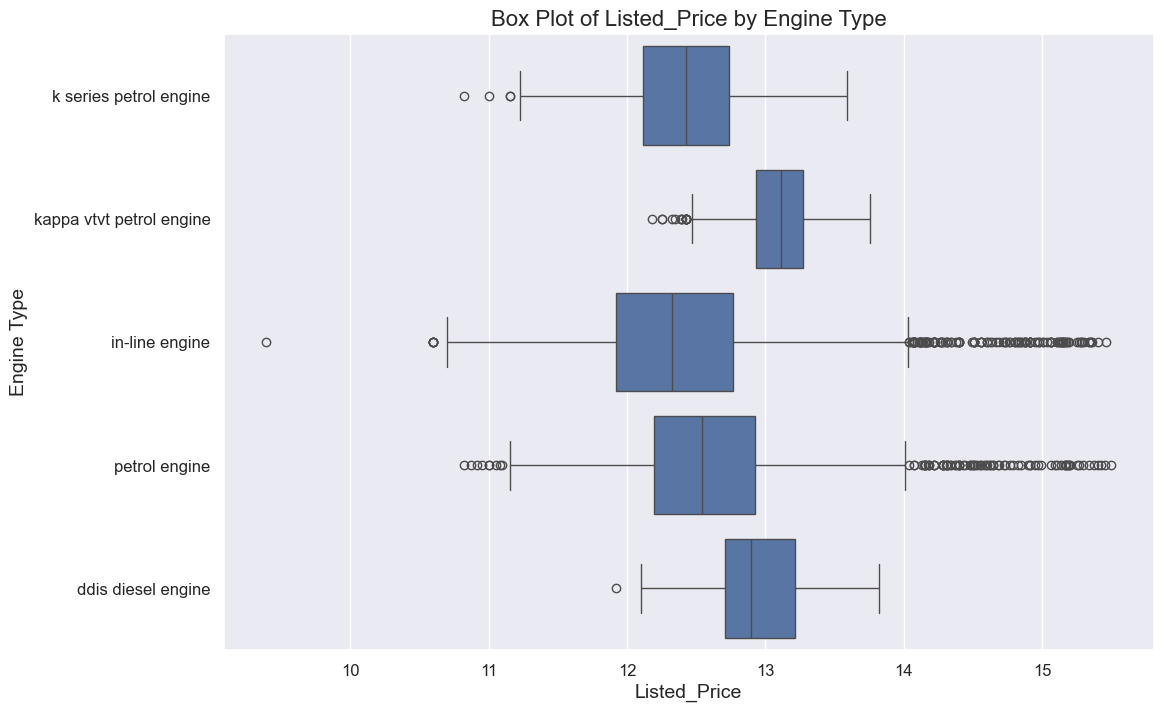

In [22]:
#Engine Type
category_column_analysis(cars_data_clean,'Engine Type',target)

Value Counts of Top 5 Frequent elements of Column: Color


+--------+-------+----------------+
| Color  | Count | Mean of Target |
+--------+-------+----------------+
| white  | 10038 |   930983.08    |
| silver |  4426 |   614715.68    |
|  grey  |  3283 |    731679.7    |
|  red   |  2809 |   734145.05    |
|  blue  |  2007 |   1130645.7    |
+--------+-------+----------------+


Basic Info of Column Color


+----------------+-------------------+
|    Measure     |       Value       |
+----------------+-------------------+
| Distinct Count |        747        |
| Missing Count  |        160        |
|   Missing %    | 0.423650276696587 |
+----------------+-------------------+




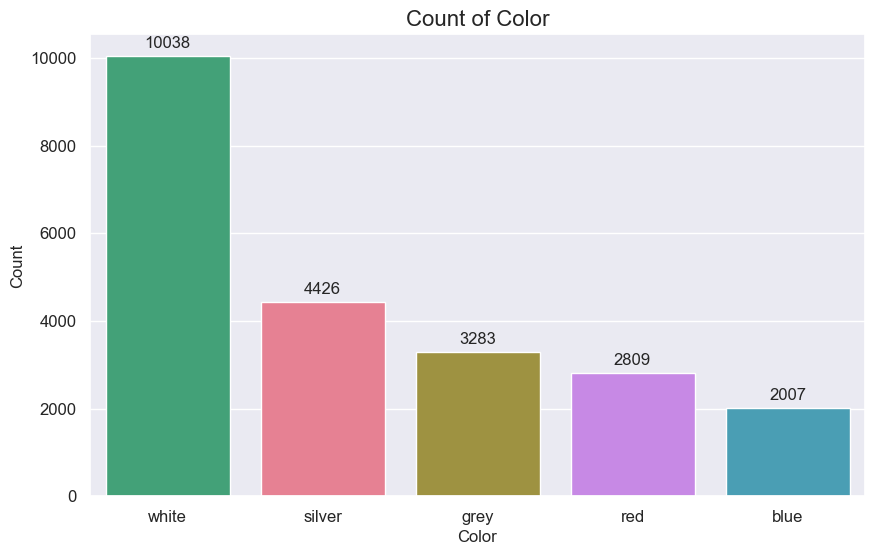

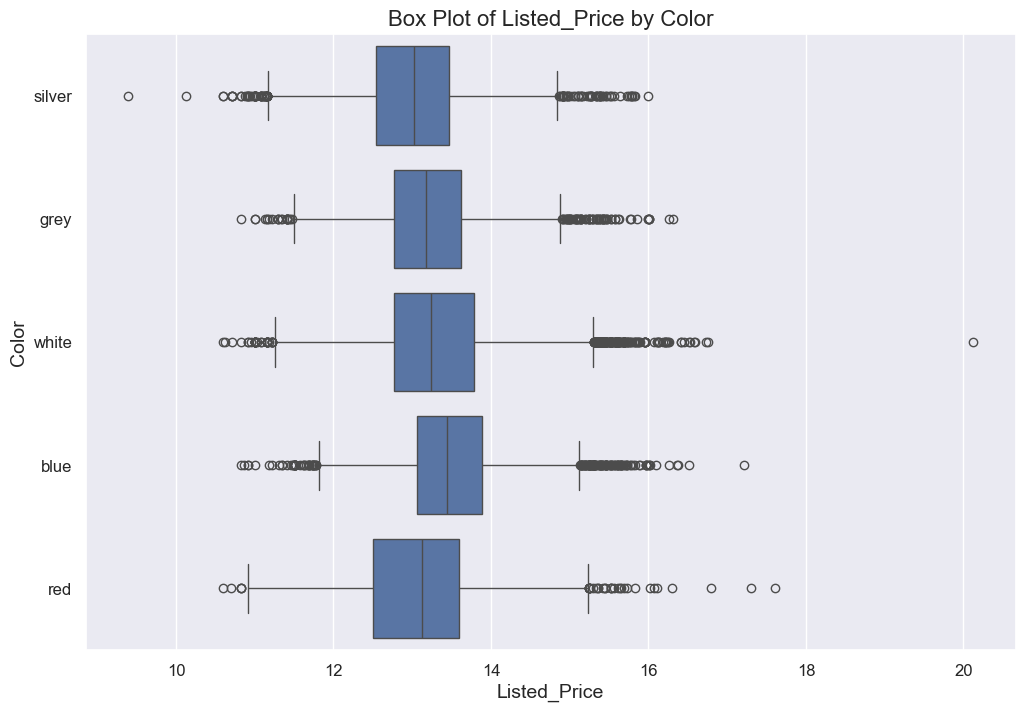

In [24]:
#Color
category_column_analysis(cars_data_clean,'Color',target)

Value Counts of Top 3 Frequent elements of Column: carType


+-----------+-------+----------------+
|  carType  | Count | Mean of Target |
+-----------+-------+----------------+
|  partner  | 32477 |   814762.06    |
| corporate |  5267 |   708771.83    |
|  assured  |   23  |   629347.83    |
+-----------+-------+----------------+


Basic Info of Column carType


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   3   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




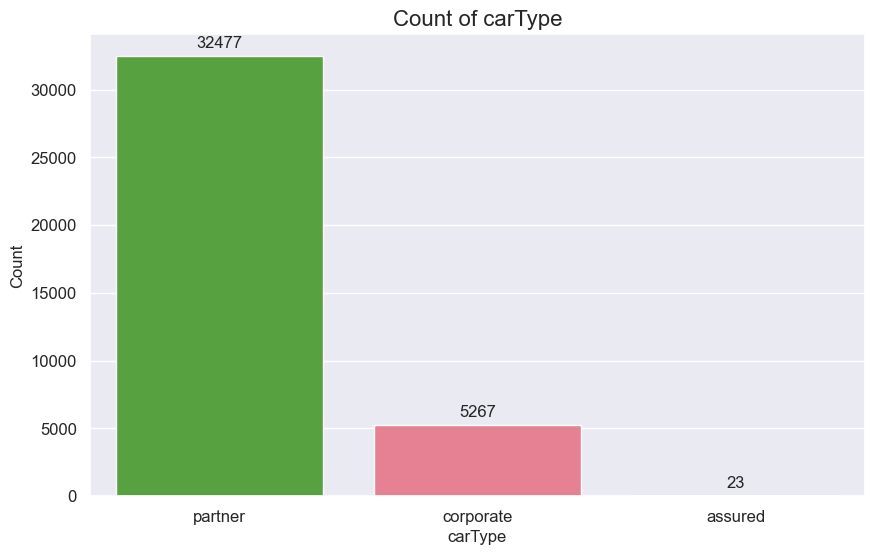

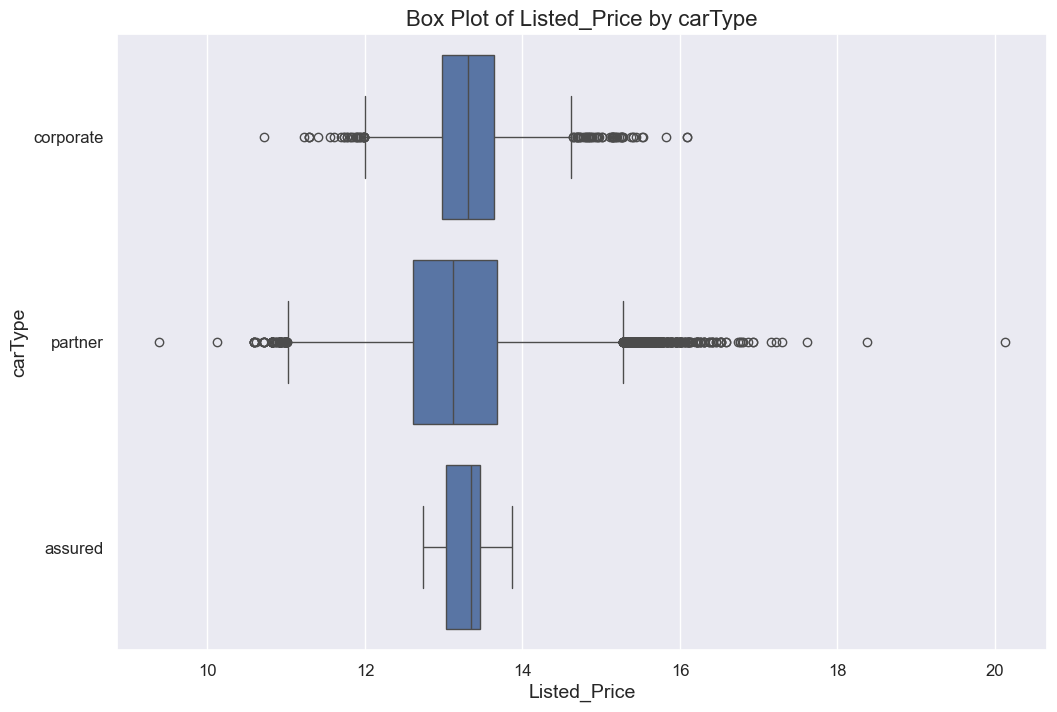

In [27]:
#carType
category_column_analysis(cars_data_clean,'carType',target,n_rows=3)

Value Counts of Top 2 Frequent elements of Column: Car_Seller_Type


+-----------------+-------+----------------+
| Car_Seller_Type | Count | Mean of Target |
+-----------------+-------+----------------+
|      dealer     | 31945 |    818567.9    |
|    individual   |  5822 |   697260.76    |
+-----------------+-------+----------------+


Basic Info of Column Car_Seller_Type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   2   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




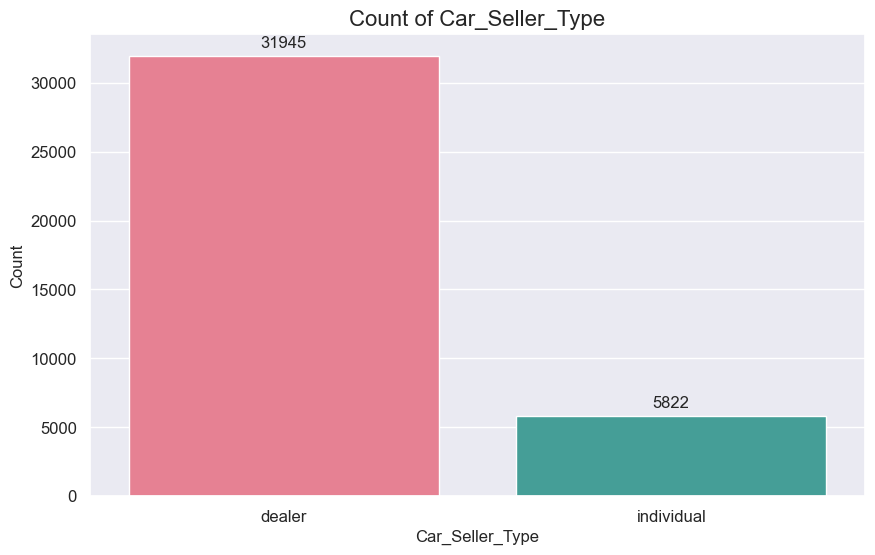

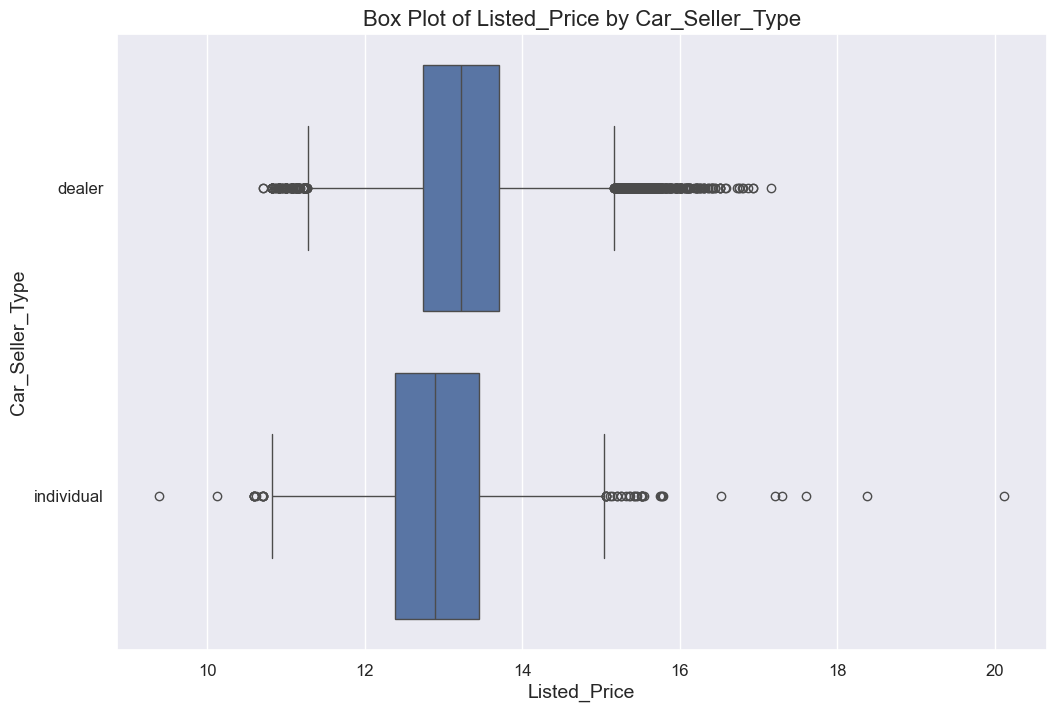

In [30]:
#Car_Seller_Type

category_column_analysis(cars_data_clean,'Car_Seller_Type',target=target,n_rows=2)

Value Counts of Top 5 Frequent elements of Column: owner_type


+------------+-------+----------------+
| owner_type | Count | Mean of Target |
+------------+-------+----------------+
|   first    | 26545 |   890618.98    |
|   second   |  8754 |   633480.62    |
|   third    |  1959 |   433717.97    |
|   fourth   |  442  |   312295.95    |
|   fifth    |   58  |   417331.07    |
+------------+-------+----------------+


Basic Info of Column owner_type


+----------------+-------+
|    Measure     | Value |
+----------------+-------+
| Distinct Count |   6   |
| Missing Count  |   0   |
|   Missing %    |  0.0  |
+----------------+-------+




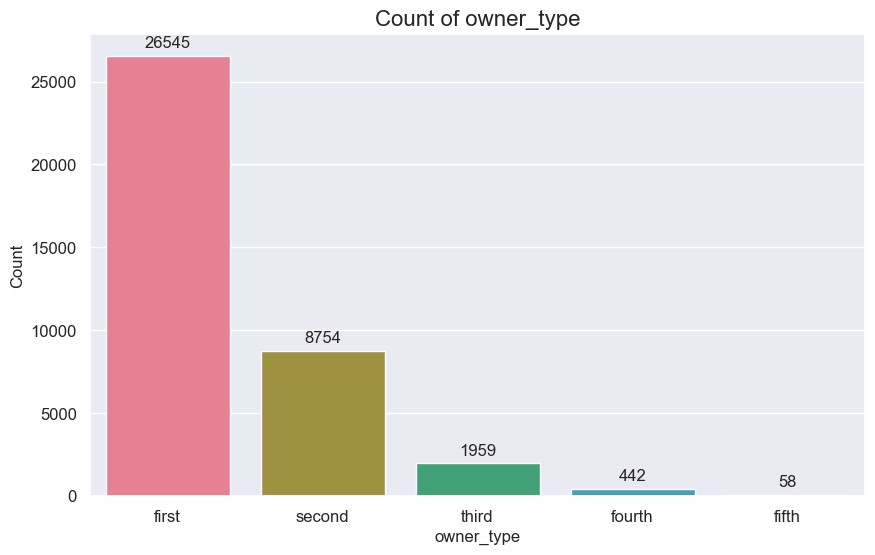

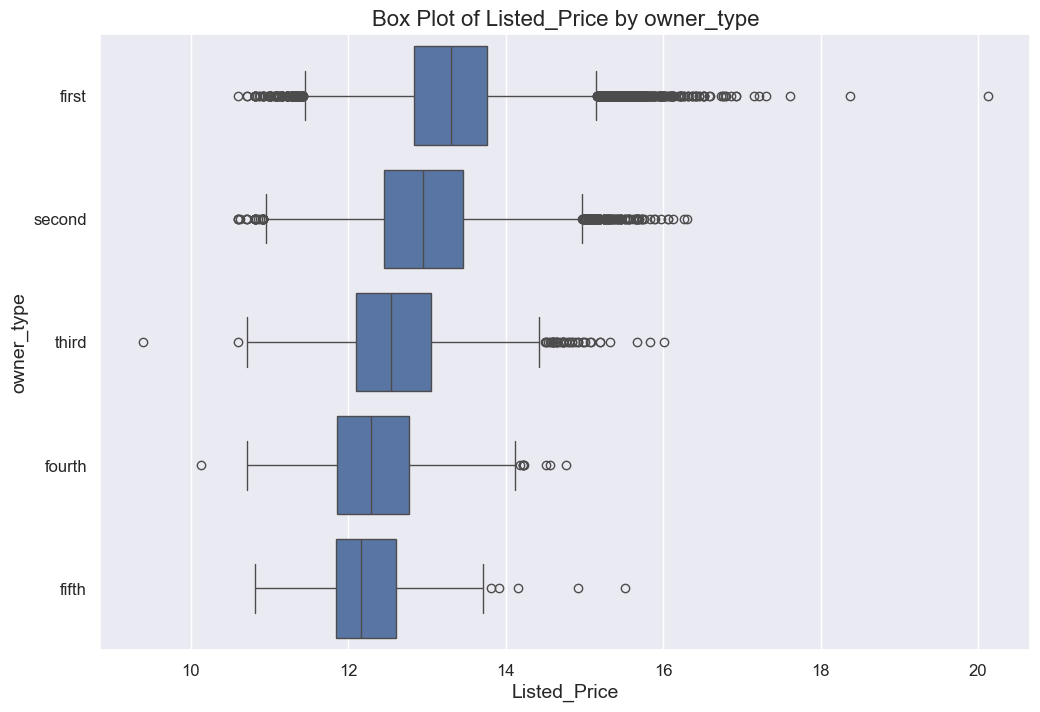

In [31]:
# 'owner_type'
category_column_analysis(cars_data_clean,'owner_type',target=target)

In [ ]:
#Wheel Base

In [3]:
mean_wheel_base={}
b_types=list(cars_data_clean['Body_Type'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for b_type in b_types:
    b_type_mean=cars_data_clean[cars_data_clean['Body_Type']==b_type]['Wheel Base'].mean()
    mean_wheel_base[b_type]=b_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Wheel Base'])=='nan':

        cars_data_clean.loc[row,'Wheel Base']=mean_wheel_base[cars_data_clean.loc[row,'Body_Type']]

cars_data_clean.dropna(subset=['Wheel Base'],inplace=True)

In [5]:
cars_data_clean['Wheel Base'].shape

(37767,)

# Transformations

0        2400.0
1        2425.0
2        2405.0
3        2400.0
4        2740.0
          ...  
37762    2498.0
37763    2520.0
37764    2501.0
37765    2400.0
37766    2450.0
Name: Wheel Base, Length: 37767, dtype: float64

In [48]:
#Year
cars_data_clean = cars_data_clean[cars_data_clean['Manufactured_Year'] > 2004]

#Top Features


#comfort, exterior and interior features

cars_data_clean.drop(columns=['comfort_features','exterior_features','interior_features','safety_features'],axis=1,inplace=True)

#Turning Radius
cars_data_clean.drop(columns='Turning Radius',axis=1,inplace=True)

# Front Tread
mean_front_tread={}
b_types=list(cars_data_clean['Body_Type'].unique())
cars_data_clean=cars_data_clean.reset_index()
for b_type in b_types:
    b_type_mean=cars_data_clean[cars_data_clean['Body_Type']==b_type]['Front Tread'].mean()
    mean_front_tread[b_type]=b_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Front Tread'])=='nan':
        cars_data_clean.loc[row,'Front Tread']=mean_front_tread[cars_data_clean.loc[row,'Body_Type']]
cars_data_clean.dropna(subset=['Front Tread'],inplace=True)
cars_data_clean.drop(columns=['index'],axis=1,inplace=True)

#Rear Tread
cars_data_clean.drop(columns='Rear Tread',axis=1,inplace=True)

#Engine Type
cars_data_clean.drop(columns='Engine Type',axis=1,inplace=True)

#'Max Torque At'
cars_data_clean.drop(columns=['Max Torque At'],axis=1,inplace=True)

#Max Power At

mean_power_at={}
m_types=list(cars_data_clean['model'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for m_type in m_types:
    m_type_mean=cars_data_clean[cars_data_clean['model']==m_type]['Max Power At'].mean()
    mean_power_at[m_type]=m_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Max Power At'])=='nan':
        cars_data_clean.loc[row,'Max Power At']=mean_power_at[cars_data_clean.loc[row,'model']]

cars_data_clean.dropna(subset=['Max Power At'],inplace=True)


#Max Torque Delivered
cars_data_clean.drop(columns=['Max Torque Delivered'],axis=1,inplace=True)

#Max Power Delivered
mean_power_delivered={}
m_types=list(cars_data_clean['model'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for m_type in m_types:
    m_type_mean=cars_data_clean[cars_data_clean['model']==m_type]['Max Power Delivered'].mean()
    mean_power_delivered[m_type]=m_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Max Power Delivered'])=='nan':
        cars_data_clean.loc[row,'Max Power Delivered']=mean_power_delivered[cars_data_clean.loc[row,'model']]

cars_data_clean.dropna(subset=['Max Power Delivered'],inplace=True)

#Kerb Weight
cars_data_clean.drop(columns=['Kerb Weight'],axis=1,inplace=True)

#Top Speed
cars_data_clean.drop(columns=['Top Speed'],axis=1,inplace=True)


#Acceleration
mean_acc={}
b_types=list(cars_data_clean['Body_Type'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for b_type in b_types:
    b_type_mean=cars_data_clean[cars_data_clean['Body_Type']==b_type]['Acceleration'].mean()
    mean_acc[b_type]=b_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Acceleration'])=='nan':
        cars_data_clean.loc[row,'Acceleration']=mean_acc[cars_data_clean.loc[row,'Body_Type']]


cars_data_clean.dropna(subset=['Acceleration'],inplace=True)

#Height, Width
cars_data_clean.drop(columns=['Height','Width'],axis=1,inplace=True)

#Length
mean_length={}
b_types=list(cars_data_clean['Body_Type'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for b_type in b_types:
    b_type_mean=cars_data_clean[cars_data_clean['Body_Type']==b_type]['Length'].mean()
    mean_length[b_type]=b_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Length'])=='nan':
        cars_data_clean.loc[row,'Length']=mean_length[cars_data_clean.loc[row,'Body_Type']]
cars_data_clean.dropna(subset=['Length'],inplace=True)

#Displacement
cars_data_clean.dropna(subset=['Displacement'],inplace=True)

#Engine Capacity
cars_data_clean.drop(columns=['engine_capacity'],axis=1,inplace=True)

#KM_Driven
cars_data_clean['KM_Driven']=cars_data_clean['KM_Driven'].apply(np.log)

#discountvalue

cars_data_clean.drop(columns=['discountValue'],axis=1,inplace=True)

#Insurance_Premium-> can drop this based on model performance

#No of Cylinder

cars_data_clean=cars_data_clean.reset_index(drop=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'No of Cylinder'])=='nan':
        if cars_data_clean.loc[row,'Fuel_Type']=='electric':
            cars_data_clean.loc[row,'No of Cylinder']=0.0
        else:
            fuel_type=cars_data_clean.loc[row,'Fuel_Type']
            fuel_mode=cars_data_clean[cars_data_clean['Fuel_Type']==fuel_type]['No of Cylinder'].mode()
            cars_data_clean.loc[row,'No of Cylinder']=fuel_mode[0]

#Seating Capacity
cars_data_clean=cars_data_clean.reset_index(drop=True)
cars_data_clean=cars_data_clean[cars_data_clean['Seating Capacity']!=0]
cars_data_clean.dropna(subset='Seating Capacity',inplace=True)

#Num Doors
cars_data_clean=cars_data_clean.reset_index(drop=True)
cars_data_clean.dropna(subset='Num_Doors',inplace=True)

#Alloy Wheel Size
cars_data_clean=cars_data_clean[cars_data_clean['Alloy Wheel Size']!=7]
cars_data_clean=cars_data_clean.reset_index()
cars_data_clean.drop(columns=['index'],axis=1,inplace=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Alloy Wheel Size'])=='nan':
        tyre_type=cars_data_clean.loc[row,'Tyre Type']
        if str(tyre_type)=='nan':
            continue
        else:
            tyre_mode=cars_data_clean[cars_data_clean['Tyre Type']==tyre_type]['Alloy Wheel Size'].mode()
            try:
                cars_data_clean.loc[row,'Alloy Wheel Size']=tyre_mode[0]
            except:
                continue
cars_data_clean.dropna(subset=['Alloy Wheel Size'],inplace=True)

#Valves_Per_Cylinder
cars_data_clean.dropna(subset='Valves_Per_Cylinder',inplace=True)

#Mileage
mean_mileage={}
b_types=list(cars_data_clean['Body_Type'].unique())
cars_data_clean=cars_data_clean.reset_index(drop=True)
for b_type in b_types:
    b_type_mean=cars_data_clean[cars_data_clean['Body_Type']==b_type]['mileage'].mean()
    mean_mileage[b_type]=b_type_mean

for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'mileage'])=='nan':

        cars_data_clean.loc[row,'mileage']=mean_mileage[cars_data_clean.loc[row,'Body_Type']]

cars_data_clean.dropna(subset=['mileage'],inplace=True)

#Cargo_Volume
cars_data_clean.drop(columns=['Cargo_Volume'],axis=1,inplace=True)

#Fuel Suppy System
cars_data_clean.drop(columns=['Fuel Suppy System'],axis=1,inplace=True)

#Tyre Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
tyre_type={'tubeless radial':1,'tubeless':2,'runflat':3,'tube':4}
cars_data_clean['Tyre Type']=cars_data_clean['Tyre Type'].map(tyre_type)

with open('src/utils/objects/Tyre_Type.pkl', 'wb') as Tyre_Type_encoding:
    pickle.dump(tyre_type, Tyre_Type_encoding)

#Transmission Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
Transmission_Type={'manual':1,'automatic':2}

cars_data_clean['Transmission_Type']=cars_data_clean['Transmission_Type'].map(Transmission_Type)

with open('src/utils/objects/Transmission_Type.pkl', 'wb') as Transmission_Type_encoding:
    pickle.dump(Transmission_Type, Transmission_Type_encoding)


#Fuel Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
Fuel_Type={'petrol':1,'diesel':2,'cng':3,'lpg':4,'electric':5}

cars_data_clean['Fuel_Type']=cars_data_clean['Fuel_Type'].map(Fuel_Type)

with open('src/utils/objects/Fuel_Type.pkl', 'wb') as Fuel_Type_encoding:
    pickle.dump(Fuel_Type, Fuel_Type_encoding)

#Body Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
cars_data_clean.dropna(subset=['Body_Type'], inplace=True)

body_type = OrdinalEncoder()
cars_data_clean['Body_Type'] = body_type.fit_transform(cars_data_clean[['Body_Type']])

with open('src/utils/objects/Body_Yype.pkl','wb') as body_type_encoder_file:
    pickle.dump(body_type,body_type_encoder_file)


#Brake Type (Front and Rear)
cars_data_clean=cars_data_clean.reset_index(drop=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Front Brake Type'])=='nan':
        body_type=cars_data_clean.loc[row,'Body_Type']
        brake_mode=cars_data_clean[cars_data_clean['Body_Type']==body_type]['Front Brake Type'].mode()
        cars_data_clean.loc[row,'Front Brake Type']=brake_mode[0]
    elif str(cars_data_clean.loc[row,'Rear Brake Type'])=='nan':
        body_type=cars_data_clean.loc[row,'Body_Type']
        brake_mode=cars_data_clean[cars_data_clean['Body_Type']==body_type]['Rear Brake Type'].mode()
        cars_data_clean.loc[row,'Rear Brake Type']=brake_mode[0]
    else:
        continue

Brake_Type={'disc':1,'ventilated disc':2,'caliper':3,'drum':4,'disc & drum':5}

cars_data_clean['Front Brake Type']=cars_data_clean['Front Brake Type'].map(Brake_Type)
cars_data_clean['Rear Brake Type']=cars_data_clean['Rear Brake Type'].map(Brake_Type)

with open('src/utils/objects/Brake_Type.pkl', 'wb') as Brake_Type_encoding:
    pickle.dump(Brake_Type, Brake_Type_encoding)


#Steering Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Steering Type'])=='nan':
        model_type=cars_data_clean.loc[row,'model']
        steering_mode=cars_data_clean[cars_data_clean['model']==model_type]['Steering Type'].mode()
        try:
            cars_data_clean.loc[row,'Steering Type']=steering_mode[0]
        except:
            continue
    else:
        continue
cars_data_clean.dropna(subset=['Steering Type'],inplace=True)

Steering_Type={'power':1,'manual':2}

cars_data_clean['Steering Type']=cars_data_clean['Steering Type'].map(Steering_Type)


with open('src/utils/objects/Steering_Type.pkl', 'wb') as Steering_Type_encoding:
    pickle.dump(Steering_Type, Steering_Type_encoding)


#Drive Type
cars_data_clean=cars_data_clean.reset_index(drop=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Drive Type'])=='nan':
        body_type=cars_data_clean.loc[row,'Body_Type']
        drive_mode=cars_data_clean[cars_data_clean['Body_Type']==body_type]['Drive Type'].mode()
        try:
            cars_data_clean.loc[row,'Drive Type']=drive_mode[0]
        except:
            continue
    else:
        continue
cars_data_clean['Drive Type'].isna().sum()
cars_data_clean.dropna(subset=['Drive Type'],inplace=True)

Drive_Type={'fwd':1,'2wd':2,'rwd':3,'4wd':4,'awd':5,'4x2':6}

cars_data_clean['Drive Type']=cars_data_clean['Front Brake Type'].map(Drive_Type)

with open('src/utils/objects/Drive_Type.pkl', 'wb') as Drive_Type_encoding:
    pickle.dump(Drive_Type, Drive_Type_encoding)

#Gear Box
cars_data_clean=cars_data_clean.reset_index(drop=True)
for row in range(cars_data_clean.shape[0]):
    if str(cars_data_clean.loc[row,'Gear Box'])=='nan':
        body_type=cars_data_clean.loc[row,'Body_Type']
        gear_mode=cars_data_clean[cars_data_clean['Body_Type']==body_type]['Gear Box'].mode()
        try:
            cars_data_clean.loc[row,'Gear Box']=gear_mode[0]
        except:
            continue
    else:
        continue
Gear_Type={'1 speed':1,'4 speed':2,'5 speed':3,'6 speed':4,'7 speed':5,'8 speed':6
            ,'9 speed':7, '10 speed':8,'direct drive':9,'cvt':10,'fully automatic':11}

cars_data_clean['Gear Box']=cars_data_clean['Gear Box'].map(Gear_Type)

with open('src/utils/objects/Gear_Type.pkl', 'wb') as Gear_Type_encoding:
    pickle.dump(Gear_Type, Gear_Type_encoding)


#Valve_Config
cars_data_clean.drop(columns=['Valve_Config'],axis=1,inplace=True)

#Color
cars_data_clean.drop(columns=['Color'],axis=1,inplace=True)

#Top Feature
cars_data_clean.drop(columns=['top_features'],axis=1,inplace=True)

#cartype
cars_data_clean.drop(columns=['carType'],axis=1,inplace=True)

#Car_Seller_Type
Car_Seller_Type={'dealer':1,'individual':2}


cars_data_clean['Car_Seller_Type']=cars_data_clean['Car_Seller_Type'].map(Car_Seller_Type)

with open('src/utils/objects/Car_Seller_Type.pkl', 'wb') as Car_Seller_Type_encoding:
    pickle.dump(Car_Seller_Type, Car_Seller_Type_encoding)

#owner_type
cars_data_clean=cars_data_clean.reset_index(drop=True)
owner_type={'first':1,'second':2,'third':3,'fourth':4,'fifth':5}


cars_data_clean['owner_type']=cars_data_clean['owner_type'].map(owner_type)

with open('src/utils/objects/owner_type.pkl', 'wb') as owner_type_encoding:
    pickle.dump(owner_type, owner_type_encoding)

#State
cars_data_clean=cars_data_clean.reset_index(drop=True)
state = OrdinalEncoder()
cars_data_clean['state'] = state.fit_transform(cars_data_clean[['state']])

with open('src/utils/objects/state.pkl','wb') as state_encoder_file:
    pickle.dump(state,state_encoder_file)

#model
cars_data_clean=cars_data_clean.reset_index(drop=True)
model = OrdinalEncoder()
cars_data_clean['model'] = model.fit_transform(cars_data_clean[['model']])

with open('src/utils/objects/model.pkl','wb') as model_encoder_file:
    pickle.dump(model,model_encoder_file)

#brand_name
cars_data_clean=cars_data_clean.reset_index(drop=True)
brand = OrdinalEncoder()
cars_data_clean['brand_name'] = brand.fit_transform(cars_data_clean[['brand_name']])

with open('src/utils/objects/brand.pkl','wb') as brand_encoder_file:
    pickle.dump(brand,brand_encoder_file)

#Location
cars_data_clean.drop(columns=['location'],axis=1,inplace=True)